In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import ast
import itertools
import seaborn as sns
import os
import glob
import pandas as pd
import os
import re
from matplotlib.ticker import ScalarFormatter

#### Transaction Delay - type_1_rejection_prob_builder

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_builder_20250613_150708"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_builder_")]


def extract_rejection_prob_builder(folder_name):
    match = re.search(r"type_1_rejection_prob_builder_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_rejection_prob_builder)



for folder in folders:
    rejection_prob_builder = extract_rejection_prob_builder(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "transactions.csv")

    transactions = pd.read_csv(file_path, low_memory=False)
    transactions = transactions[transactions['is_proposed']].copy()

    
    if transactions.empty:
        print(f"Warning: No proposed transactions found in folder {folder}")
        continue

    transactions['proposal_delay'] = transactions['proposed_time'] - transactions['arrival_time']
    transactions['sanctioned_type'] = transactions['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
    transactions['experiment'] = f"rpb_{rejection_prob_builder:.2f}"

    combined_transactions = pd.concat([combined_transactions, transactions], ignore_index=True)


if combined_transactions.empty:
    print("No transactions data available after filtering.")
else:

    negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
    print("Transactions with negative proposal delay:")
    print(negative_delay_txs if not negative_delay_txs.empty else "None found")


run_stats = combined_transactions.groupby(['experiment', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()
final_stats = run_stats.groupby(['experiment', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()

print("\nProposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):")
print(final_stats)


Transactions with negative proposal delay:
None found

Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):
   experiment     sanctioned_type       mean         std
0    rpb_0.00  Non-sanctioned (0)  39.665218  146.797338
1    rpb_0.00      Sanctioned (1)  52.512910  163.900251
2    rpb_0.05  Non-sanctioned (0)  38.796517  134.688331
3    rpb_0.05      Sanctioned (1)  51.598064  161.188280
4    rpb_0.10  Non-sanctioned (0)  34.874079  113.047369
5    rpb_0.10      Sanctioned (1)  46.417506  138.455518
6    rpb_0.20  Non-sanctioned (0)  32.644137  108.865671
7    rpb_0.20      Sanctioned (1)  43.494896  132.363732
8    rpb_0.30  Non-sanctioned (0)  30.212499   93.045051
9    rpb_0.30      Sanctioned (1)  44.234062  131.826327
10   rpb_0.40  Non-sanctioned (0)  28.391582   80.099452
11   rpb_0.40      Sanctioned (1)  38.261032  107.414329
12   rpb_0.50  Non-sanctioned (0)  25.753559   73.131429
13   rpb_0.50      Sanctioned (1)  40.406363  116.149228
14   rpb

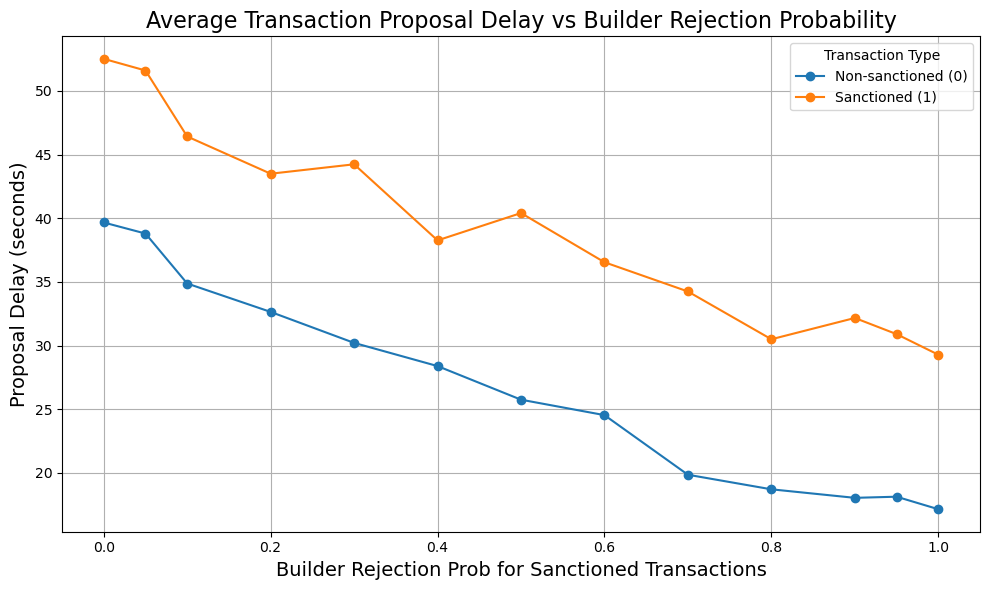

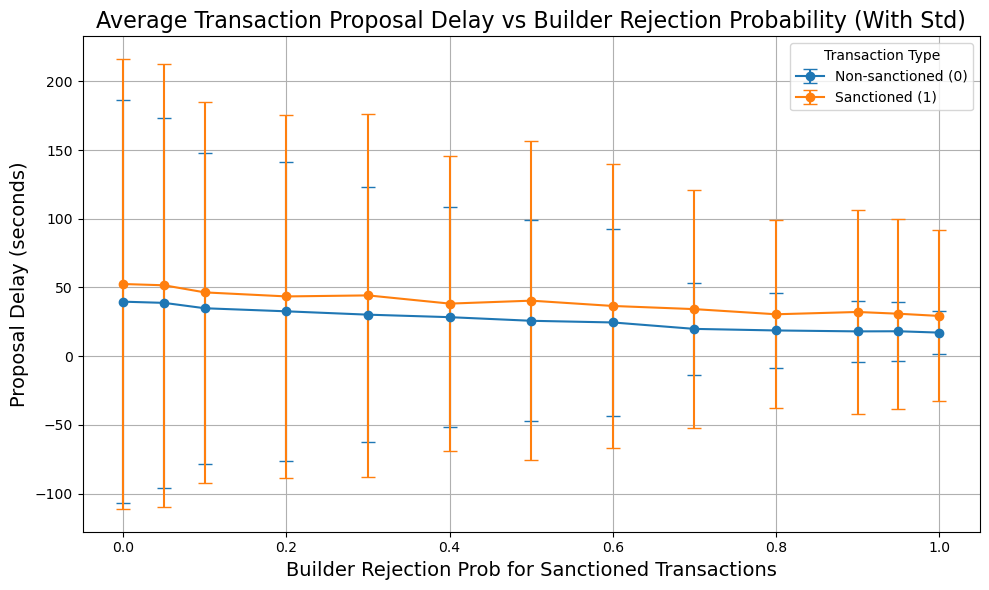

In [ ]:

final_stats['type_1_rejection_prob_builder'] = final_stats['experiment'].str.extract(r'rpb_(\d+\.\d+)').astype(float)


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.plot(group['type_1_rejection_prob_builder'], group['mean'], '-o', label=label)

ax.set_xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Average Transaction Proposal Delay vs Builder Rejection Probability', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.errorbar(group['type_1_rejection_prob_builder'], group['mean'], yerr=group['std'],
                fmt='-o', label=label, capsize=5)

ax.set_xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Average Transaction Proposal Delay vs Builder Rejection Probability (With Std)', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


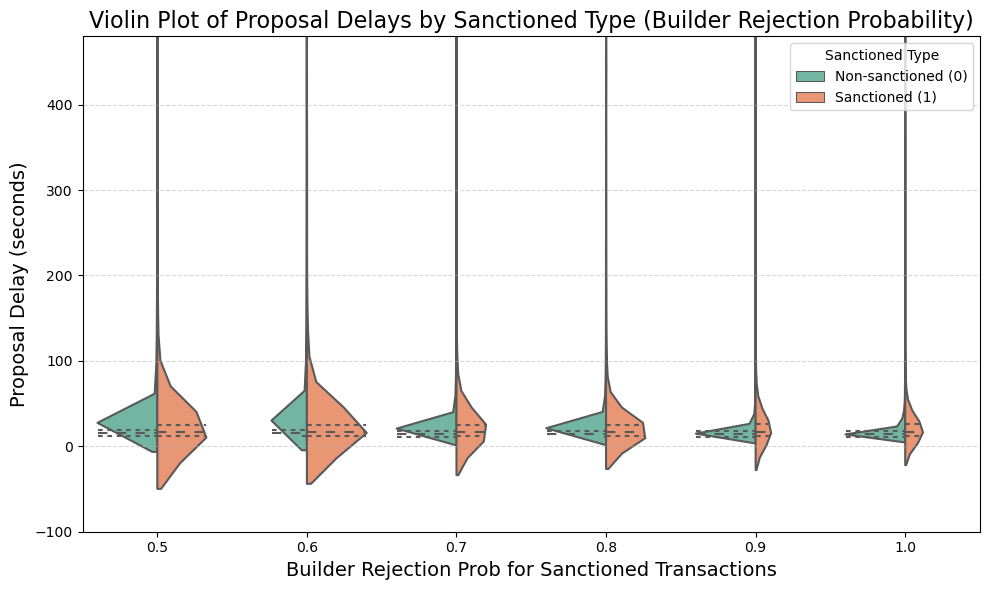

In [ ]:



selected_experiments = ['0.50', '0.60', '0.70', '0.80', '0.90', '1.00']

plt.figure(figsize=(10, 6))


rejection_prob_filtered = combined_transactions[
    combined_transactions['experiment'].str.contains('rpb_') &
    combined_transactions['experiment'].str[-4:].isin(selected_experiments)
]

sns.violinplot(
    data=rejection_prob_filtered,
    x='experiment',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)


current_labels = plt.gca().get_xticklabels()
new_labels = [f"{float(label.get_text()[-4:]):.1f}" for label in current_labels]
plt.gca().set_xticklabels(new_labels)

plt.ylim(-100, 480)
plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays by Sanctioned Type (Builder Rejection Probability)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### The number/proportion of blocks containing sanctioned transactions
#### The number/proportion of empty blocks
#### -  type_1_rejection_prob_builder

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_builder_20250613_150708"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_builder_")]


def extract_rejection_prob_builder(folder_name):
    match = re.search(r"type_1_rejection_prob_builder_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_rejection_prob_builder)


results = []

for folder in folders:
    rejection_prob_builder = extract_rejection_prob_builder(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    run_ids = blocks['run_id'].unique()


    run_metrics = []

    for run in run_ids:
        run_blocks = blocks[blocks['run_id'] == run]

        non_empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] != 'PROPOSER')].copy()
        non_empty_blocks['contains_sanctioned'] = non_empty_blocks['num_sanctioned_tx'] > 0

        blocks_with_sanctioned = non_empty_blocks['contains_sanctioned'].sum()
        blocks_without_sanctioned = (~non_empty_blocks['contains_sanctioned']).sum()
        total_non_empty_blocks = len(non_empty_blocks)

        empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] == 'PROPOSER')]
        total_empty_blocks = empty_blocks.shape[0]
        total_proposed_blocks = total_non_empty_blocks + total_empty_blocks


        ratio_with_sanctioned = blocks_with_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        ratio_without_sanctioned = blocks_without_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        empty_block_ratio = total_empty_blocks / total_proposed_blocks if total_proposed_blocks > 0 else 0

        run_metrics.append({
            'blocks_with_sanctioned': blocks_with_sanctioned,
            'blocks_without_sanctioned': blocks_without_sanctioned,
            'empty_blocks': total_empty_blocks,
            'ratio_with_sanctioned': ratio_with_sanctioned,
            'ratio_without_sanctioned': ratio_without_sanctioned,
            'empty_block_ratio': empty_block_ratio
        })


    metrics_df = pd.DataFrame(run_metrics)

    results.append({
        'experiment': f'rpb_{rejection_prob_builder:.2f}',
        'avg_blocks_with_sanctioned': metrics_df['blocks_with_sanctioned'].mean(),
        'avg_blocks_without_sanctioned': metrics_df['blocks_without_sanctioned'].mean(),
        'ratio_with_sanctioned': metrics_df['ratio_with_sanctioned'].mean(),
        'ratio_without_sanctioned': metrics_df['ratio_without_sanctioned'].mean(),
        'avg_empty_blocks': metrics_df['empty_blocks'].mean(),
        'empty_block_ratio': metrics_df['empty_block_ratio'].mean()
    })

    print(f"\nExperiment: rpb_{rejection_prob_builder:.2f}")
    print(f"平均含 sanctioned_type=1 交易的区块数量: {metrics_df['blocks_with_sanctioned'].mean():.6f}")
    print(f"平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: {metrics_df['blocks_without_sanctioned'].mean():.6f}")
    print(f"含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_with_sanctioned'].mean():.2%}")
    print(f"不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_without_sanctioned'].mean():.2%}")
    print(f"平均空区块数量: {metrics_df['empty_blocks'].mean():.6f}")
    print(f"空区块占所有已提议区块的比例: {metrics_df['empty_block_ratio'].mean():.2%}")



Experiment: rpb_0.00
平均含 sanctioned_type=1 交易的区块数量: 145.600000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 139.100000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 51.16%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 48.84%
平均空区块数量: 15.300000
空区块占所有已提议区块的比例: 5.10%

Experiment: rpb_0.05
平均含 sanctioned_type=1 交易的区块数量: 144.800000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 141.000000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 50.68%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 49.32%
平均空区块数量: 14.200000
空区块占所有已提议区块的比例: 4.73%

Experiment: rpb_0.10
平均含 sanctioned_type=1 交易的区块数量: 144.600000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 143.300000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 50.23%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 49.77%
平均空区块数量: 12.100000
空区块占所有已提议区块的比例: 4.03%

Experiment: rpb_0.20
平均含 sanctioned_type=1 交易的区块数量: 142.200000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 145.900000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 49.35%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 50.65%
平均空区块数量: 11.900000
空区块占所有已提议区块的比例: 3.97%


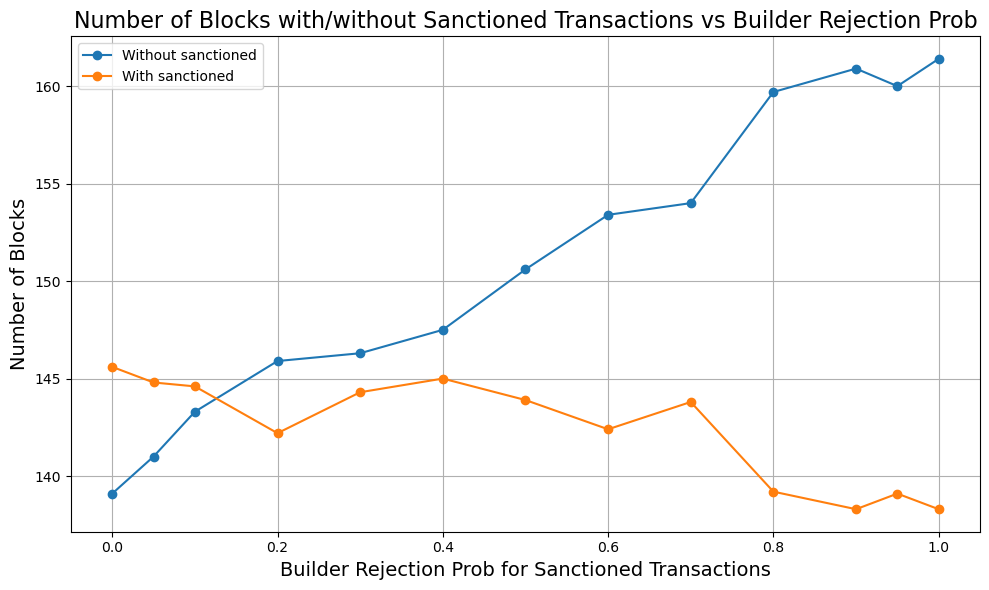

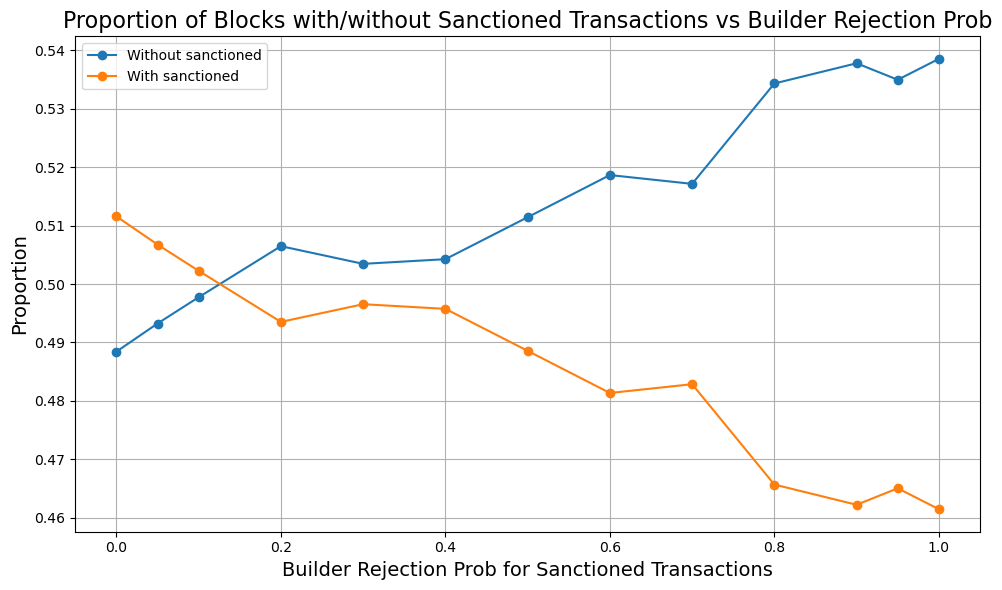

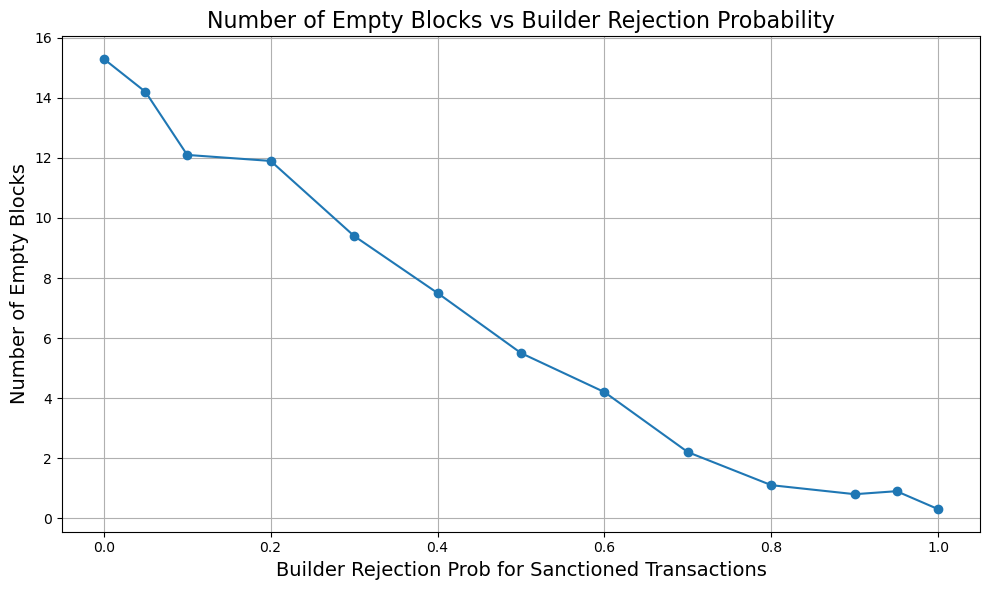

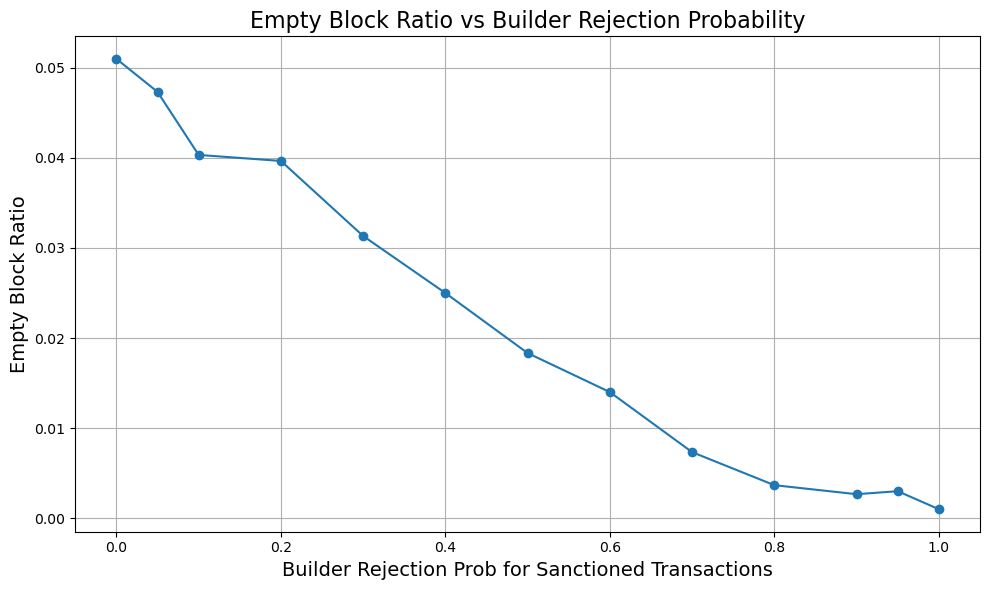

In [ ]:

results_df = pd.DataFrame(results)
results_df['rejection_prob_builder'] = results_df['experiment'].str.extract(r'rpb_(\d+\.\d+)').astype(float)

# Figure 1: Number of Blocks with/without Sanctioned Transactions 
plt.figure(figsize=(10, 6))
plt.plot(results_df['rejection_prob_builder'], results_df['avg_blocks_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['rejection_prob_builder'], results_df['avg_blocks_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Number of Blocks', fontsize=14)
plt.title('Number of Blocks with/without Sanctioned Transactions vs Builder Rejection Prob', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Proportion of Blocks with/without Sanctioned Transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['rejection_prob_builder'], results_df['ratio_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['rejection_prob_builder'], results_df['ratio_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Proportion of Blocks with/without Sanctioned Transactions vs Builder Rejection Prob', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 3: Number of Empty Blocks 
plt.figure(figsize=(10, 6))
plt.plot(results_df['rejection_prob_builder'], results_df['avg_empty_blocks'], marker='o')
plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Number of Empty Blocks', fontsize=14)
plt.title('Number of Empty Blocks vs Builder Rejection Probability', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 4: Empty Block Ratio
plt.figure(figsize=(10, 6))
plt.plot(results_df['rejection_prob_builder'], results_df['empty_block_ratio'], marker='o')
plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Empty Block Ratio', fontsize=14)
plt.title('Empty Block Ratio vs Builder Rejection Probability', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### total_block_value，mean_block_value  - type_1_rejection_prob_builder

In [ ]:

# Calculate block value statistics
def calculate_block_value_stats(exp_blocks, rejection_prob_builder):

    run_summary = exp_blocks.groupby('run_id').agg(
        total_block_value=('total_priority_fee', 'sum'),
        num_blocks=('block_id', 'count')
    ).reset_index()


    run_summary['mean_block_value'] = run_summary['total_block_value'] / run_summary['num_blocks']


    avg_total_block_value = run_summary['total_block_value'].mean()
    avg_mean_block_value = run_summary['mean_block_value'].mean()


    avg_total_block_value_eth = avg_total_block_value * 1e-9
    avg_mean_block_value_eth = avg_mean_block_value * 1e-9

    return {
        'rejection_prob_builder': rejection_prob_builder,
        'avg_total_block_value': avg_total_block_value,
        'avg_mean_block_value': avg_mean_block_value,
        'avg_total_block_value_eth': avg_total_block_value_eth,
        'avg_mean_block_value_eth': avg_mean_block_value_eth
    }


不同 type_1_rejection_prob_builder 参数下的总区块价值和平均区块价值:
    rejection_prob_builder  avg_total_block_value  avg_mean_block_value  \
0                     0.00           1.186911e+10          4.170845e+07   
1                     0.05           1.187610e+10          4.155991e+07   
2                     0.10           1.188376e+10          4.128773e+07   
3                     0.20           1.188583e+10          4.126634e+07   
4                     0.30           1.189128e+10          4.092321e+07   
5                     0.40           1.189813e+10          4.068469e+07   
6                     0.50           1.190312e+10          4.042269e+07   
7                     0.60           1.190535e+10          4.025130e+07   
8                     0.70           1.190699e+10          3.998458e+07   
9                     0.80           1.190428e+10          3.982779e+07   
10                    0.90           1.190814e+10          3.980041e+07   
11                    0.95           1.190786e+10

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


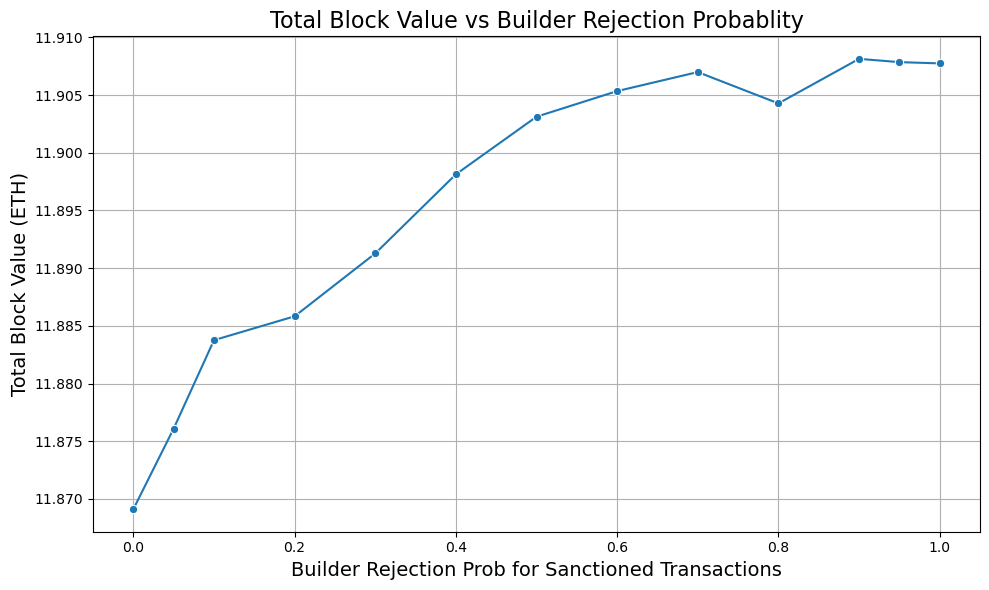

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


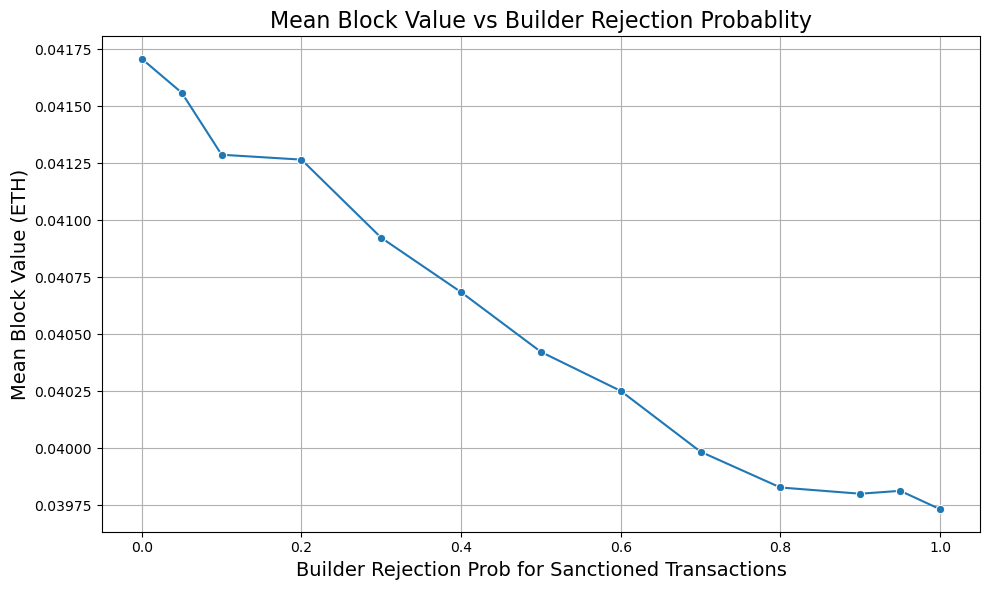

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_builder_20250613_150708"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_builder_")]


def extract_rejection_prob_builder(folder_name):
    match = re.search(r"type_1_rejection_prob_builder_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_rejection_prob_builder)


results = []



for folder in folders:
    rejection_prob_builder = extract_rejection_prob_builder(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_block_value_stats(blocks, rejection_prob_builder)
    results.append(stats)


combined_stats = pd.DataFrame(results)


print("不同 type_1_rejection_prob_builder 参数下的总区块价值和平均区块价值:")
print(combined_stats.sort_values('rejection_prob_builder'))


plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_builder', y='avg_total_block_value_eth', marker='o')
plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Total Block Value (ETH)', fontsize=14)
plt.title('Total Block Value vs Builder Rejection Probablity', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_builder', y='avg_mean_block_value_eth', marker='o')
plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Mean Block Value (ETH)', fontsize=14)
plt.title('Mean Block Value vs Builder Rejection Probablity', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for builders under different censorship types  - type_1_rejection_prob_builder

In [ ]:
# Calculate builder profit by policy
def calculate_builder_profit_by_policy(exp_blocks, experiment_name):

    policy_summary = exp_blocks.groupby(['run_id', 'builder_policy']).agg(
        total_builder_profit=('builder_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_builders=('builder_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = ['strict', 'weak', 'non']
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'builder_policy'])

    policy_summary = policy_summary.set_index(['run_id', 'builder_policy']).reindex(
        full_index, fill_value=0
    ).reset_index()

    
    policy_summary['mean_profit_per_block'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )
    
    policy_summary['mean_profit_per_builder'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_builders'] if row['num_builders'] > 0 else 0, axis=1
    )


    final_policy_avg = policy_summary.groupby('builder_policy').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_builder': 'mean'
    }).reset_index()


    final_policy_avg['mean_builder_profit_per_block(ETH)'] = final_policy_avg['mean_profit_per_block'] * 1e-9
    final_policy_avg['mean_builder_profit_per_builder(ETH)'] = final_policy_avg['mean_profit_per_builder'] * 1e-9

    final_policy_avg['experiment'] = experiment_name

    return final_policy_avg[[
        'builder_policy',
        'mean_builder_profit_per_block(ETH)',
        'mean_builder_profit_per_builder(ETH)',
        'experiment'
    ]]


  builder_policy  mean_builder_profit_per_block(ETH)  \
0            non                            0.002123   
1         strict                            0.002047   
2           weak                            0.001880   
0            non                            0.002111   
1         strict                            0.002037   
2           weak                            0.001884   
0            non                            0.002106   
1         strict                            0.001948   
2           weak                            0.001855   
0            non                            0.002099   
1         strict                            0.001934   
2           weak                            0.001899   
0            non                            0.002091   
1         strict                            0.001880   
2           weak                            0.001886   
0            non                            0.002083   
1         strict                            0.00

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

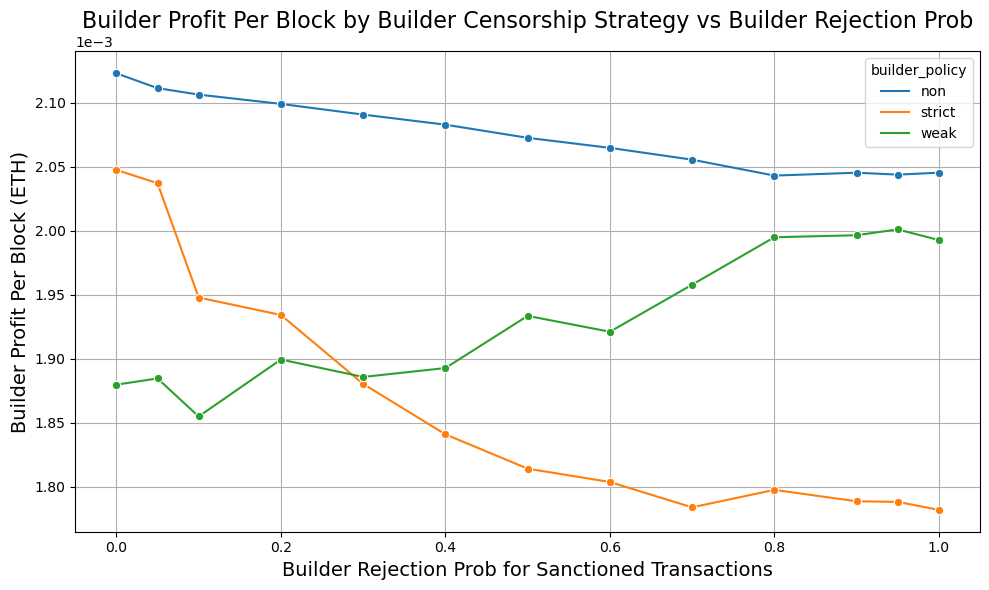

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

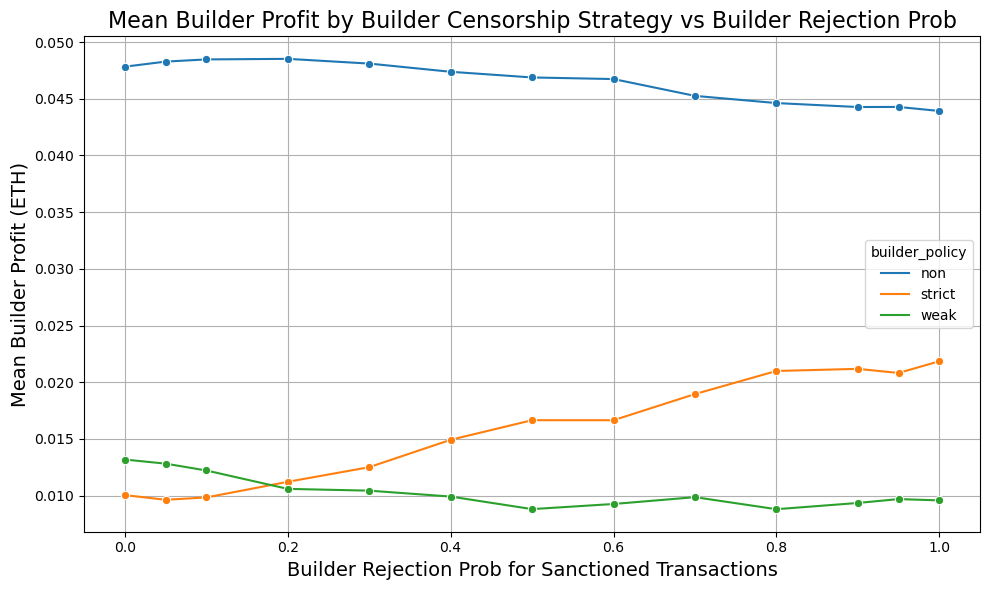

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_builder_20250613_150708"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_builder_")]


def extract_rejection_prob_builder(folder_name):
    match = re.search(r"type_1_rejection_prob_builder_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_rejection_prob_builder)


results = []


for folder in folders:
    rejection_prob_builder = extract_rejection_prob_builder(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_builder_profit_by_policy(blocks, f'rpb_{rejection_prob_builder:.3f}')
    stats['rejection_prob_builder'] = rejection_prob_builder
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['rejection_prob_builder', 'builder_policy']))

# Figure 1: Builder Profit Per Block by Builder Censorship Strategy vs Builder Rejection Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_builder', y='mean_builder_profit_per_block(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Builder Profit Per Block (ETH)', fontsize=14)
plt.title('Builder Profit Per Block by Builder Censorship Strategy vs Builder Rejection Prob', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Builder Profit Per Builder by Builder Censorship Strategy vs Builder Rejection Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_builder', y='mean_builder_profit_per_builder(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Mean Builder Profit (ETH)', fontsize=14)
plt.title('Mean Builder Profit by Builder Censorship Strategy vs Builder Rejection Prob', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for validators under different censorship types   - type_1_rejection_prob_builder

In [ ]:

# Calculate validator profit by policy

def calculate_validator_profit_by_policy(exp_blocks, experiment_name):
    validator_summary = exp_blocks.groupby(['run_id', 'proposer_validator_is_censoring']).agg(
        total_proposer_profit=('proposer_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_validators=('proposer_validator_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = [True, False]
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'proposer_validator_is_censoring'])

    validator_summary = validator_summary.set_index(['run_id', 'proposer_validator_is_censoring']).reindex(
        full_index, fill_value=0
    ).reset_index()

    validator_summary['mean_profit_per_block'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )

    validator_summary['mean_profit_per_validator'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_validators'] if row['num_validators'] > 0 else 0, axis=1
    )

    final_validator_avg = validator_summary.groupby('proposer_validator_is_censoring').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_validator': 'mean'
    }).reset_index()

    final_validator_avg['mean_validator_profit_per_block(ETH)'] = final_validator_avg['mean_profit_per_block'] * 1e-9
    final_validator_avg['mean_validator_profit_per_validator(ETH)'] = final_validator_avg['mean_profit_per_validator'] * 1e-9

    final_validator_avg['experiment'] = experiment_name

    return final_validator_avg[[
        'proposer_validator_is_censoring',
        'mean_validator_profit_per_block(ETH)',
        'mean_validator_profit_per_validator(ETH)',
        'experiment'
    ]]


   proposer_validator_is_censoring  mean_validator_profit_per_block(ETH)  \
0                            False                              0.040802   
1                             True                              0.032988   
0                            False                              0.040725   
1                             True                              0.032702   
0                            False                              0.040493   
1                             True                              0.032621   
0                            False                              0.040413   
1                             True                              0.032920   
0                            False                              0.040200   
1                             True                              0.032371   
0                            False                              0.040039   
1                             True                              0.032016   
0           

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

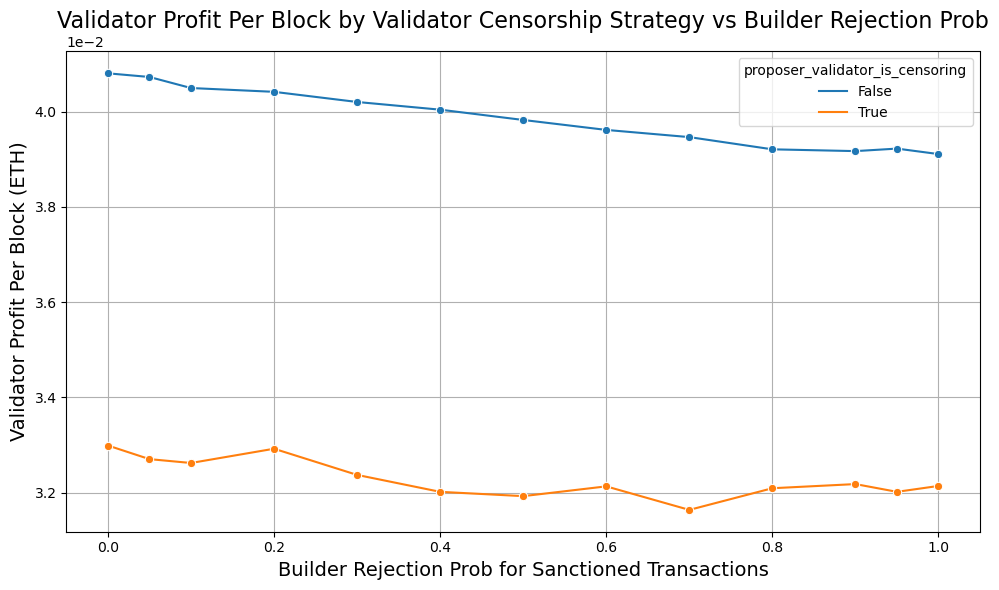

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

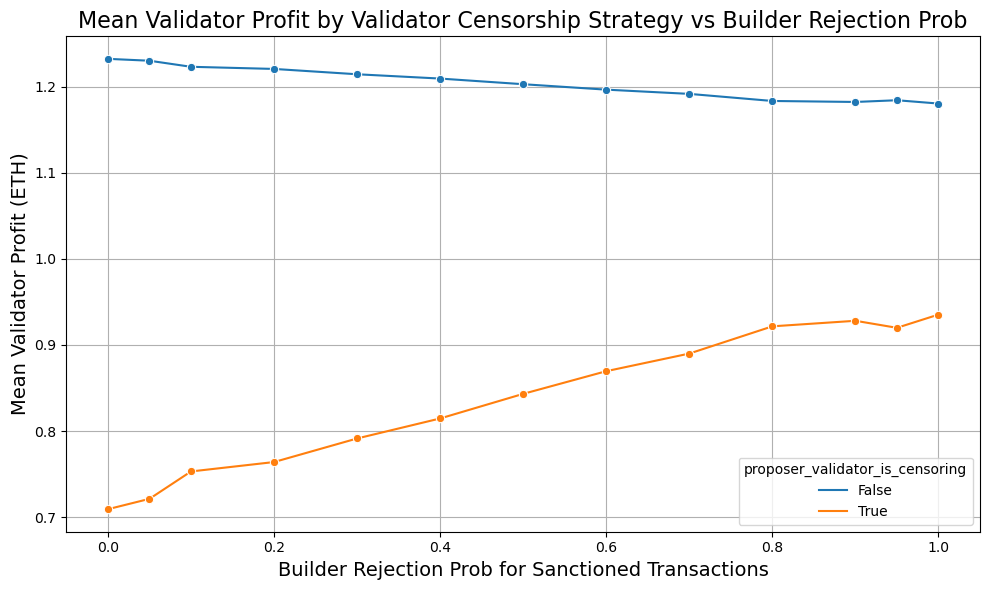

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_builder_20250613_150708"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_builder_")]


def extract_rejection_prob_builder(folder_name):
    match = re.search(r"type_1_rejection_prob_builder_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_rejection_prob_builder)


results = []


for folder in folders:
    rejection_prob_builder = extract_rejection_prob_builder(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    
    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()

    
    stats = calculate_validator_profit_by_policy(blocks, f'rpb_{rejection_prob_builder:.3f}')
    stats['rejection_prob_builder'] = rejection_prob_builder
    results.append(stats)


combined_stats = pd.concat(results)



print(combined_stats.sort_values(['rejection_prob_builder', 'proposer_validator_is_censoring']))

# Figure 1: Validator Profit Per Block by Validator Censorship Strategy vs Builder Rejection Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_builder', y='mean_validator_profit_per_block(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Validator Profit Per Block (ETH)', fontsize=14)
plt.title('Validator Profit Per Block by Validator Censorship Strategy vs Builder Rejection Prob', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Validator Profit Per Validator by Validator Censorship Strategy vs Builder Rejection Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_builder', y='mean_validator_profit_per_validator(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Mean Validator Profit (ETH)', fontsize=14)
plt.title('Mean Validator Profit by Validator Censorship Strategy vs Builder Rejection Prob', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Transaction Delay - type_1_rejection_prob_relay

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_relay_20250613_173716"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_relay_")]


def extract_rejection_prob_relay(folder_name):
    match = re.search(r"type_1_rejection_prob_relay_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_rejection_prob_relay)



for folder in folders:
    rejection_prob_relay = extract_rejection_prob_relay(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "transactions.csv")

    transactions = pd.read_csv(file_path, low_memory=False)
    transactions = transactions[transactions['is_proposed']].copy()

 
    if transactions.empty:
        print(f"Warning: No proposed transactions found in folder {folder}")
        continue

    transactions['proposal_delay'] = transactions['proposed_time'] - transactions['arrival_time']
    transactions['sanctioned_type'] = transactions['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
    transactions['experiment'] = f"rpr_{rejection_prob_relay:.2f}"

    combined_transactions = pd.concat([combined_transactions, transactions], ignore_index=True)


if combined_transactions.empty:
    print("No transactions data available after filtering.")
else:

    negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
    print("Transactions with negative proposal delay:")
    print(negative_delay_txs if not negative_delay_txs.empty else "None found")


run_stats = combined_transactions.groupby(['experiment', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()
final_stats = run_stats.groupby(['experiment', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()

print("\nProposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):")
print(final_stats)


Transactions with negative proposal delay:
None found

Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):
   experiment     sanctioned_type       mean        std
0    rpr_0.00  Non-sanctioned (0)  16.972564  14.468063
1    rpr_0.00      Sanctioned (1)  20.076370  19.065964
2    rpr_0.05  Non-sanctioned (0)  16.777679  13.870038
3    rpr_0.05      Sanctioned (1)  20.434168  19.700005
4    rpr_0.10  Non-sanctioned (0)  16.843151  13.839418
5    rpr_0.10      Sanctioned (1)  20.310607  18.274861
6    rpr_0.20  Non-sanctioned (0)  16.887319  14.168782
7    rpr_0.20      Sanctioned (1)  20.478438  21.572114
8    rpr_0.30  Non-sanctioned (0)  16.964436  14.347554
9    rpr_0.30      Sanctioned (1)  21.131839  23.272480
10   rpr_0.40  Non-sanctioned (0)  16.865348  14.494679
11   rpr_0.40      Sanctioned (1)  21.167833  23.932790
12   rpr_0.50  Non-sanctioned (0)  16.863400  14.217652
13   rpr_0.50      Sanctioned (1)  21.365626  22.678766
14   rpr_0.60  Non-sanc

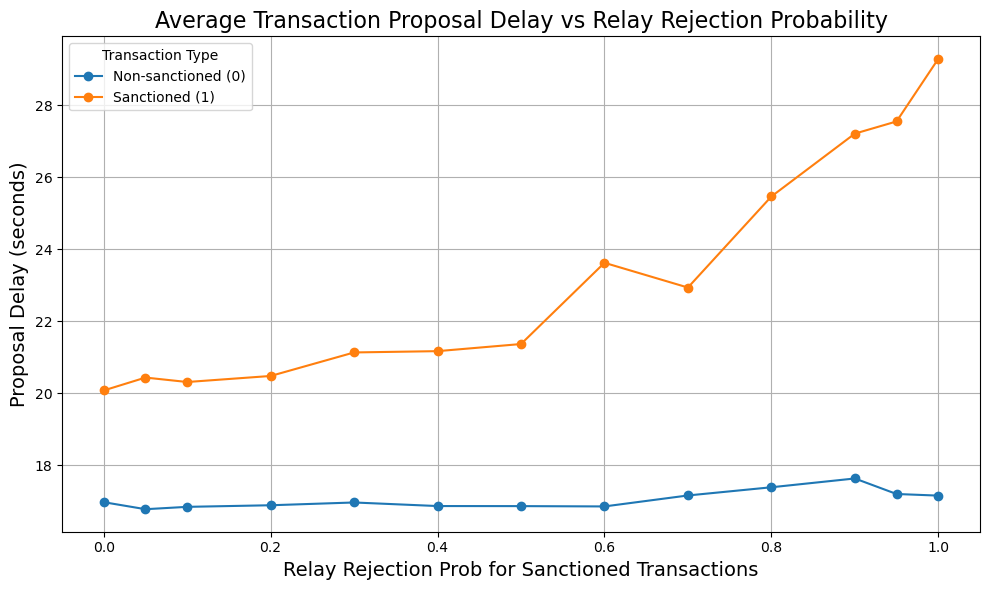

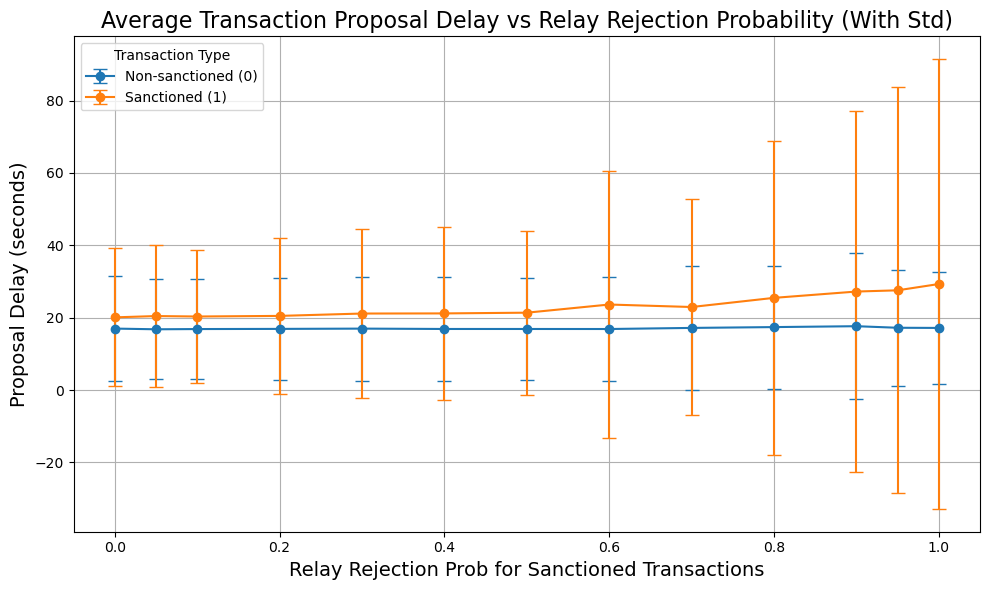

In [ ]:

final_stats['type_1_rejection_prob_relay'] = final_stats['experiment'].str.extract(r'rpr_(\d+\.\d+)').astype(float)


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.plot(group['type_1_rejection_prob_relay'], group['mean'], '-o', label=label)

ax.set_xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Average Transaction Proposal Delay vs Relay Rejection Probability', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.errorbar(group['type_1_rejection_prob_relay'], group['mean'], yerr=group['std'],
                fmt='-o', label=label, capsize=5)

ax.set_xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Average Transaction Proposal Delay vs Relay Rejection Probability (With Std)', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


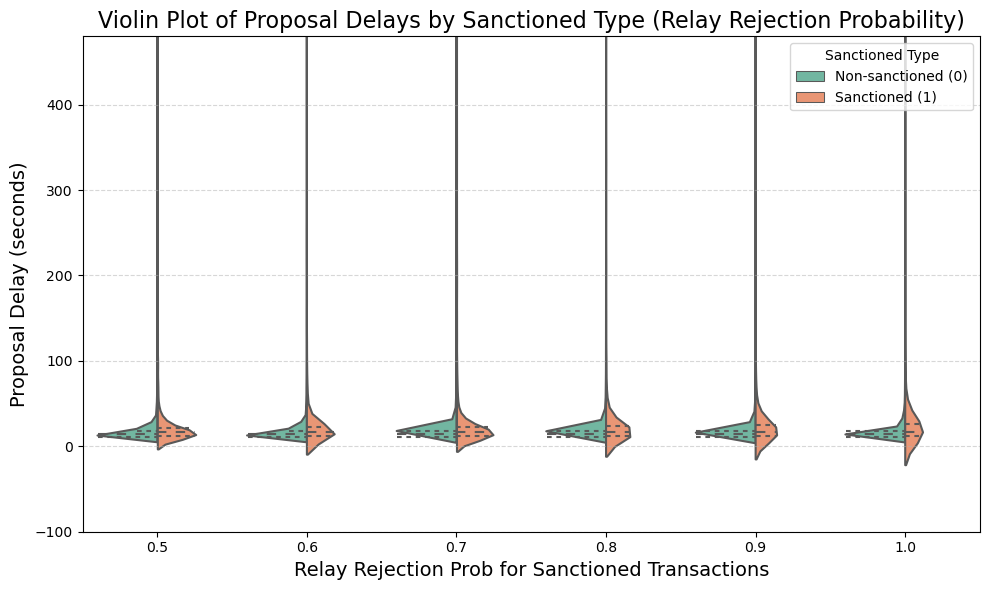

In [ ]:



selected_experiments = ['0.50', '0.60', '0.70', '0.80', '0.90', '1.00']

plt.figure(figsize=(10, 6))


rejection_prob_filtered = combined_transactions[
    combined_transactions['experiment'].str.contains('rpr_') &
    combined_transactions['experiment'].str[-4:].isin(selected_experiments)
]

sns.violinplot(
    data=rejection_prob_filtered,
    x='experiment',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)


current_labels = plt.gca().get_xticklabels()
new_labels = [f"{float(label.get_text()[-4:]):.1f}" for label in current_labels]
plt.gca().set_xticklabels(new_labels)

plt.ylim(-100, 480)
plt.xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays by Sanctioned Type (Relay Rejection Probability)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### The number/proportion of blocks containing sanctioned transactions
#### The number/proportion of empty blocks
####  -  type_1_rejection_prob_relay

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_relay_20250613_173716"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_relay_")]


def extract_rejection_prob_relay(folder_name):
    match = re.search(r"type_1_rejection_prob_relay_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_rejection_prob_relay)


results = []

for folder in folders:
    rejection_prob_relay = extract_rejection_prob_relay(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    run_ids = blocks['run_id'].unique()

    
    run_metrics = []

    for run in run_ids:
        run_blocks = blocks[blocks['run_id'] == run]

        non_empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] != 'PROPOSER')].copy()
        non_empty_blocks['contains_sanctioned'] = non_empty_blocks['num_sanctioned_tx'] > 0

        blocks_with_sanctioned = non_empty_blocks['contains_sanctioned'].sum()
        blocks_without_sanctioned = (~non_empty_blocks['contains_sanctioned']).sum()
        total_non_empty_blocks = len(non_empty_blocks)

        empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] == 'PROPOSER')]
        total_empty_blocks = empty_blocks.shape[0]
        total_proposed_blocks = total_non_empty_blocks + total_empty_blocks

       
        ratio_with_sanctioned = blocks_with_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        ratio_without_sanctioned = blocks_without_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        empty_block_ratio = total_empty_blocks / total_proposed_blocks if total_proposed_blocks > 0 else 0

        run_metrics.append({
            'blocks_with_sanctioned': blocks_with_sanctioned,
            'blocks_without_sanctioned': blocks_without_sanctioned,
            'empty_blocks': total_empty_blocks,
            'ratio_with_sanctioned': ratio_with_sanctioned,
            'ratio_without_sanctioned': ratio_without_sanctioned,
            'empty_block_ratio': empty_block_ratio
        })


    metrics_df = pd.DataFrame(run_metrics)

    results.append({
        'experiment': f'rpr_{rejection_prob_relay:.2f}',
        'avg_blocks_with_sanctioned': metrics_df['blocks_with_sanctioned'].mean(),
        'avg_blocks_without_sanctioned': metrics_df['blocks_without_sanctioned'].mean(),
        'ratio_with_sanctioned': metrics_df['ratio_with_sanctioned'].mean(),
        'ratio_without_sanctioned': metrics_df['ratio_without_sanctioned'].mean(),
        'avg_empty_blocks': metrics_df['empty_blocks'].mean(),
        'empty_block_ratio': metrics_df['empty_block_ratio'].mean()
    })

    print(f"\nExperiment: rpr_{rejection_prob_relay:.2f}")
    print(f"平均含 sanctioned_type=1 交易的区块数量: {metrics_df['blocks_with_sanctioned'].mean():.6f}")
    print(f"平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: {metrics_df['blocks_without_sanctioned'].mean():.6f}")
    print(f"含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_with_sanctioned'].mean():.2%}")
    print(f"不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_without_sanctioned'].mean():.2%}")
    print(f"平均空区块数量: {metrics_df['empty_blocks'].mean():.6f}")
    print(f"空区块占所有已提议区块的比例: {metrics_df['empty_block_ratio'].mean():.2%}")



Experiment: rpr_0.00
平均含 sanctioned_type=1 交易的区块数量: 151.200000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 148.600000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 50.43%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 49.57%
平均空区块数量: 0.200000
空区块占所有已提议区块的比例: 0.07%

Experiment: rpr_0.05
平均含 sanctioned_type=1 交易的区块数量: 148.300000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 151.500000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 49.47%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 50.53%
平均空区块数量: 0.200000
空区块占所有已提议区块的比例: 0.07%

Experiment: rpr_0.10
平均含 sanctioned_type=1 交易的区块数量: 148.600000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 151.200000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 49.57%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 50.43%
平均空区块数量: 0.200000
空区块占所有已提议区块的比例: 0.07%

Experiment: rpr_0.20
平均含 sanctioned_type=1 交易的区块数量: 150.400000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 149.400000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 50.17%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 49.83%
平均空区块数量: 0.200000
空区块占所有已提议区块的比例: 0.07%

Exp

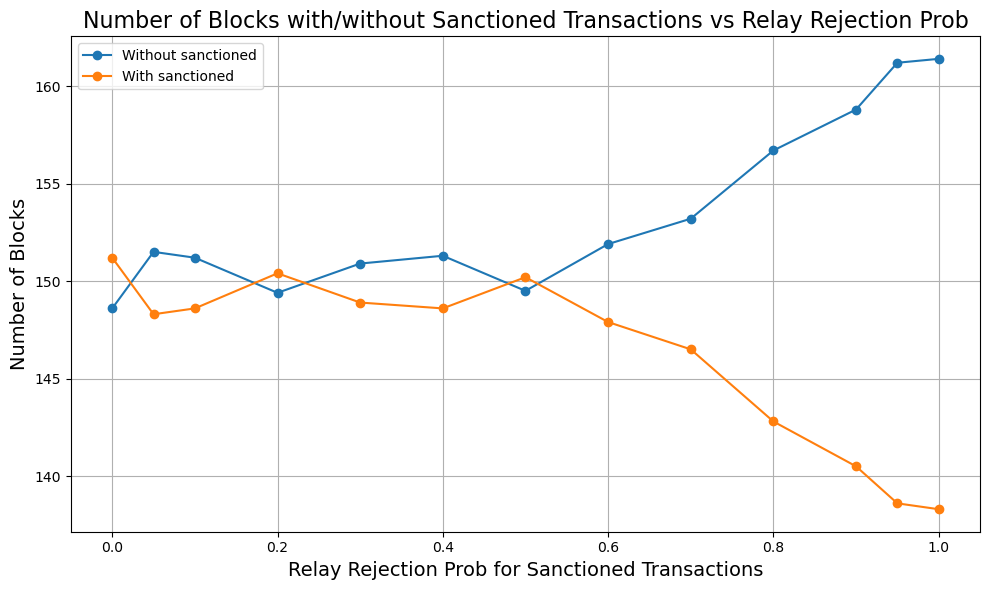

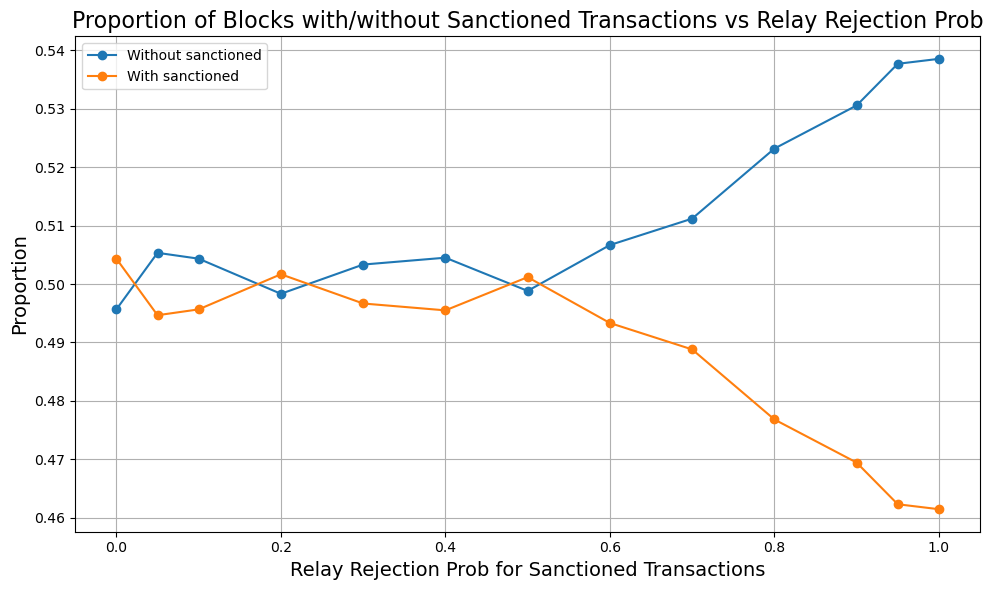

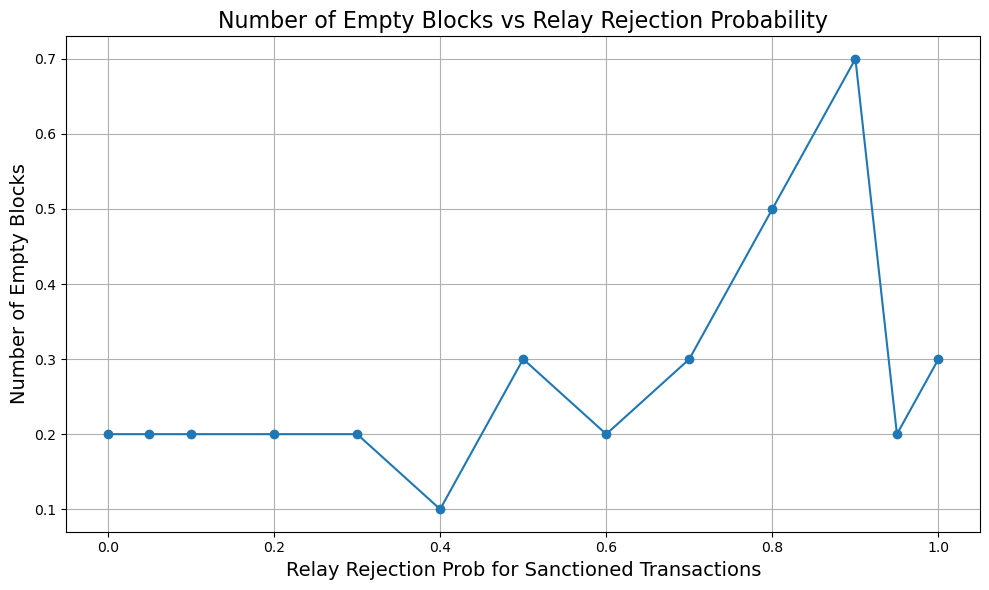

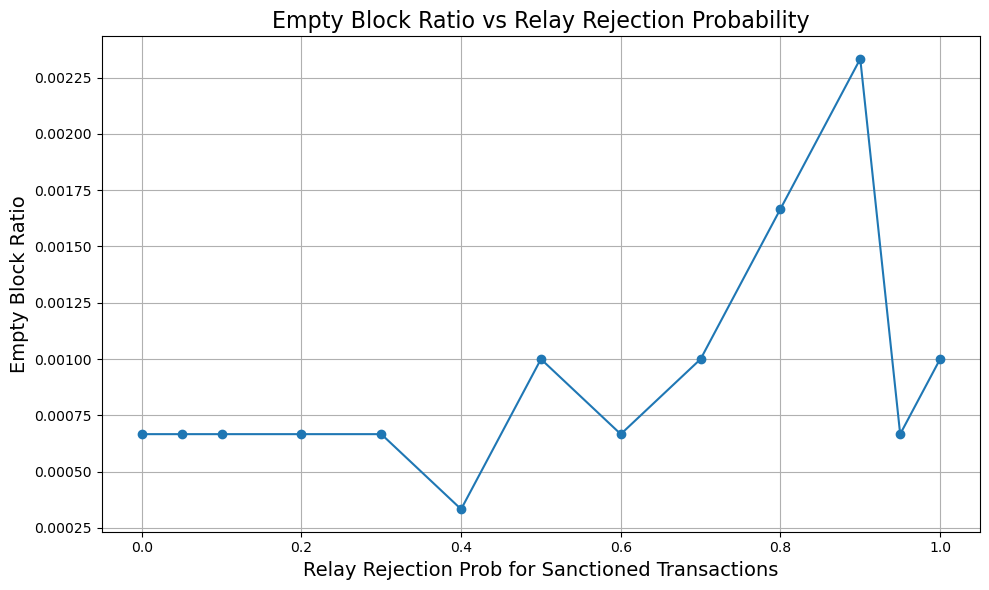

In [ ]:

results_df = pd.DataFrame(results)
results_df['rejection_prob_relay'] = results_df['experiment'].str.extract(r'rpr_(\d+\.\d+)').astype(float)

# Figure 1: Number of Blocks with/without Sanctioned Transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['rejection_prob_relay'], results_df['avg_blocks_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['rejection_prob_relay'], results_df['avg_blocks_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Number of Blocks', fontsize=14)
plt.title('Number of Blocks with/without Sanctioned Transactions vs Relay Rejection Prob', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Proportion of Blocks with/without Sanctioned Transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['rejection_prob_relay'], results_df['ratio_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['rejection_prob_relay'], results_df['ratio_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Proportion of Blocks with/without Sanctioned Transactions vs Relay Rejection Prob', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 3: Number of Empty Blocks
plt.figure(figsize=(10, 6))
plt.plot(results_df['rejection_prob_relay'], results_df['avg_empty_blocks'], marker='o')
plt.xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Number of Empty Blocks', fontsize=14)
plt.title('Number of Empty Blocks vs Relay Rejection Probability', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 4: Empty Block Ratio
plt.figure(figsize=(10, 6))
plt.plot(results_df['rejection_prob_relay'], results_df['empty_block_ratio'], marker='o')
plt.xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Empty Block Ratio', fontsize=14)
plt.title('Empty Block Ratio vs Relay Rejection Probability', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### total_block_value，mean_block_value  - type_1_rejection_prob_relay

In [ ]:

# Calculate block value statistics
def calculate_block_value_stats(exp_blocks, rejection_prob_relay):

    run_summary = exp_blocks.groupby('run_id').agg(
        total_block_value=('total_priority_fee', 'sum'),
        num_blocks=('block_id', 'count')
    ).reset_index()


    run_summary['mean_block_value'] = run_summary['total_block_value'] / run_summary['num_blocks']


    avg_total_block_value = run_summary['total_block_value'].mean()
    avg_mean_block_value = run_summary['mean_block_value'].mean()


    avg_total_block_value_eth = avg_total_block_value * 1e-9
    avg_mean_block_value_eth = avg_mean_block_value * 1e-9

    return {
        'rejection_prob_relay': rejection_prob_relay,
        'avg_total_block_value': avg_total_block_value,
        'avg_mean_block_value': avg_mean_block_value,
        'avg_total_block_value_eth': avg_total_block_value_eth,
        'avg_mean_block_value_eth': avg_mean_block_value_eth
    }


不同 type_1_rejection_prob_relay 参数下的总区块价值和平均区块价值:
    rejection_prob_relay  avg_total_block_value  avg_mean_block_value  \
0                   0.00           1.190867e+10          3.972227e+07   
1                   0.05           1.190855e+10          3.972185e+07   
2                   0.10           1.190847e+10          3.972158e+07   
3                   0.20           1.190845e+10          3.972151e+07   
4                   0.30           1.190807e+10          3.972026e+07   
5                   0.40           1.190846e+10          3.970816e+07   
6                   0.50           1.190782e+10          3.973270e+07   
7                   0.60           1.190796e+10          3.971990e+07   
8                   0.70           1.190799e+10          3.973332e+07   
9                   0.80           1.190823e+10          3.976079e+07   
10                  0.90           1.190818e+10          3.978742e+07   
11                  0.95           1.190869e+10          3.972226e+07   
12

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


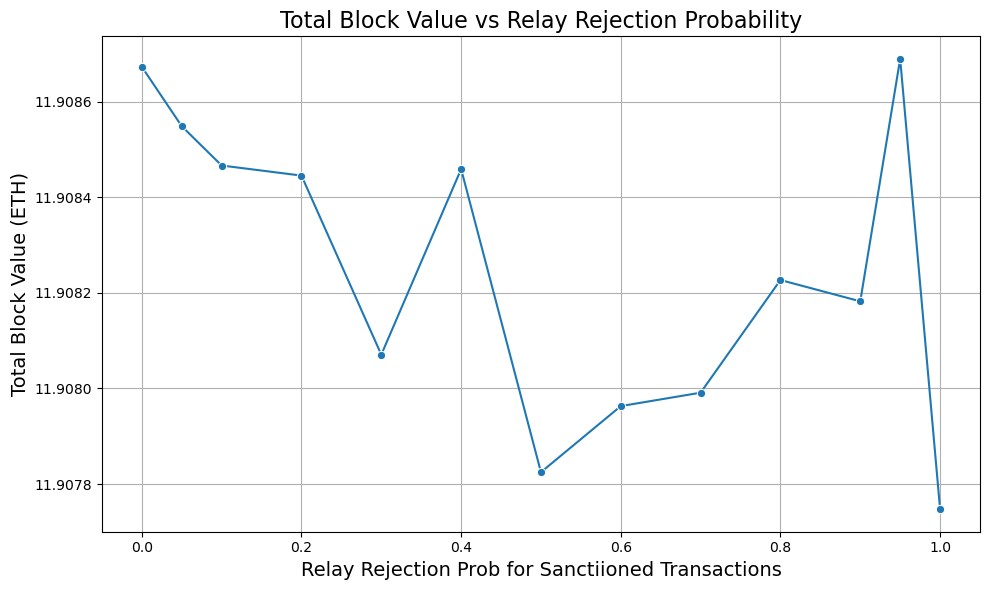

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


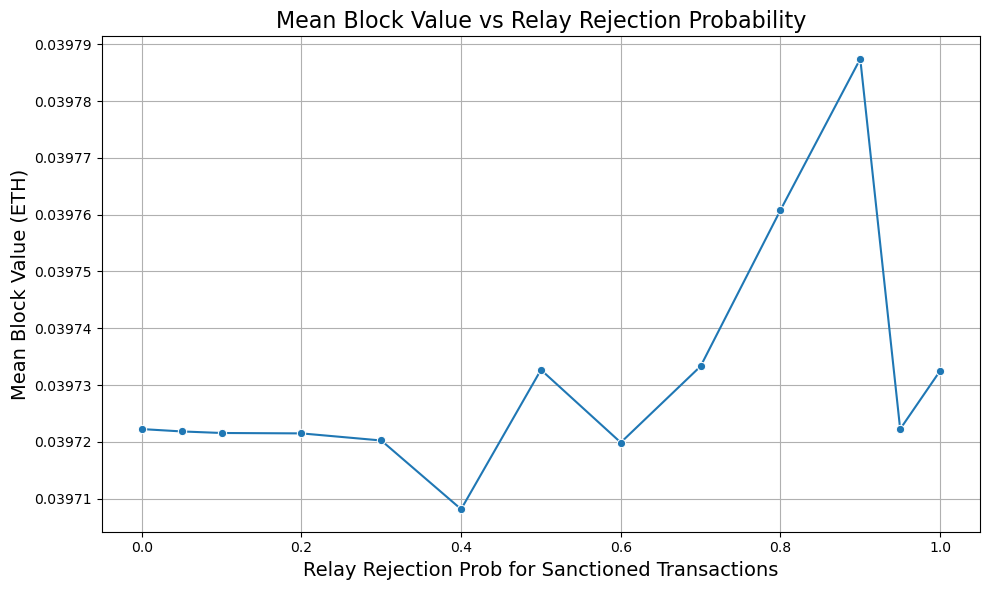

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_relay_20250613_173716"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_relay_")]


def extract_rejection_prob_relay(folder_name):
    match = re.search(r"type_1_rejection_prob_relay_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_rejection_prob_relay)


results = []


for folder in folders:
    rejection_prob_relay = extract_rejection_prob_relay(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    
    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()

    
    stats = calculate_block_value_stats(blocks, rejection_prob_relay)
    results.append(stats)


combined_stats = pd.DataFrame(results)


print("不同 type_1_rejection_prob_relay 参数下的总区块价值和平均区块价值:")
print(combined_stats.sort_values('rejection_prob_relay'))

# Figure 1: Total Block Value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_relay', y='avg_total_block_value_eth', marker='o')
plt.xlabel('Relay Rejection Prob for Sanctiioned Transactions', fontsize=14)
plt.ylabel('Total Block Value (ETH)', fontsize=14)
plt.title('Total Block Value vs Relay Rejection Probability', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Block Value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_relay', y='avg_mean_block_value_eth', marker='o')
plt.xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Mean Block Value (ETH)', fontsize=14)
plt.title('Mean Block Value vs Relay Rejection Probability', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for builders under different censorship types - type_1_rejection_prob_relay

In [ ]:
# Calculate builder profit by policy

def calculate_builder_profit_by_policy(exp_blocks, experiment_name):
   
    policy_summary = exp_blocks.groupby(['run_id', 'builder_policy']).agg(
        total_builder_profit=('builder_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_builders=('builder_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = ['strict', 'weak', 'non']
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'builder_policy'])

    policy_summary = policy_summary.set_index(['run_id', 'builder_policy']).reindex(
        full_index, fill_value=0
    ).reset_index()

    
    policy_summary['mean_profit_per_block'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )
    
    policy_summary['mean_profit_per_builder'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_builders'] if row['num_builders'] > 0 else 0, axis=1
    )

    
    final_policy_avg = policy_summary.groupby('builder_policy').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_builder': 'mean'
    }).reset_index()

    
    final_policy_avg['mean_builder_profit_per_block(ETH)'] = final_policy_avg['mean_profit_per_block'] * 1e-9
    final_policy_avg['mean_builder_profit_per_builder(ETH)'] = final_policy_avg['mean_profit_per_builder'] * 1e-9

    final_policy_avg['experiment'] = experiment_name

    return final_policy_avg[[
        'builder_policy',
        'mean_builder_profit_per_block(ETH)',
        'mean_builder_profit_per_builder(ETH)',
        'experiment'
    ]]


  builder_policy  mean_builder_profit_per_block(ETH)  \
0            non                            0.002007   
1         strict                            0.001875   
2           weak                            0.001946   
0            non                            0.002011   
1         strict                            0.001854   
2           weak                            0.001962   
0            non                            0.002007   
1         strict                            0.001873   
2           weak                            0.001968   
0            non                            0.002008   
1         strict                            0.001861   
2           weak                            0.001971   
0            non                            0.002009   
1         strict                            0.001849   
2           weak                            0.001983   
0            non                            0.002008   
1         strict                            0.00

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

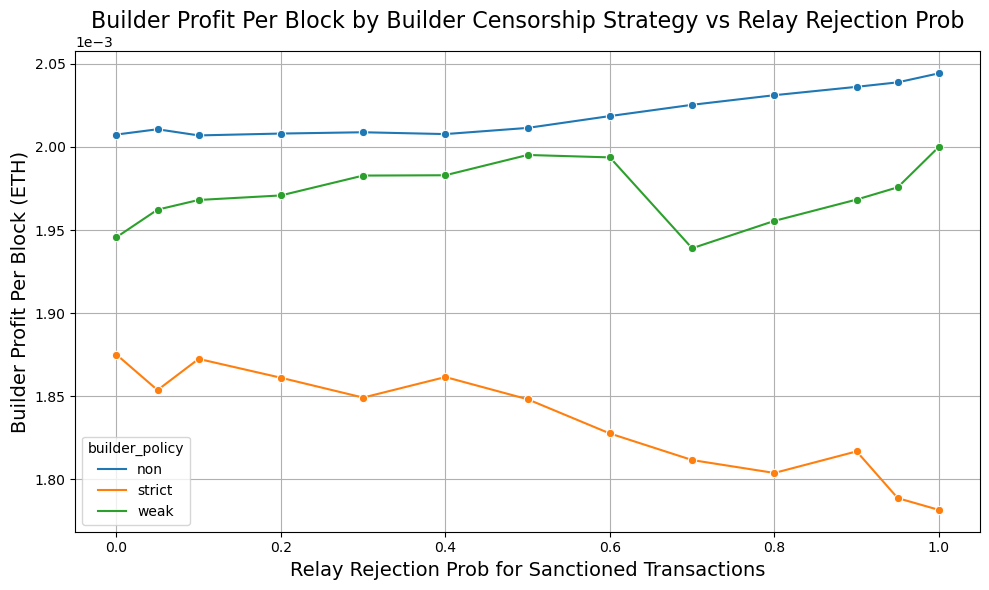

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

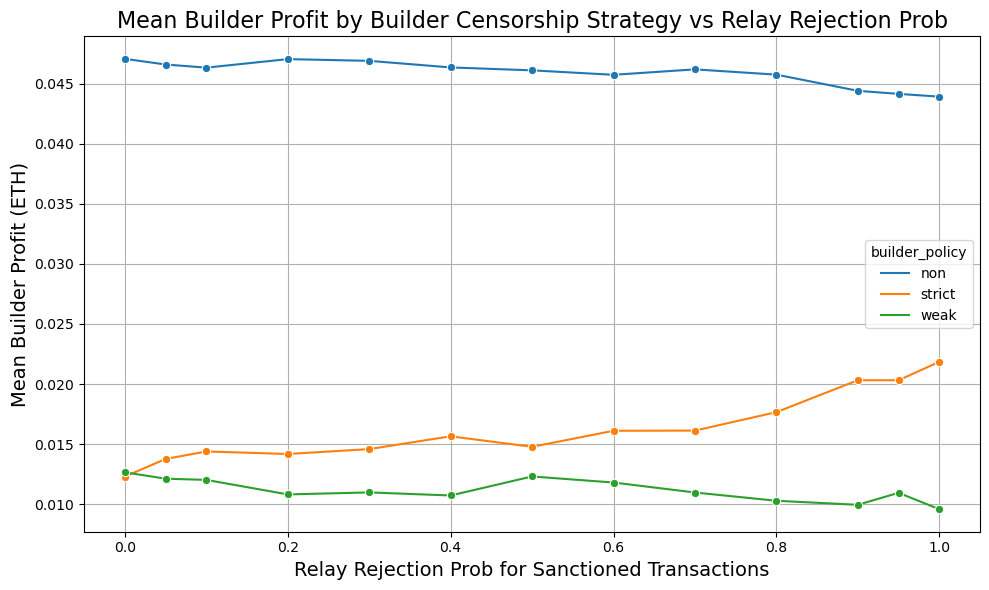

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_relay_20250613_173716"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_relay_")]


def extract_rejection_prob_relay(folder_name):
    match = re.search(r"type_1_rejection_prob_relay_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_rejection_prob_relay)


results = []


for folder in folders:
    rejection_prob_relay = extract_rejection_prob_relay(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

 
    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_builder_profit_by_policy(blocks, f'rpr_{rejection_prob_relay:.3f}')
    stats['rejection_prob_relay'] = rejection_prob_relay
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['rejection_prob_relay', 'builder_policy']))

# Figure 1: Builder Profit Per Block by Builder Censorship Strategy vs Relay Rejection Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_relay', y='mean_builder_profit_per_block(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Builder Profit Per Block (ETH)', fontsize=14)
plt.title('Builder Profit Per Block by Builder Censorship Strategy vs Relay Rejection Prob', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Builder Profit Per Builder by Builder Censorship Strategy vs Relay Rejection Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_relay', y='mean_builder_profit_per_builder(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Mean Builder Profit (ETH)', fontsize=14)
plt.title('Mean Builder Profit by Builder Censorship Strategy vs Relay Rejection Prob', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for validators under different censorship types   - type_1_rejection_prob_relay

In [ ]:

# Calculate validator profit by policy

def calculate_validator_profit_by_policy(exp_blocks, experiment_name):
    validator_summary = exp_blocks.groupby(['run_id', 'proposer_validator_is_censoring']).agg(
        total_proposer_profit=('proposer_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_validators=('proposer_validator_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = [True, False]
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'proposer_validator_is_censoring'])

    validator_summary = validator_summary.set_index(['run_id', 'proposer_validator_is_censoring']).reindex(
        full_index, fill_value=0
    ).reset_index()

    validator_summary['mean_profit_per_block'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )

    validator_summary['mean_profit_per_validator'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_validators'] if row['num_validators'] > 0 else 0, axis=1
    )

    final_validator_avg = validator_summary.groupby('proposer_validator_is_censoring').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_validator': 'mean'
    }).reset_index()

    final_validator_avg['mean_validator_profit_per_block(ETH)'] = final_validator_avg['mean_profit_per_block'] * 1e-9
    final_validator_avg['mean_validator_profit_per_validator(ETH)'] = final_validator_avg['mean_profit_per_validator'] * 1e-9

    final_validator_avg['experiment'] = experiment_name

    return final_validator_avg[[
        'proposer_validator_is_censoring',
        'mean_validator_profit_per_block(ETH)',
        'mean_validator_profit_per_validator(ETH)',
        'experiment'
    ]]


   proposer_validator_is_censoring  mean_validator_profit_per_block(ETH)  \
0                            False                              0.038983   
1                             True                              0.032581   
0                            False                              0.038895   
1                             True                              0.032954   
0                            False                              0.038979   
1                             True                              0.032623   
0                            False                              0.038963   
1                             True                              0.032662   
0                            False                              0.038997   
1                             True                              0.032552   
0                            False                              0.038919   
1                             True                              0.032806   
0           

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

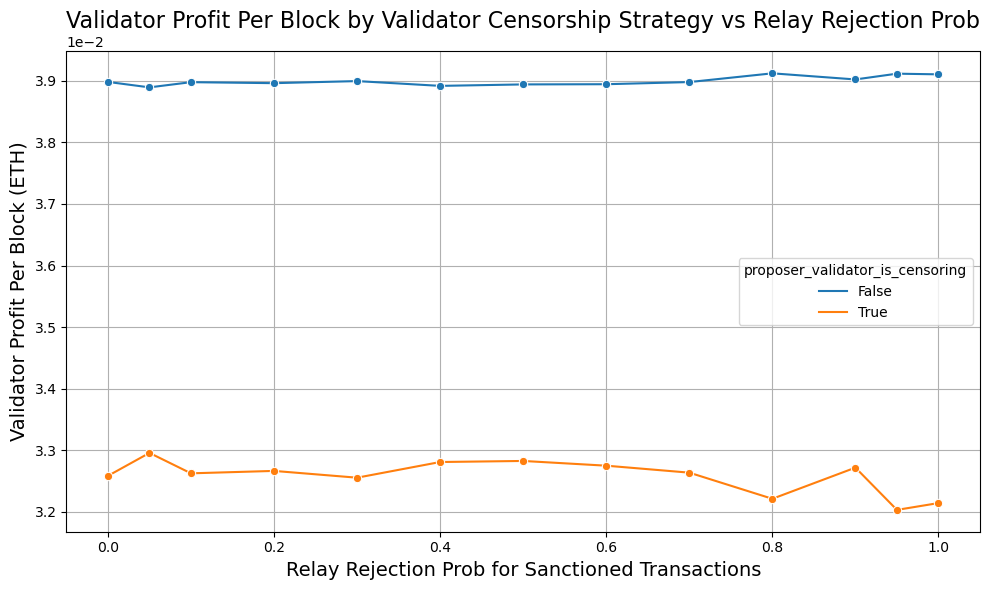

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

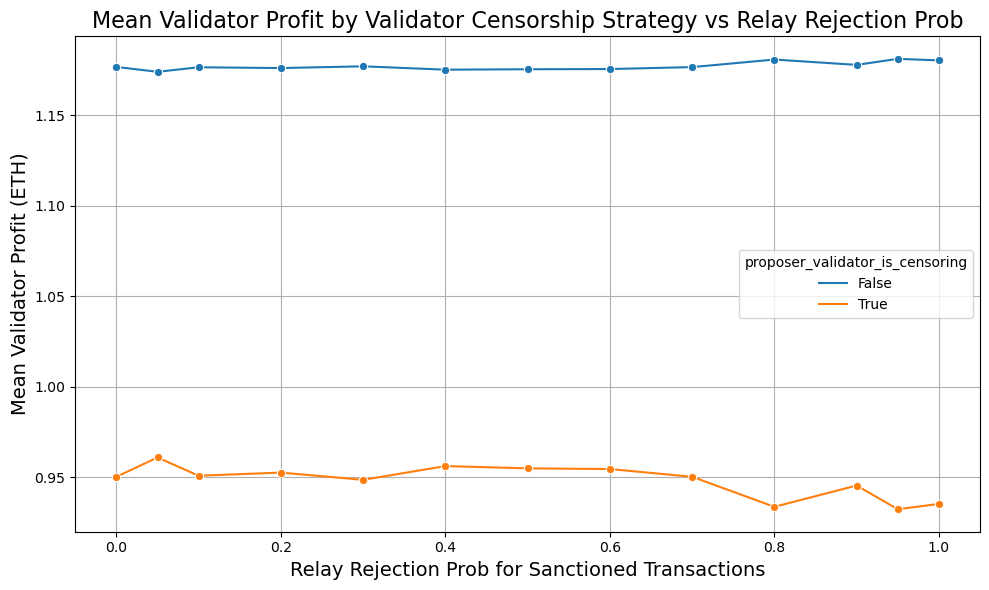

In [ ]:



base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_relay_20250613_173716"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_relay_")]


def extract_rejection_prob_relay(folder_name):
    match = re.search(r"type_1_rejection_prob_relay_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_rejection_prob_relay)


results = []


for folder in folders:
    rejection_prob_relay = extract_rejection_prob_relay(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_validator_profit_by_policy(blocks, f'rpr_{rejection_prob_relay:.3f}')
    stats['rejection_prob_relay'] = rejection_prob_relay
    results.append(stats)


combined_stats = pd.concat(results)



print(combined_stats.sort_values(['rejection_prob_relay', 'proposer_validator_is_censoring']))

# Figure 1: Validator Profit Per Block by Validator Censorship Strategy vs Relay Rejection Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_relay', y='mean_validator_profit_per_block(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Validator Profit Per Block (ETH)', fontsize=14)
plt.title('Validator Profit Per Block by Validator Censorship Strategy vs Relay Rejection Prob', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Validator Profit Per Validator by Validator Censorship Strategy vs Relay Rejection Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='rejection_prob_relay', y='mean_validator_profit_per_validator(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Mean Validator Profit (ETH)', fontsize=14)
plt.title('Mean Validator Profit by Validator Censorship Strategy vs Relay Rejection Prob', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Transactions Delay - weak_detection_prob

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_weak_detection_prob_20250620_231857"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("weak_detection_prob_")]


def extract_weak_detection_prob(folder_name):
    match = re.search(r"weak_detection_prob_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_weak_detection_prob)



for folder in folders:
    weak_detection_prob = extract_weak_detection_prob(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "transactions.csv")

    transactions = pd.read_csv(file_path, low_memory=False)
    transactions = transactions[transactions['is_proposed']].copy()

   
    if transactions.empty:
        print(f"Warning: No proposed transactions found in folder {folder}")
        continue

    transactions['proposal_delay'] = transactions['proposed_time'] - transactions['arrival_time']
    transactions['sanctioned_type'] = transactions['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
    transactions['experiment'] = f"wdp_{weak_detection_prob:.2f}"

    combined_transactions = pd.concat([combined_transactions, transactions], ignore_index=True)


if combined_transactions.empty:
    print("No transactions data available after filtering.")
else:
 
    negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
    print("Transactions with negative proposal delay:")
    print(negative_delay_txs if not negative_delay_txs.empty else "None found")


run_stats = combined_transactions.groupby(['experiment', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()
final_stats = run_stats.groupby(['experiment', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()

print("\nProposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):")
print(final_stats)


Transactions with negative proposal delay:
None found

Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):
   experiment     sanctioned_type       mean        std
0    wdp_0.00  Non-sanctioned (0)  18.411450  25.121982
1    wdp_0.00      Sanctioned (1)  30.851989  70.997223
2    wdp_0.05  Non-sanctioned (0)  17.264013  15.796137
3    wdp_0.05      Sanctioned (1)  29.133163  63.230922
4    wdp_0.10  Non-sanctioned (0)  17.394788  17.015039
5    wdp_0.10      Sanctioned (1)  29.495138  63.581899
6    wdp_0.20  Non-sanctioned (0)  17.933993  21.371466
7    wdp_0.20      Sanctioned (1)  30.192435  65.241277
8    wdp_0.30  Non-sanctioned (0)  17.512233  18.522691
9    wdp_0.30      Sanctioned (1)  29.298992  60.268869
10   wdp_0.40  Non-sanctioned (0)  17.596929  19.021148
11   wdp_0.40      Sanctioned (1)  29.511738  62.537917
12   wdp_0.50  Non-sanctioned (0)  17.128182  15.002607
13   wdp_0.50      Sanctioned (1)  27.527851  51.884555
14   wdp_0.60  Non-sanc

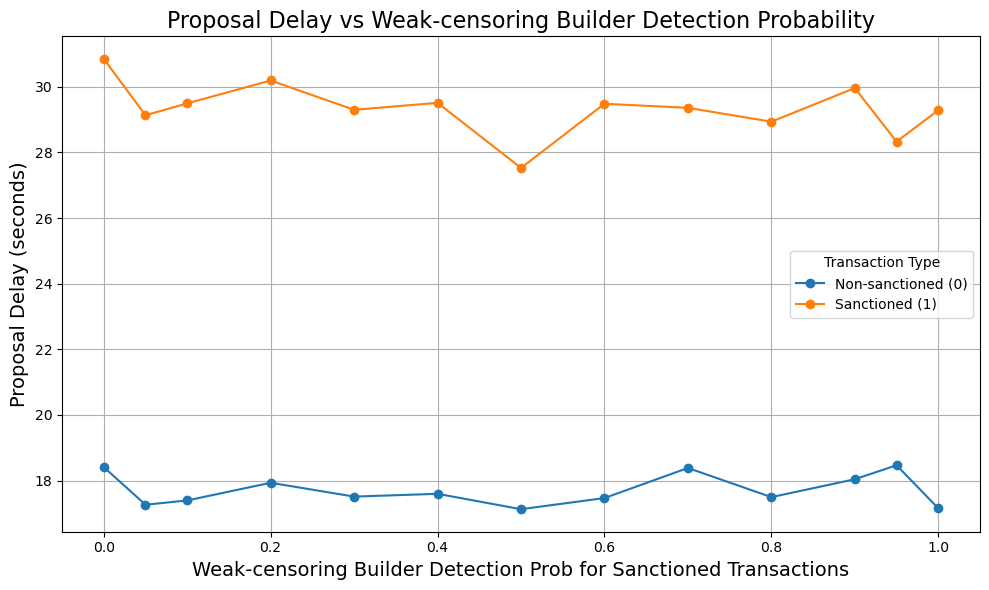

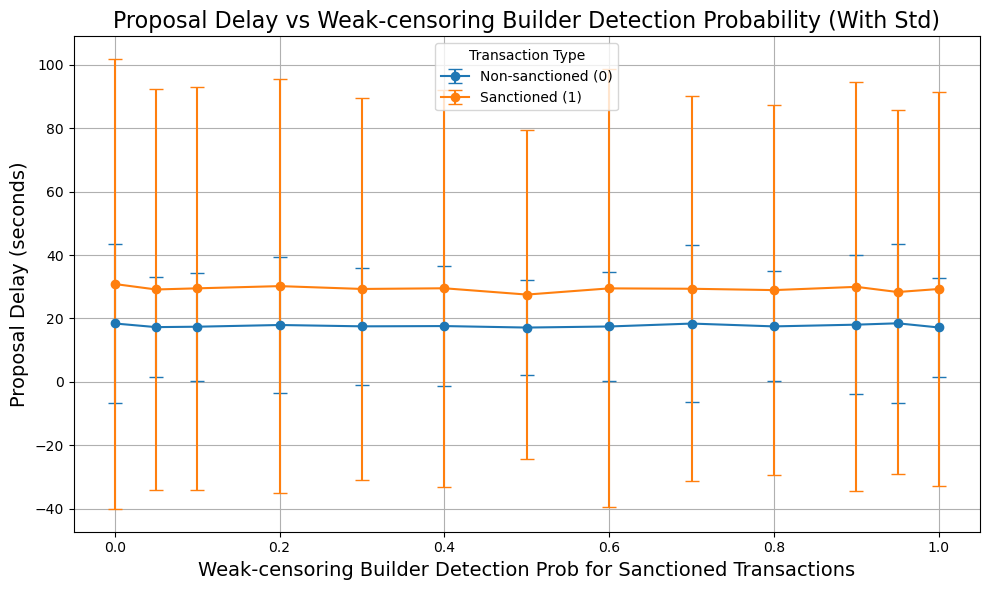

In [ ]:

final_stats['weak_detection_prob'] = final_stats['experiment'].str.extract(r'wdp_(\d+\.\d+)').astype(float)


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.plot(group['weak_detection_prob'], group['mean'], '-o', label=label)

ax.set_xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Proposal Delay vs Weak-censoring Builder Detection Probability', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.errorbar(group['weak_detection_prob'], group['mean'], yerr=group['std'],
                fmt='-o', label=label, capsize=5)

ax.set_xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Proposal Delay vs Weak-censoring Builder Detection Probability (With Std)', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


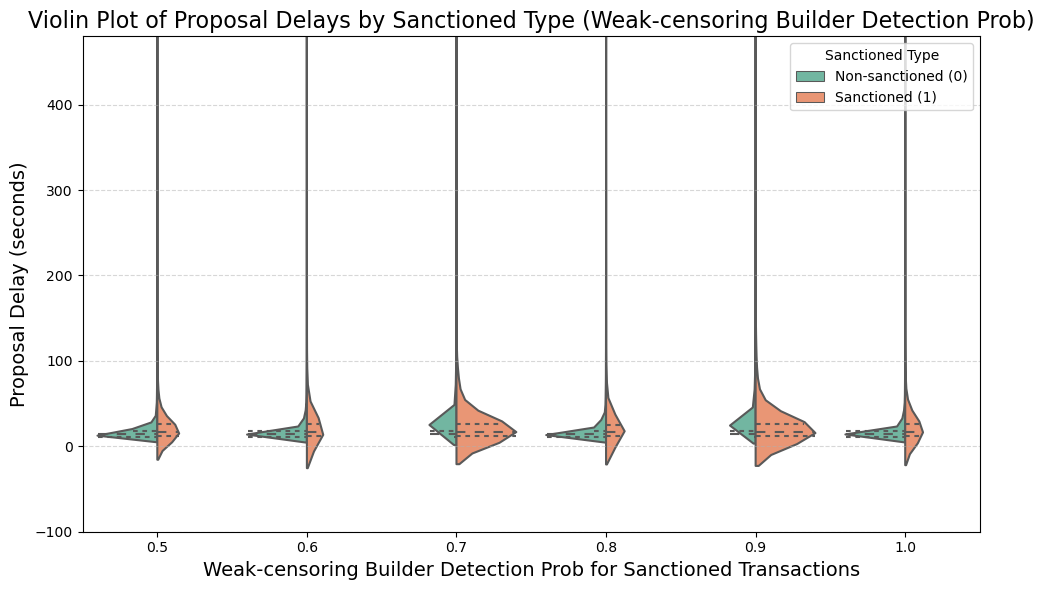

In [ ]:


selected_experiments = ['0.50', '0.60', '0.70', '0.80', '0.90', '1.00']

plt.figure(figsize=(10, 6))


rejection_prob_filtered = combined_transactions[
    combined_transactions['experiment'].str.contains('wdp_') &
    combined_transactions['experiment'].str[-4:].isin(selected_experiments)
]

sns.violinplot(
    data=rejection_prob_filtered,
    x='experiment',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)


current_labels = plt.gca().get_xticklabels()
new_labels = [f"{float(label.get_text()[-4:]):.1f}" for label in current_labels]
plt.gca().set_xticklabels(new_labels)

plt.ylim(-100, 480)
plt.xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays by Sanctioned Type (Weak-censoring Builder Detection Prob)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### The number/proportion of blocks containing sanctioned transactions
#### The number/proportion of empty blocks
#### -  weak_detection_prob

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_weak_detection_prob_20250620_231857"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("weak_detection_prob_")]


def extract_weak_detection_prob(folder_name):
    match = re.search(r"weak_detection_prob_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_weak_detection_prob)


results = []

for folder in folders:
    weak_detection_prob = extract_weak_detection_prob(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    run_ids = blocks['run_id'].unique()

    
    run_metrics = []

    for run in run_ids:
        run_blocks = blocks[blocks['run_id'] == run]

        non_empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] != 'PROPOSER')].copy()
        non_empty_blocks['contains_sanctioned'] = non_empty_blocks['num_sanctioned_tx'] > 0

        blocks_with_sanctioned = non_empty_blocks['contains_sanctioned'].sum()
        blocks_without_sanctioned = (~non_empty_blocks['contains_sanctioned']).sum()
        total_non_empty_blocks = len(non_empty_blocks)

        empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] == 'PROPOSER')]
        total_empty_blocks = empty_blocks.shape[0]
        total_proposed_blocks = total_non_empty_blocks + total_empty_blocks

        
        ratio_with_sanctioned = blocks_with_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        ratio_without_sanctioned = blocks_without_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        empty_block_ratio = total_empty_blocks / total_proposed_blocks if total_proposed_blocks > 0 else 0

        run_metrics.append({
            'blocks_with_sanctioned': blocks_with_sanctioned,
            'blocks_without_sanctioned': blocks_without_sanctioned,
            'empty_blocks': total_empty_blocks,
            'ratio_with_sanctioned': ratio_with_sanctioned,
            'ratio_without_sanctioned': ratio_without_sanctioned,
            'empty_block_ratio': empty_block_ratio
        })

    
    metrics_df = pd.DataFrame(run_metrics)

    results.append({
        'experiment': f'wdp_{weak_detection_prob:.2f}',
        'avg_blocks_with_sanctioned': metrics_df['blocks_with_sanctioned'].mean(),
        'avg_blocks_without_sanctioned': metrics_df['blocks_without_sanctioned'].mean(),
        'ratio_with_sanctioned': metrics_df['ratio_with_sanctioned'].mean(),
        'ratio_without_sanctioned': metrics_df['ratio_without_sanctioned'].mean(),
        'avg_empty_blocks': metrics_df['empty_blocks'].mean(),
        'empty_block_ratio': metrics_df['empty_block_ratio'].mean()
    })

    print(f"\nExperiment: wdp_{weak_detection_prob:.2f}")
    print(f"平均含 sanctioned_type=1 交易的区块数量: {metrics_df['blocks_with_sanctioned'].mean():.6f}")
    print(f"平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: {metrics_df['blocks_without_sanctioned'].mean():.6f}")
    print(f"含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_with_sanctioned'].mean():.2%}")
    print(f"不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_without_sanctioned'].mean():.2%}")
    print(f"平均空区块数量: {metrics_df['empty_blocks'].mean():.6f}")
    print(f"空区块占所有已提议区块的比例: {metrics_df['empty_block_ratio'].mean():.2%}")



Experiment: wdp_0.00
平均含 sanctioned_type=1 交易的区块数量: 140.700000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 158.600000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 47.01%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 52.99%
平均空区块数量: 0.700000
空区块占所有已提议区块的比例: 0.23%

Experiment: wdp_0.05
平均含 sanctioned_type=1 交易的区块数量: 139.200000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 160.500000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.45%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.55%
平均空区块数量: 0.300000
空区块占所有已提议区块的比例: 0.10%

Experiment: wdp_0.10
平均含 sanctioned_type=1 交易的区块数量: 139.800000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 159.900000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.65%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.35%
平均空区块数量: 0.300000
空区块占所有已提议区块的比例: 0.10%

Experiment: wdp_0.20
平均含 sanctioned_type=1 交易的区块数量: 136.700000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 162.600000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 45.67%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 54.33%
平均空区块数量: 0.700000
空区块占所有已提议区块的比例: 0.23%

Exp

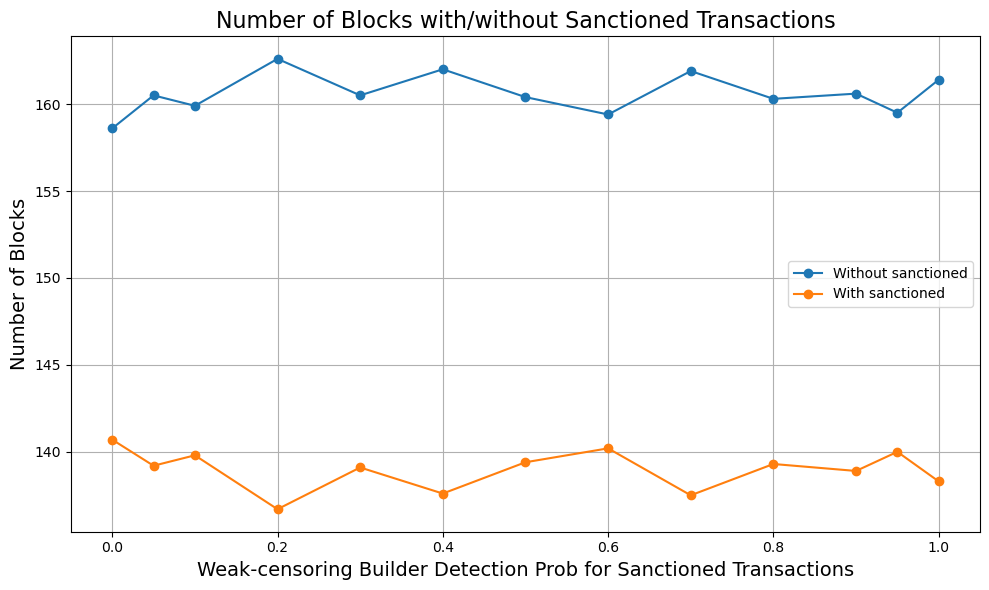

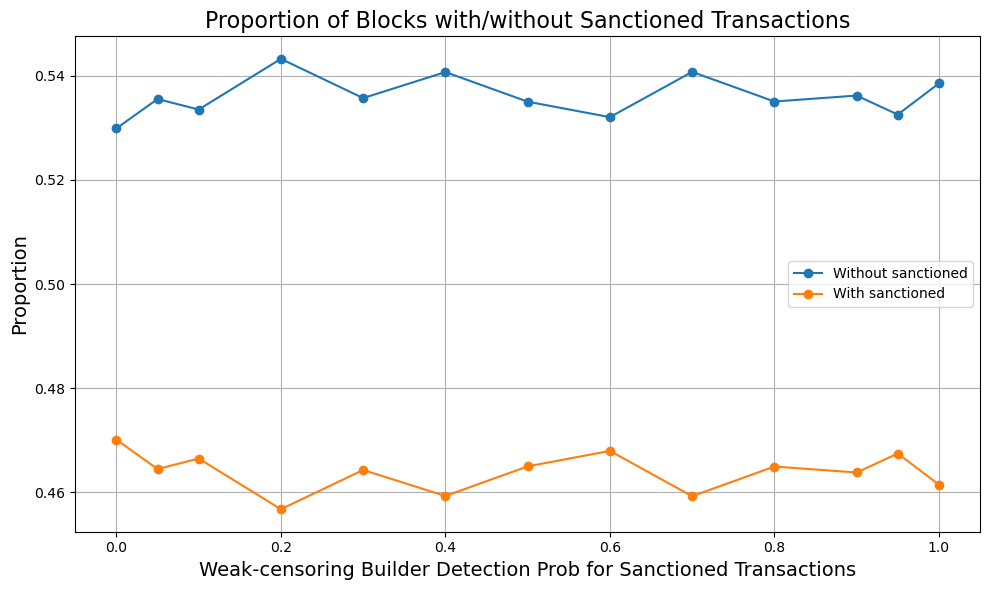

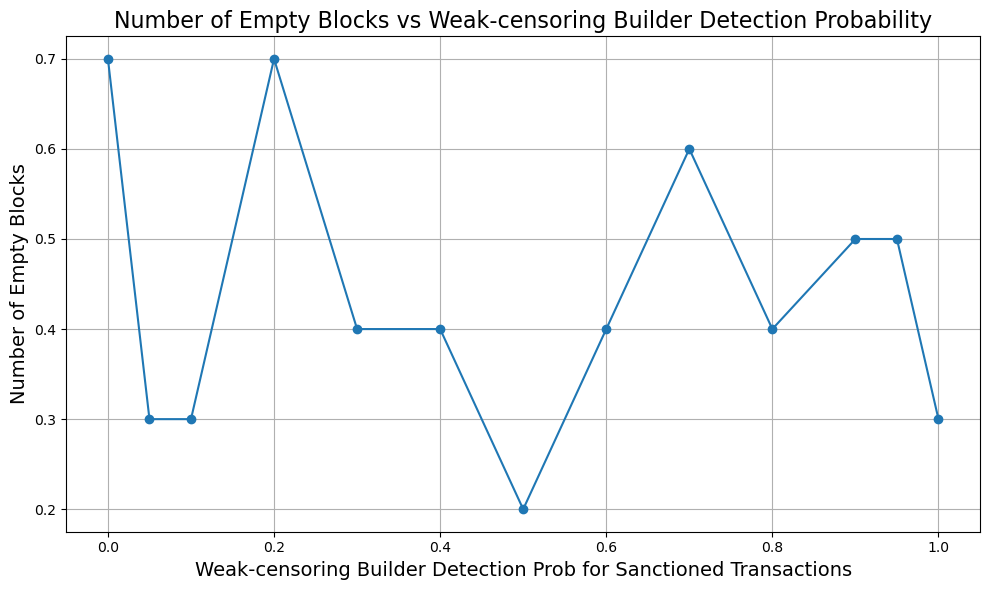

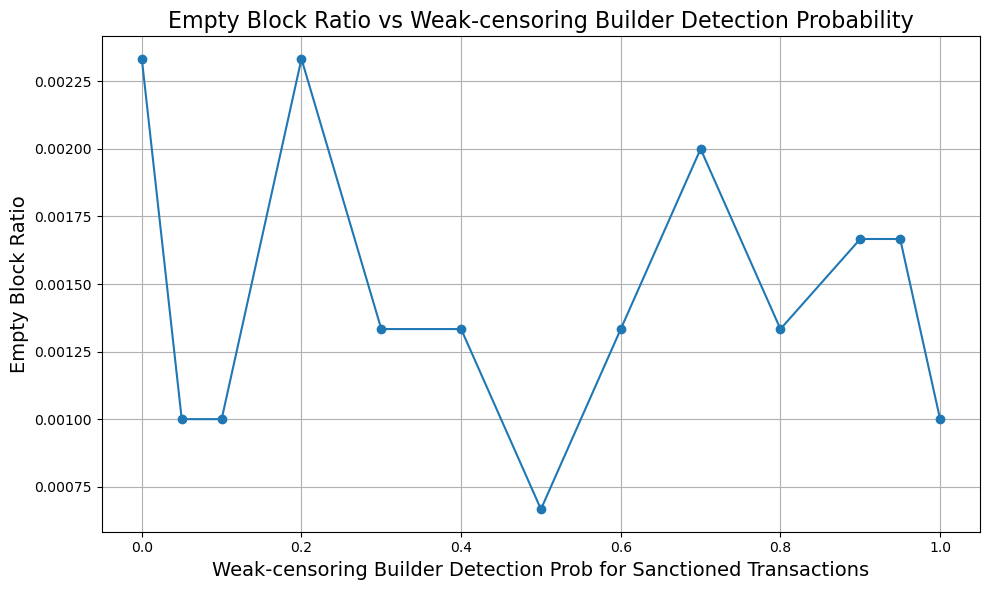

In [ ]:

results_df = pd.DataFrame(results)
results_df['weak_detection_prob'] = results_df['experiment'].str.extract(r'wdp_(\d+\.\d+)').astype(float)

# Figure 1: Number of Blocks with/without Sanctioned Transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['weak_detection_prob'], results_df['avg_blocks_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['weak_detection_prob'], results_df['avg_blocks_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Number of Blocks', fontsize=14)
plt.title('Number of Blocks with/without Sanctioned Transactions', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Proportion of Blocks with/without Sanctioned Transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['weak_detection_prob'], results_df['ratio_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['weak_detection_prob'], results_df['ratio_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Proportion of Blocks with/without Sanctioned Transactions', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 3: Number of Empty Blocks
plt.figure(figsize=(10, 6))
plt.plot(results_df['weak_detection_prob'], results_df['avg_empty_blocks'], marker='o')
plt.xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Number of Empty Blocks', fontsize=14)
plt.title('Number of Empty Blocks vs Weak-censoring Builder Detection Probability', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 4: Empty Block Ratio
plt.figure(figsize=(10, 6))
plt.plot(results_df['weak_detection_prob'], results_df['empty_block_ratio'], marker='o')
plt.xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Empty Block Ratio', fontsize=14)
plt.title('Empty Block Ratio vs Weak-censoring Builder Detection Probability', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### total_block_value，mean_block_value  - weak_detection_prob

In [ ]:

# calculate_block_value_stats for weak detection probability experiments
def calculate_block_value_stats(exp_blocks, weak_detection_prob):
    
    run_summary = exp_blocks.groupby('run_id').agg(
        total_block_value=('total_priority_fee', 'sum'),
        num_blocks=('block_id', 'count')
    ).reset_index()

    
    run_summary['mean_block_value'] = run_summary['total_block_value'] / run_summary['num_blocks']

    
    avg_total_block_value = run_summary['total_block_value'].mean()
    avg_mean_block_value = run_summary['mean_block_value'].mean()

    
    avg_total_block_value_eth = avg_total_block_value * 1e-9
    avg_mean_block_value_eth = avg_mean_block_value * 1e-9

    return {
        'weak_detection_prob': weak_detection_prob,
        'avg_total_block_value': avg_total_block_value,
        'avg_mean_block_value': avg_mean_block_value,
        'avg_total_block_value_eth': avg_total_block_value_eth,
        'avg_mean_block_value_eth': avg_mean_block_value_eth
    }


不同 weak_detection_prob 参数下的总区块价值和平均区块价值:
    weak_detection_prob  avg_total_block_value  avg_mean_block_value  \
0                  0.00           1.190817e+10          3.978764e+07   
1                  0.05           1.190831e+10          3.973439e+07   
2                  0.10           1.190862e+10          3.973542e+07   
3                  0.20           1.190775e+10          3.978623e+07   
4                  0.30           1.190804e+10          3.974692e+07   
5                  0.40           1.190807e+10          3.974699e+07   
6                  0.50           1.190832e+10          3.972104e+07   
7                  0.60           1.190766e+10          3.974546e+07   
8                  0.70           1.190811e+10          3.977400e+07   
9                  0.80           1.190861e+10          3.974849e+07   
10                 0.90           1.190840e+10          3.976134e+07   
11                 0.95           1.190812e+10          3.976050e+07   
12                 1.00

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


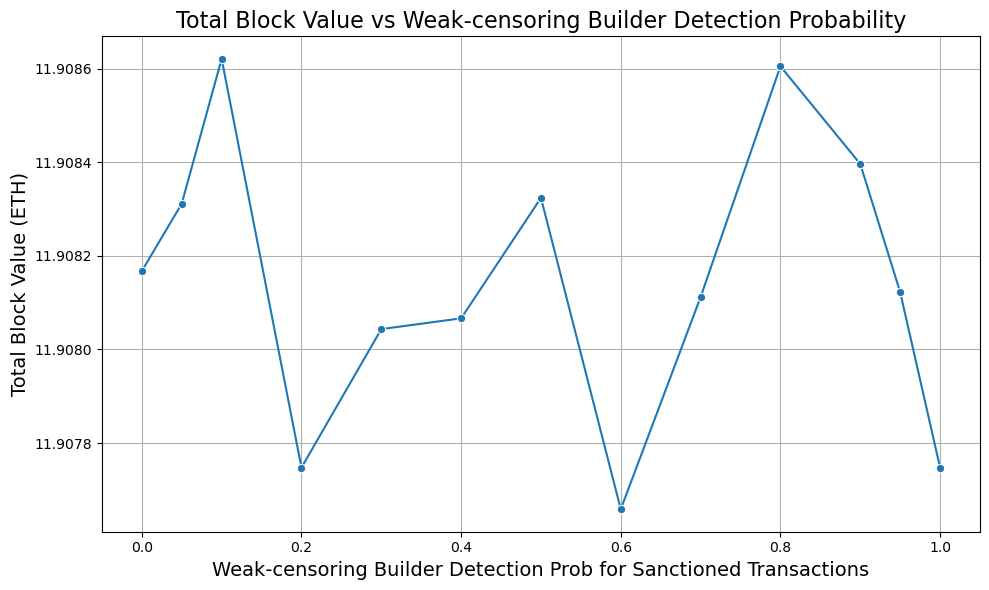

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


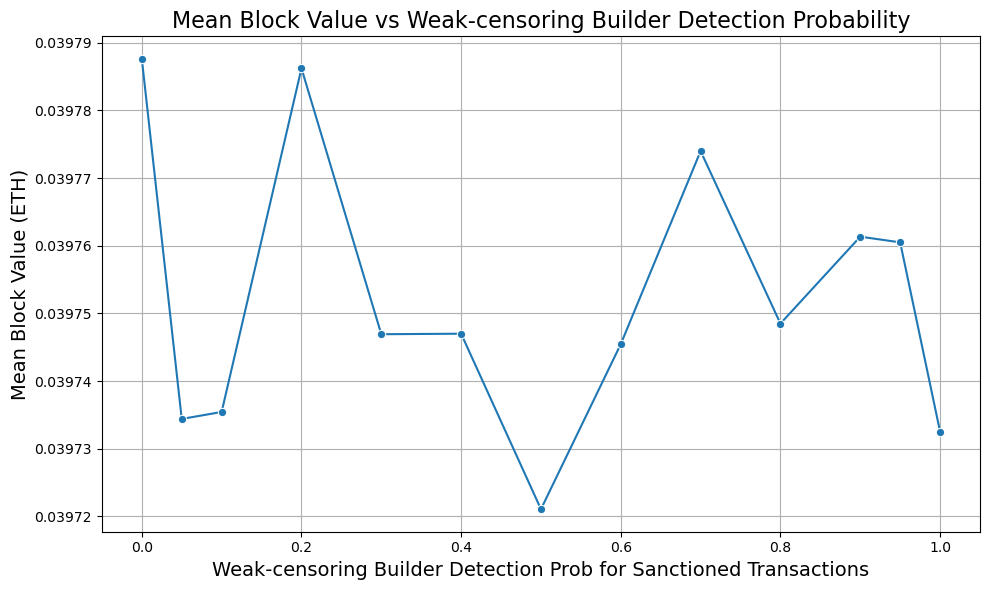

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_weak_detection_prob_20250620_231857"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("weak_detection_prob_")]


def extract_weak_detection_prob(folder_name):
    match = re.search(r"weak_detection_prob_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_weak_detection_prob)


results = []


for folder in folders:
    weak_detection_prob = extract_weak_detection_prob(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    
    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()

    
    stats = calculate_block_value_stats(blocks, weak_detection_prob)
    results.append(stats)


combined_stats = pd.DataFrame(results)


print("不同 weak_detection_prob 参数下的总区块价值和平均区块价值:")
print(combined_stats.sort_values('weak_detection_prob'))

# Figure 1: Total Block Value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='weak_detection_prob', y='avg_total_block_value_eth', marker='o')
plt.xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Total Block Value (ETH)', fontsize=14)
plt.title('Total Block Value vs Weak-censoring Builder Detection Probability', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Block Value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='weak_detection_prob', y='avg_mean_block_value_eth', marker='o')
plt.xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Mean Block Value (ETH)', fontsize=14)
plt.title('Mean Block Value vs Weak-censoring Builder Detection Probability', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


####  Average profit (per block & per node) for builders under different censorship types   - weak_detection_prob

In [ ]:
# calculate_builder_profit_by_policy for weak detection probability experiments

def calculate_builder_profit_by_policy(exp_blocks, experiment_name):
    
    policy_summary = exp_blocks.groupby(['run_id', 'builder_policy']).agg(
        total_builder_profit=('builder_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_builders=('builder_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = ['strict', 'weak', 'non']
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'builder_policy'])

    policy_summary = policy_summary.set_index(['run_id', 'builder_policy']).reindex(
        full_index, fill_value=0
    ).reset_index()

    
    policy_summary['mean_profit_per_block'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )
    
    policy_summary['mean_profit_per_builder'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_builders'] if row['num_builders'] > 0 else 0, axis=1
    )

    
    final_policy_avg = policy_summary.groupby('builder_policy').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_builder': 'mean'
    }).reset_index()

    
    final_policy_avg['mean_builder_profit_per_block(ETH)'] = final_policy_avg['mean_profit_per_block'] * 1e-9
    final_policy_avg['mean_builder_profit_per_builder(ETH)'] = final_policy_avg['mean_profit_per_builder'] * 1e-9

    final_policy_avg['experiment'] = experiment_name

    return final_policy_avg[[
        'builder_policy',
        'mean_builder_profit_per_block(ETH)',
        'mean_builder_profit_per_builder(ETH)',
        'experiment'
    ]]


  builder_policy  mean_builder_profit_per_block(ETH)  \
0            non                            0.002043   
1         strict                            0.001758   
2           weak                            0.002048   
0            non                            0.002043   
1         strict                            0.001788   
2           weak                            0.002004   
0            non                            0.002041   
1         strict                            0.001785   
2           weak                            0.002028   
0            non                            0.002044   
1         strict                            0.001786   
2           weak                            0.002028   
0            non                            0.002046   
1         strict                            0.001780   
2           weak                            0.001990   
0            non                            0.002047   
1         strict                            0.00

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

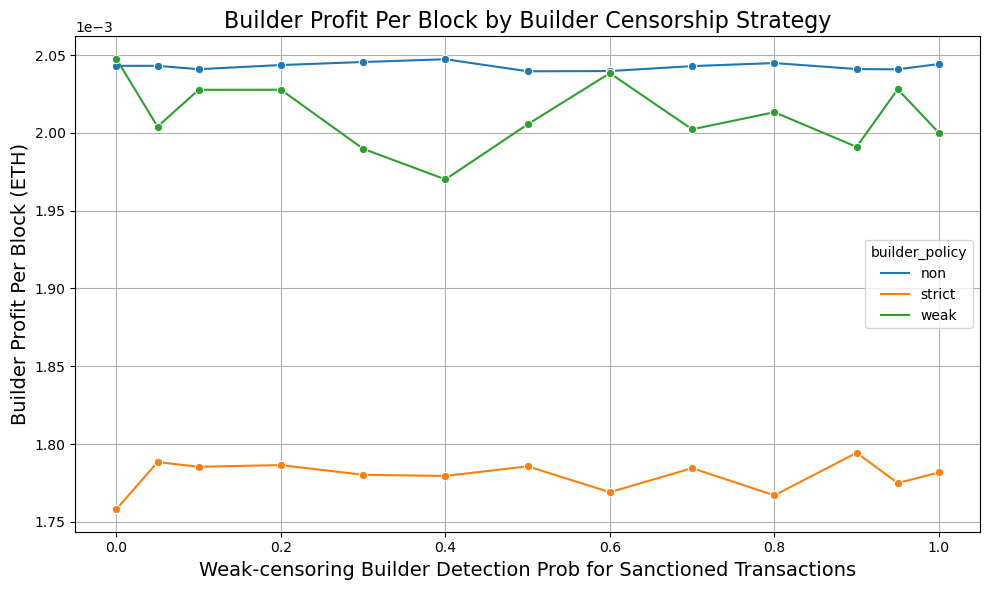

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

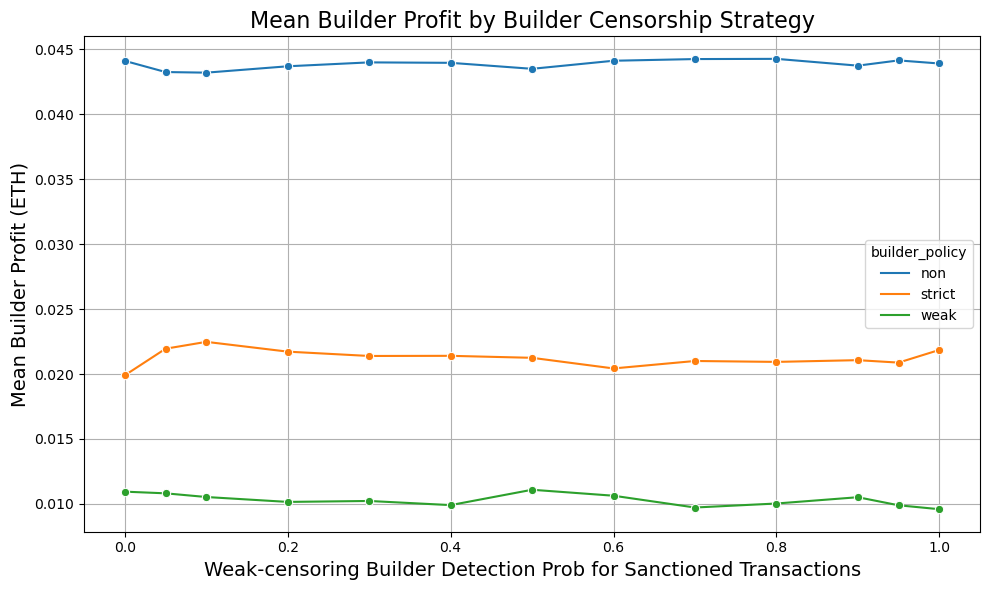

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_weak_detection_prob_20250620_231857"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("weak_detection_prob_")]


def extract_weak_detection_prob(folder_name):
    match = re.search(r"weak_detection_prob_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_weak_detection_prob)


results = []


for folder in folders:
    weak_detection_prob = extract_weak_detection_prob(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_builder_profit_by_policy(blocks, f'wdp_{weak_detection_prob:.3f}')
    stats['weak_detection_prob'] = weak_detection_prob
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['weak_detection_prob', 'builder_policy']))

# Figure 1: Builder Profit Per Block by Builder Censorship Strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='weak_detection_prob', y='mean_builder_profit_per_block(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Builder Profit Per Block (ETH)', fontsize=14)
plt.title('Builder Profit Per Block by Builder Censorship Strategy', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Builder Profit Per Builder by Builder Censorship Strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='weak_detection_prob', y='mean_builder_profit_per_builder(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Mean Builder Profit (ETH)', fontsize=14)
plt.title('Mean Builder Profit by Builder Censorship Strategy', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


####  Average profit (per block & per node) for validators under different censorship types  - type_1_rejection_prob_relay

In [ ]:

# calculate_validator_profit_by_policy for weak detection probability experiments

def calculate_validator_profit_by_policy(exp_blocks, experiment_name):
    validator_summary = exp_blocks.groupby(['run_id', 'proposer_validator_is_censoring']).agg(
        total_proposer_profit=('proposer_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_validators=('proposer_validator_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = [True, False]
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'proposer_validator_is_censoring'])

    validator_summary = validator_summary.set_index(['run_id', 'proposer_validator_is_censoring']).reindex(
        full_index, fill_value=0
    ).reset_index()

    validator_summary['mean_profit_per_block'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )

    validator_summary['mean_profit_per_validator'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_validators'] if row['num_validators'] > 0 else 0, axis=1
    )

    final_validator_avg = validator_summary.groupby('proposer_validator_is_censoring').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_validator': 'mean'
    }).reset_index()

    final_validator_avg['mean_validator_profit_per_block(ETH)'] = final_validator_avg['mean_profit_per_block'] * 1e-9
    final_validator_avg['mean_validator_profit_per_validator(ETH)'] = final_validator_avg['mean_profit_per_validator'] * 1e-9

    final_validator_avg['experiment'] = experiment_name

    return final_validator_avg[[
        'proposer_validator_is_censoring',
        'mean_validator_profit_per_block(ETH)',
        'mean_validator_profit_per_validator(ETH)',
        'experiment'
    ]]


   proposer_validator_is_censoring  mean_validator_profit_per_block(ETH)  \
0                            False                              0.039183   
1                             True                              0.032063   
0                            False                              0.039108   
1                             True                              0.032167   
0                            False                              0.039115   
1                             True                              0.032123   
0                            False                              0.039155   
1                             True                              0.032172   
0                            False                              0.039120   
1                             True                              0.032161   
0                            False                              0.039150   
1                             True                              0.031969   
0           

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

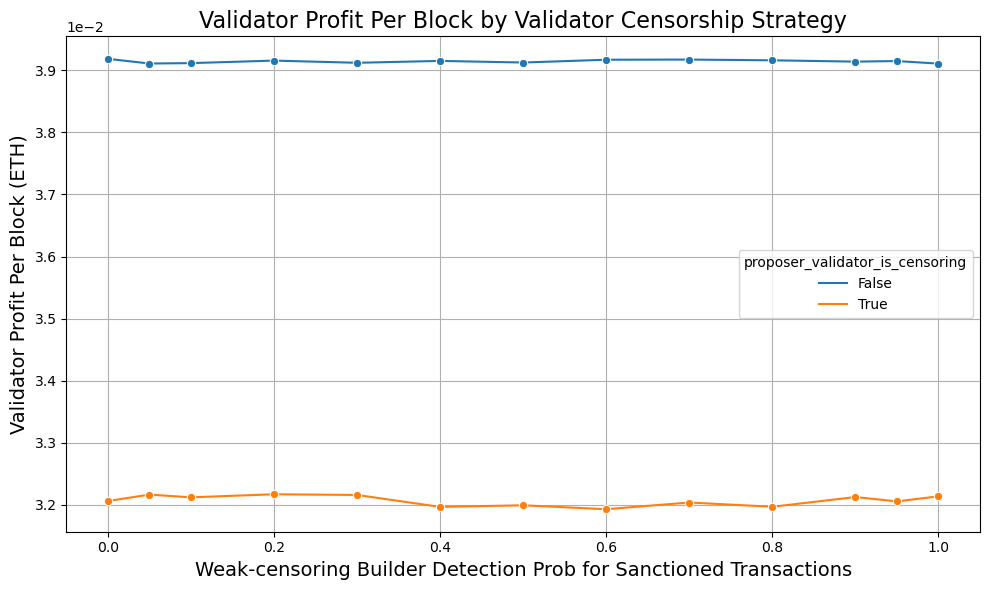

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

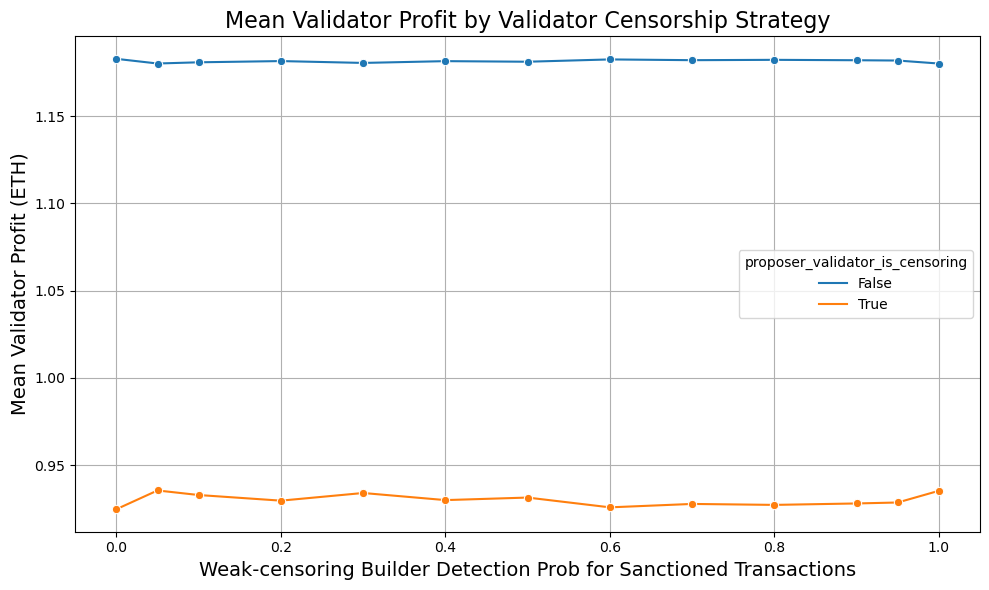

In [ ]:



base_dir = "simulation_results_SA_0608/sensitivity_weak_detection_prob_20250620_231857"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("weak_detection_prob_")]


def extract_weak_detection_prob(folder_name):
    match = re.search(r"weak_detection_prob_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_weak_detection_prob)


results = []


for folder in folders:
    weak_detection_prob = extract_weak_detection_prob(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    
    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()

    
    stats = calculate_validator_profit_by_policy(blocks, f'wdp_{weak_detection_prob:.3f}')
    stats['weak_detection_prob'] = weak_detection_prob
    results.append(stats)


combined_stats = pd.concat(results)



print(combined_stats.sort_values(['weak_detection_prob', 'proposer_validator_is_censoring']))

# Figure 1: Validator Profit Per Block by Validator Censorship Strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='weak_detection_prob', y='mean_validator_profit_per_block(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Validator Profit Per Block (ETH)', fontsize=14)
plt.title('Validator Profit Per Block by Validator Censorship Strategy', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Validator Profit Per Validator by Validator Censorship Strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='weak_detection_prob', y='mean_validator_profit_per_validator(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Weak-censoring Builder Detection Prob for Sanctioned Transactions', fontsize=14)
plt.ylabel('Mean Validator Profit (ETH)', fontsize=14)
plt.title('Mean Validator Profit by Validator Censorship Strategy', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Two factor analysis - type_1_rejection_prob_builder & type_1_rejection_prob_relay 

#### Transaction Delay - type_1_rejection_prob_builder & type_1_rejection_prob_relay

In [ ]:



base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_builder_relay_20250613_194959"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_builder_relay_")]


def extract_rejection_prob_builder_relay(folder_name):
    match = re.search(r"type_1_rejection_prob_builder_relay_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        rp_builder = float(match.group(1))
        rp_relay = float(match.group(2))
        return (rp_builder, rp_relay)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_rejection_prob_builder_relay)


for folder in folders:
    rp_builder, rp_relay = extract_rejection_prob_builder_relay(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "transactions.csv")

    transactions = pd.read_csv(file_path, low_memory=False)
    transactions = transactions[transactions['is_proposed']].copy()
    transactions['proposal_delay'] = transactions['proposed_time'] - transactions['arrival_time']
    transactions['sanctioned_type'] = transactions['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})

 
    transactions['experiment'] = f"rpb_{rp_builder:.3f}_rpr_{rp_relay:.3f}"
    transactions['rp_builder'] = rp_builder
    transactions['rp_relay'] = rp_relay

    combined_transactions = pd.concat([combined_transactions, transactions], ignore_index=True)


negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
print("Transactions with negative proposal delay:")
print(negative_delay_txs)


run_stats = combined_transactions.groupby(['rp_builder', 'rp_relay', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()

final_stats = run_stats.groupby(['rp_builder', 'rp_relay', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()

print("\nProposal Delay Statistics by Builder & Relay Rejection Prob and Sanctioned Type (averaged by run_id):")
# print(final_stats)

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

display(final_stats)

Transactions with negative proposal delay:
Empty DataFrame
Columns: [run_id, tx_id, arrival_time, transaction_type, sanctioned_type, gas_used, base_fee_per_gas, priority_fee_per_gas, priority_fee, gas_fee, proposed_block_id, proposed_builder_id, proposed_builder_policy, selected_relay_id, selected_relay_policy, proposer_validator_id, proposer_validator_is_censoring, proposed_time, confirmed_time, is_proposed, is_confirmed, proposal_delay, experiment, rp_builder, rp_relay]
Index: []

Proposal Delay Statistics by Builder & Relay Rejection Prob and Sanctioned Type (averaged by run_id):


rp_builder  rp_relay     sanctioned_type       mean         std
0          0.0       0.0  Non-sanctioned (0)  16.964962   14.448338
1          0.0       0.0      Sanctioned (1)  17.849584   15.513600
2          0.0       0.2  Non-sanctioned (0)  16.935112   14.681508
3          0.0       0.2      Sanctioned (1)  17.812483   13.326867
4          0.0       0.4  Non-sanctioned (0)  16.877736   14.133636
5          0.0       0.4      Sanctioned (1)  17.851754   14.014864
6          0.0       0.6  Non-sanctioned (0)  17.890058   20.864973
7          0.0       0.6      Sanctioned (1)  20.278276   23.042405
8          0.0       0.8  Non-sanctioned (0)  20.131760   35.982882
9          0.0       0.8      Sanctioned (1)  24.539028   45.688272
10         0.0       1.0  Non-sanctioned (0)  39.665218  146.797338
11         0.0       1.0      Sanctioned (1)  52.512910  163.900251
12         0.2       0.0  Non-sanctioned (0)  16.922124   14.202435
13         0.2       0.0      Sanctioned (1)  18.236173   14.058317
14         0.2       0.2  Non-sanctioned (0)  16.937686   14.242166
15         0.2       0.2      Sanctioned (1)  17.996580   13.554536
16         0.2       0.4  Non-sanctioned (0)  16.974800   14.544260
17         0.2       0.4      Sanctioned (1)  18.566637   16.092893
18         0.2       0.6  Non-sanctioned (0)  17.271486   15.698958
19         0.2       0.6      Sanctioned (1)  19.802695   19.953185
20         0.2       0.8  Non-sanctioned (0)  20.886172   43.033450
21         0.2       0.8      Sanctioned (1)  26.362945   56.072088
22         0.2       1.0  Non-sanctioned (0)  32.644137  108.865671
23         0.2       1.0      Sanctioned (1)  43.494896  132.363732
24         0.4       0.0  Non-sanctioned (0)  16.921301   14.302717
25         0.4       0.0      Sanctioned (1)  18.487140   15.299294
26         0.4       0.2  Non-sanctioned (0)  16.966097   14.328307
27         0.4       0.2      Sanctioned (1)  18.740618   16.317841
28         0.4       0.4  Non-sanctioned (0)  16.991288   14.768349
29         0.4       0.4      Sanctioned (1)  18.966888   17.258252
30         0.4       0.6  Non-sanctioned (0)  17.347918   16.575113
31         0.4       0.6      Sanctioned (1)  20.239512   21.394339
32         0.4       0.8  Non-sanctioned (0)  19.329598   30.688184
33         0.4       0.8      Sanctioned (1)  25.744794   47.597061
34         0.4       1.0  Non-sanctioned (0)  28.391582   80.099452
35         0.4       1.0      Sanctioned (1)  38.261032  107.414329
36         0.6       0.0  Non-sanctioned (0)  16.942356   14.326598
37         0.6       0.0      Sanctioned (1)  19.065499   17.241048
38         0.6       0.2  Non-sanctioned (0)  17.016008   14.666147
39         0.6       0.2      Sanctioned (1)  19.290472   16.898234
40         0.6       0.4  Non-sanctioned (0)  16.902667   14.442498
41         0.6       0.4      Sanctioned (1)  20.010475   22.036278
42         0.6       0.6  Non-sanctioned (0)  17.158444   15.211589
43         0.6       0.6      Sanctioned (1)  20.840195   23.942469
44         0.6       0.8  Non-sanctioned (0)  17.433083   17.222104
45         0.6       0.8      Sanctioned (1)  24.427010   43.791450
46         0.6       1.0  Non-sanctioned (0)  24.541555   67.776746
47         0.6       1.0      Sanctioned (1)  36.545050  103.671516
48         0.8       0.0  Non-sanctioned (0)  16.987624   14.518144
49         0.8       0.0      Sanctioned (1)  19.874370   20.153823
50         0.8       0.2  Non-sanctioned (0)  16.819882   14.146424
51         0.8       0.2      Sanctioned (1)  20.069245   20.928365
52         0.8       0.4  Non-sanctioned (0)  16.900464   14.367795
53         0.8       0.4      Sanctioned (1)  20.817415   23.582241
54         0.8       0.6  Non-sanctioned (0)  16.911753   14.162767
55         0.8       0.6      Sanctioned (1)  20.852812   22.404019
56         0.8       0.8  Non-sanctioned (0)  17.950918   20.383909
57         0.8       0.8      Sanctioned (1)  25.319690   44

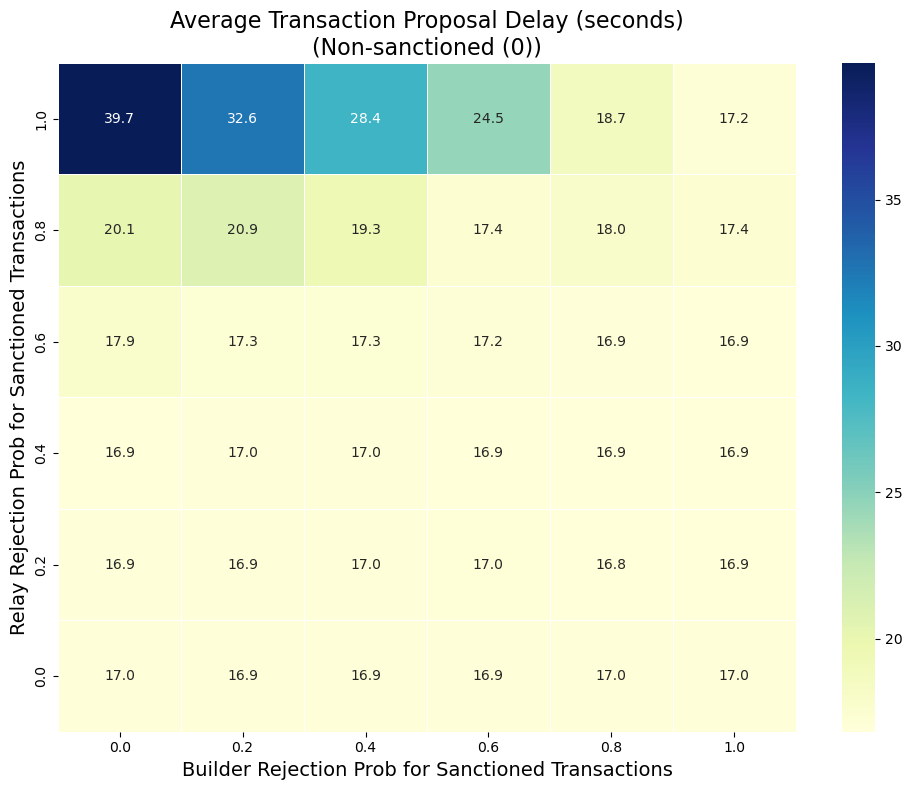

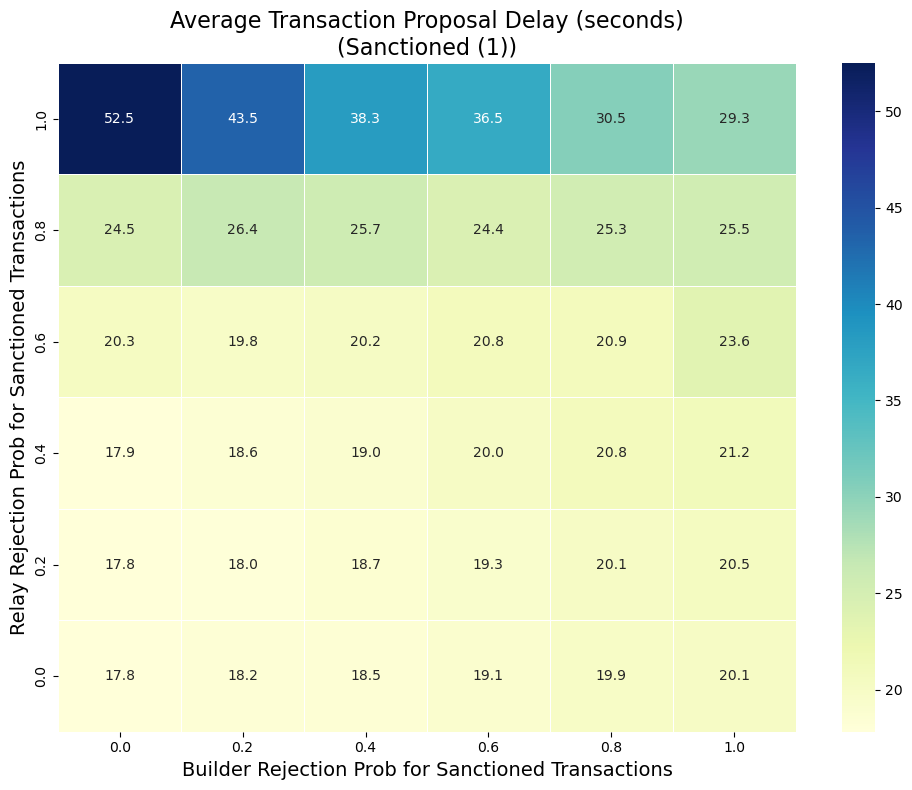

In [ ]:

full_rp_relays = sorted(final_stats['rp_relay'].unique())
full_rp_builders = sorted(final_stats['rp_builder'].unique())

for sanctioned_type in final_stats['sanctioned_type'].unique():
    subset = final_stats[final_stats['sanctioned_type'] == sanctioned_type]

    heatmap_data = subset.pivot(index='rp_relay', columns='rp_builder', values='mean').reindex(index=full_rp_relays, columns=full_rp_builders)

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".1f",
        cmap="YlGnBu",
        linewidths=.5,
        # cbar_kws={'label': 'Mean Proposal Delay (s)'},
        mask=heatmap_data.isnull(),  
    )


    for i in range(heatmap_data.shape[0]):
        for j in range(heatmap_data.shape[1]):
            if pd.isna(heatmap_data.iloc[i, j]):
                ax.text(
                    j + 0.5, i + 0.5, 'N/A',
                    ha='center', va='center', color='grey'
                )


    ax.invert_yaxis()

    plt.title(f'Average Transaction Proposal Delay (seconds)\n({sanctioned_type})', fontsize=16)
    plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
    plt.ylabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
    
    plt.tight_layout()
    plt.show()


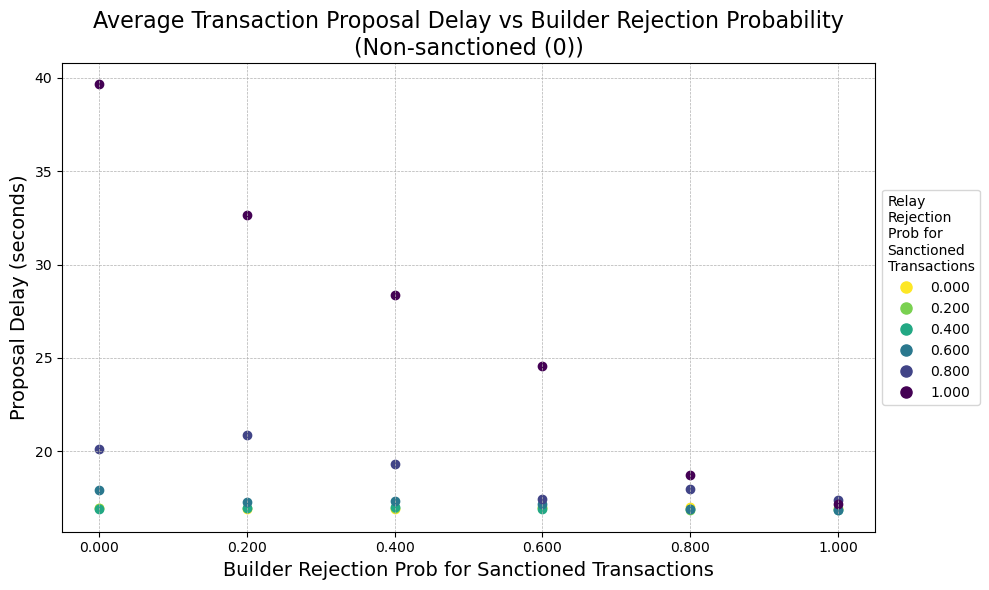

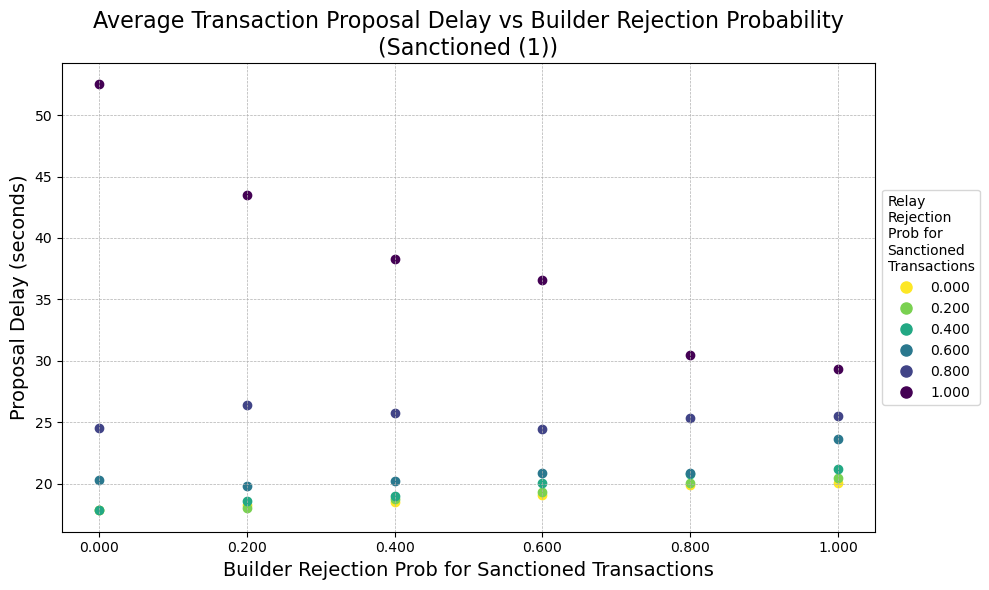

In [ ]:


rp_relay_values = sorted(final_stats['rp_relay'].unique())
colors = plt.cm.viridis(np.linspace(1, 0, len(rp_relay_values)))  

for sanctioned_type in final_stats['sanctioned_type'].unique():
    subset = final_stats[final_stats['sanctioned_type'] == sanctioned_type]

    fig, ax = plt.subplots(figsize=(10, 6))

 
    unique_rp_builder = sorted(subset['rp_builder'].unique())
    rp_builder_to_pos = {rp: pos for pos, rp in enumerate(unique_rp_builder)}


    for i, rp_relay in enumerate(rp_relay_values):
        data = subset[subset['rp_relay'] == rp_relay]
        positions = [rp_builder_to_pos[bt] for bt in data['rp_builder']]
        ax.scatter(positions, data['mean'],
                   color=colors[i], marker='o', label=f'{rp_relay:.3f}', alpha=1.0)

    ax.set_xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
    ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
    ax.grid(True, linestyle='--', linewidth=0.5)

 
    ax.set_xticks(range(len(unique_rp_builder)))
    ax.set_xticklabels([f'{x:.3f}' for x in unique_rp_builder])

   
    legend_elements = [plt.Line2D([0], [0], marker='o', color=colors[i], linestyle='', markersize=8, label=f'{rp_relay:.3f}')
                       for i, rp_relay in enumerate(rp_relay_values)]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), title='Relay\nRejection\nProb for\nSanctioned\nTransactions')

    plt.title(f'Average Transaction Proposal Delay vs Builder Rejection Probability\n({sanctioned_type})', fontsize=16)
    plt.tight_layout()
    plt.show()

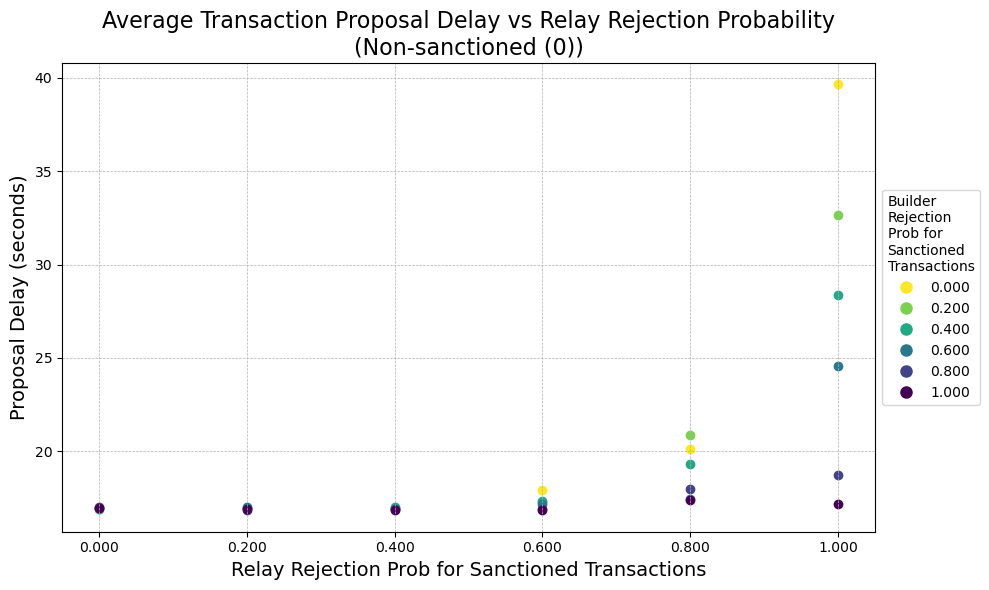

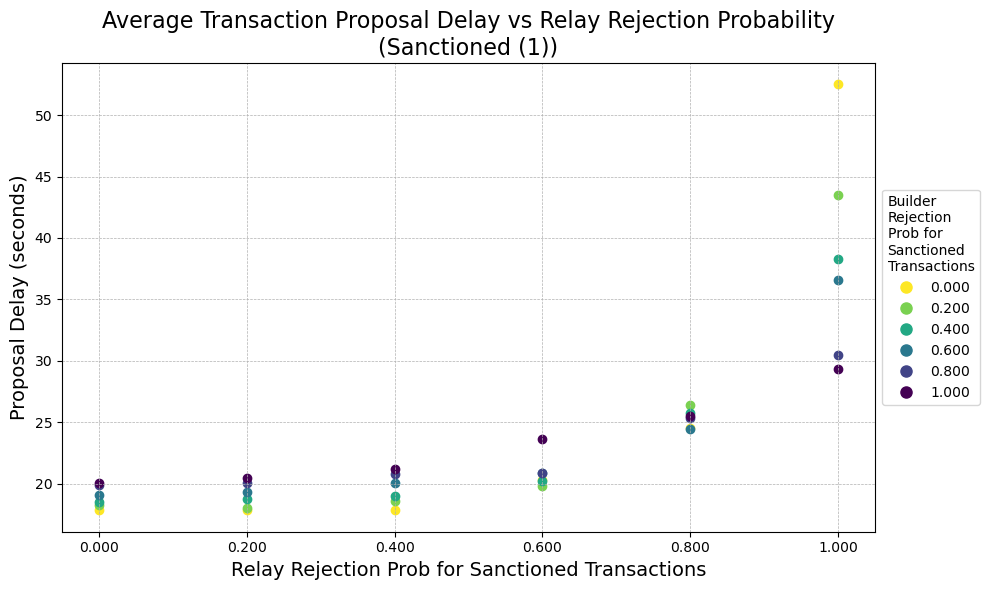

In [ ]:


rp_builder_values = sorted(final_stats['rp_builder'].unique())
colors = plt.cm.viridis(np.linspace(1, 0, len(rp_builder_values)))  

for sanctioned_type in final_stats['sanctioned_type'].unique():
    subset = final_stats[final_stats['sanctioned_type'] == sanctioned_type]

    fig, ax = plt.subplots(figsize=(10, 6))

    
    unique_rp_relay = sorted(subset['rp_relay'].unique())
    rp_relay_to_pos = {rp: pos for pos, rp in enumerate(unique_rp_relay)}

    
    for i, rp_builder in enumerate(rp_builder_values):
        data = subset[subset['rp_builder'] == rp_builder]
        positions = [rp_relay_to_pos[rt] for rt in data['rp_relay']]
        ax.scatter(positions, data['mean'],
                   color=colors[i], marker='o', label=f'{rp_builder:.3f}', alpha=1.0)

    ax.set_xlabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
    ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
    ax.grid(True, linestyle='--', linewidth=0.5)

    
    ax.set_xticks(range(len(unique_rp_relay)))
    ax.set_xticklabels([f'{x:.3f}' for x in unique_rp_relay])

    
    legend_elements = [plt.Line2D([0], [0], marker='o', color=colors[i], linestyle='', markersize=8, label=f'{rp_builder:.3f}')
                       for i, rp_builder in enumerate(rp_builder_values)]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), title='Builder\nRejection\nProb for\nSanctioned\nTransactions')

    plt.title(f'Average Transaction Proposal Delay vs Relay Rejection Probability\n({sanctioned_type})', fontsize=16)
    plt.tight_layout()
    plt.show()


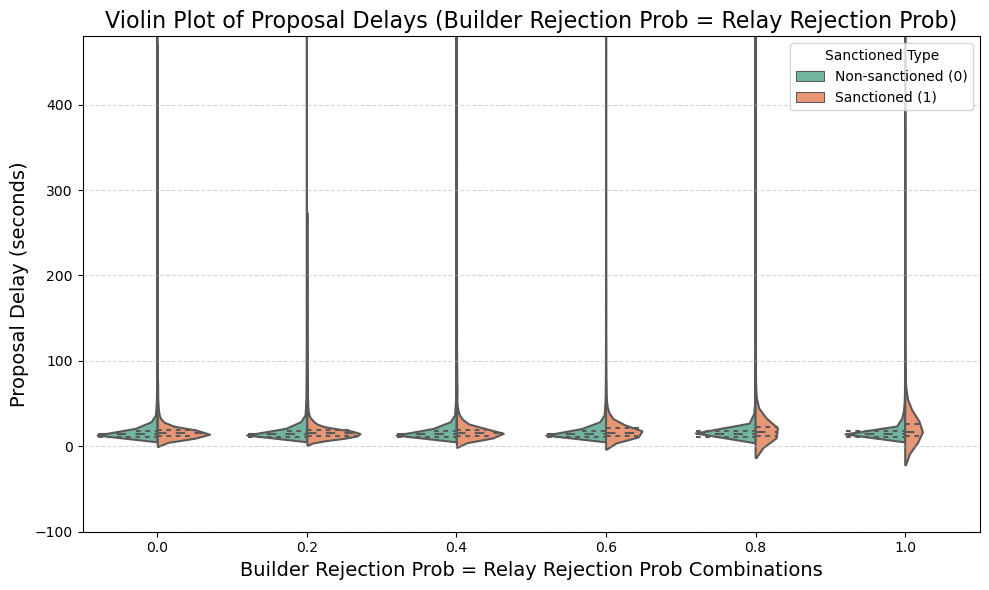

In [ ]:

selected_probs = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

selected_data = combined_transactions[
    combined_transactions['rp_builder'].isin(selected_probs) &
    (combined_transactions['rp_builder'] == combined_transactions['rp_relay'])
].copy()


selected_data['rp_label'] = selected_data['rp_builder'].apply(lambda x: f"{x:.1f}")

plt.figure(figsize=(10, 6))

sns.violinplot(
    data=selected_data,
    x='rp_label',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)

plt.ylim(-100, 480)
plt.xlabel('Builder Rejection Prob = Relay Rejection Prob Combinations', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays (Builder Rejection Prob = Relay Rejection Prob)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


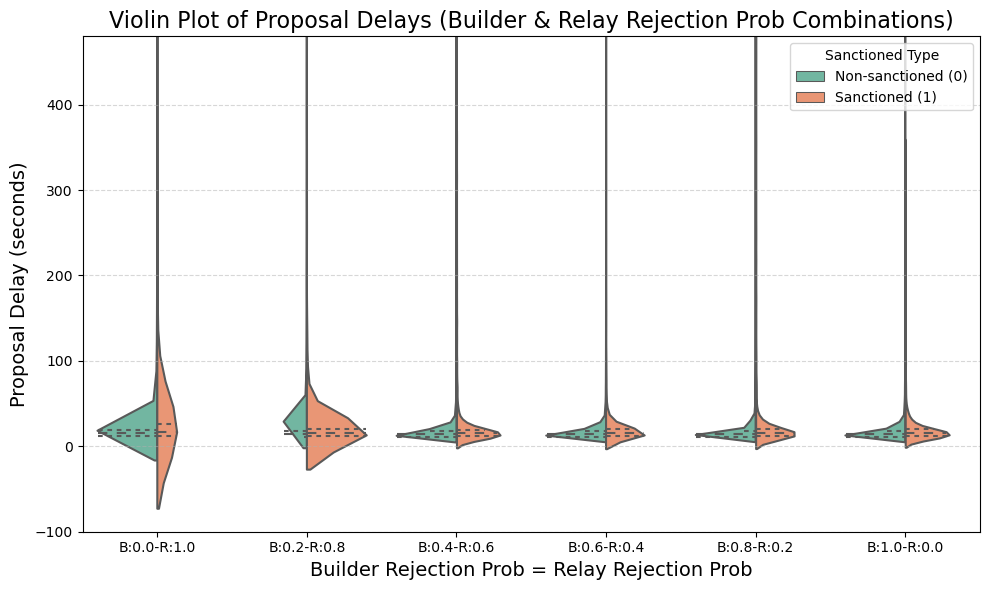

In [ ]:

diff_probs = [
    (0.0, 1.0),
    (0.2, 0.8),
    (0.4, 0.6),
    (0.6, 0.4),
    (0.8, 0.2),
    (1.0, 0.0)
]

selected_data = combined_transactions[
    combined_transactions.apply(
        lambda row: (row['rp_builder'], row['rp_relay']) in diff_probs, axis=1
    )
].copy()


selected_data['rp_label'] = selected_data.apply(
    lambda row: f"B:{row['rp_builder']:.1f}-R:{row['rp_relay']:.1f}", axis=1
)

plt.figure(figsize=(10, 6))

sns.violinplot(
    data=selected_data,
    x='rp_label',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)

plt.ylim(-100, 480)
plt.xlabel('Builder Rejection Prob = Relay Rejection Prob', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays (Builder & Relay Rejection Prob Combinations)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#### The number/proportion of blocks containing sanctioned transactions
#### The number/proportion of empty blocks
####  -  type_1_rejection_pro_builder & type_1_rejection_pro_relay

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_builder_relay_20250613_194959"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_builder_relay_")]


def extract_rejection_prob_builder_relay(folder_name):
    match = re.search(r"type_1_rejection_prob_builder_relay_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        rp_builder = float(match.group(1))
        rp_relay = float(match.group(2))
        return (rp_builder, rp_relay)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_rejection_prob_builder_relay)


results = []

for folder in folders:
    rp_builder, rp_relay = extract_rejection_prob_builder_relay(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    run_ids = blocks['run_id'].unique()

    
    run_metrics = []

    for run in run_ids:
        run_blocks = blocks[blocks['run_id'] == run]

        non_empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] != 'PROPOSER')].copy()
        non_empty_blocks['contains_sanctioned'] = non_empty_blocks['num_sanctioned_tx'] > 0

        blocks_with_sanctioned = non_empty_blocks['contains_sanctioned'].sum()
        blocks_without_sanctioned = (~non_empty_blocks['contains_sanctioned']).sum()
        total_non_empty_blocks = len(non_empty_blocks)

        empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] == 'PROPOSER')]
        total_empty_blocks = empty_blocks.shape[0]
        total_proposed_blocks = total_non_empty_blocks + total_empty_blocks

        
        ratio_with_sanctioned = blocks_with_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        ratio_without_sanctioned = blocks_without_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        empty_block_ratio = total_empty_blocks / total_proposed_blocks if total_proposed_blocks > 0 else 0

        run_metrics.append({
            'blocks_with_sanctioned': blocks_with_sanctioned,
            'blocks_without_sanctioned': blocks_without_sanctioned,
            'empty_blocks': total_empty_blocks,
            'ratio_with_sanctioned': ratio_with_sanctioned,
            'ratio_without_sanctioned': ratio_without_sanctioned,
            'empty_block_ratio': empty_block_ratio
        })

    
    metrics_df = pd.DataFrame(run_metrics)

    results.append({
        'rp_builder': rp_builder,
        'rp_relay': rp_relay,
        'avg_blocks_with_sanctioned': metrics_df['blocks_with_sanctioned'].mean(),
        'avg_blocks_without_sanctioned': metrics_df['blocks_without_sanctioned'].mean(),
        'ratio_with_sanctioned': metrics_df['ratio_with_sanctioned'].mean(),
        'ratio_without_sanctioned': metrics_df['ratio_without_sanctioned'].mean(),
        'avg_empty_blocks': metrics_df['empty_blocks'].mean(),
        'empty_block_ratio': metrics_df['empty_block_ratio'].mean()
    })

    print(f"\nExperiment: rpb_{rp_builder:.3f}_rpr_{rp_relay:.3f}")
    print(f"平均含 sanctioned_type=1 交易的区块数量: {metrics_df['blocks_with_sanctioned'].mean():.6f}")
    print(f"平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: {metrics_df['blocks_without_sanctioned'].mean():.6f}")
    print(f"含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_with_sanctioned'].mean():.2%}")
    print(f"不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_without_sanctioned'].mean():.2%}")
    print(f"平均空区块数量: {metrics_df['empty_blocks'].mean():.6f}")
    print(f"空区块占所有已提议区块的比例: {metrics_df['empty_block_ratio'].mean():.2%}")


Experiment: rpb_0.000_rpr_0.000
平均含 sanctioned_type=1 交易的区块数量: 157.300000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 142.500000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 52.47%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 47.53%
平均空区块数量: 0.200000
空区块占所有已提议区块的比例: 0.07%

Experiment: rpb_0.000_rpr_0.200
平均含 sanctioned_type=1 交易的区块数量: 158.400000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 141.500000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 52.82%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 47.18%
平均空区块数量: 0.100000
空区块占所有已提议区块的比例: 0.03%

Experiment: rpb_0.000_rpr_0.400
平均含 sanctioned_type=1 交易的区块数量: 160.700000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 139.200000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.59%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.41%
平均空区块数量: 0.100000
空区块占所有已提议区块的比例: 0.03%

Experiment: rpb_0.000_rpr_0.600
平均含 sanctioned_type=1 交易的区块数量: 159.300000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 140.000000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.23%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.77%


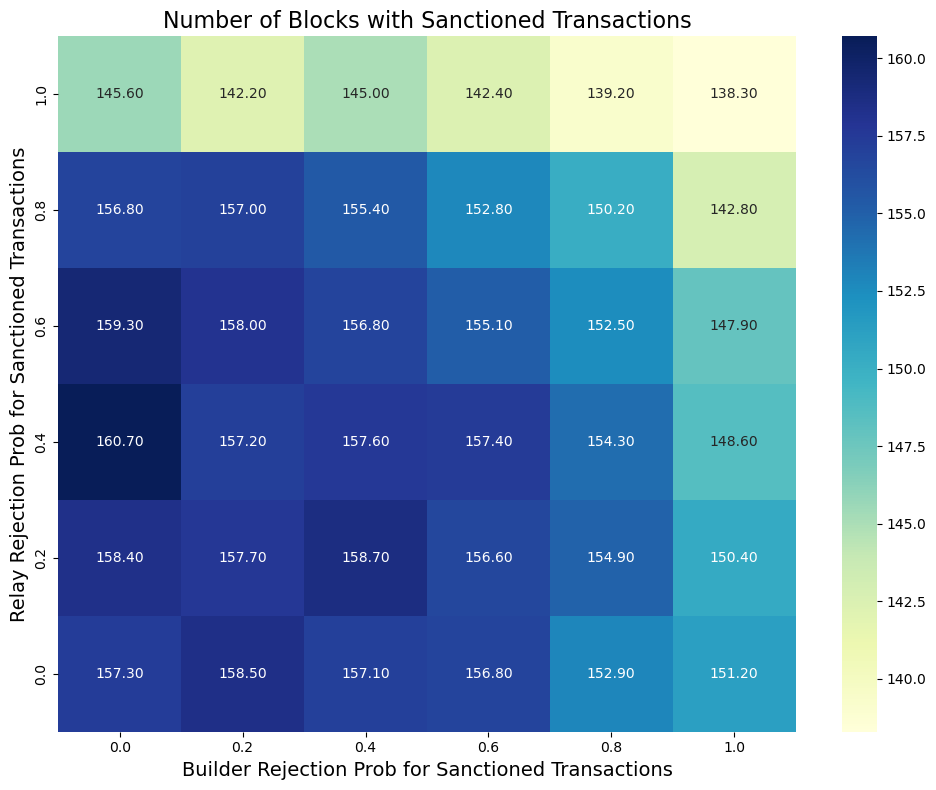

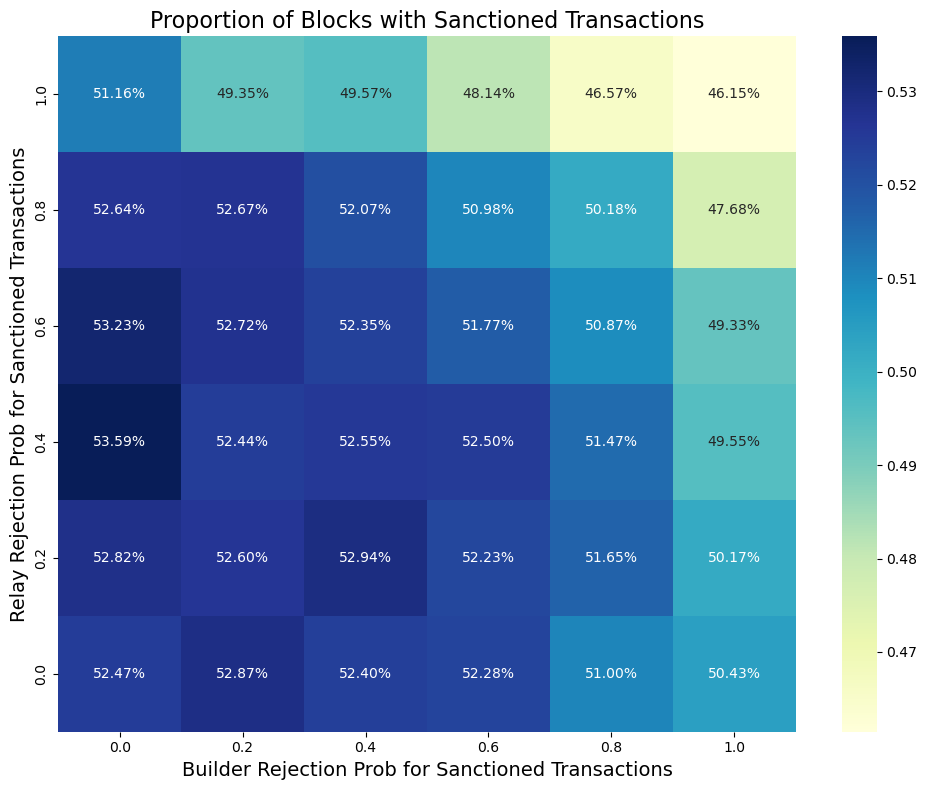

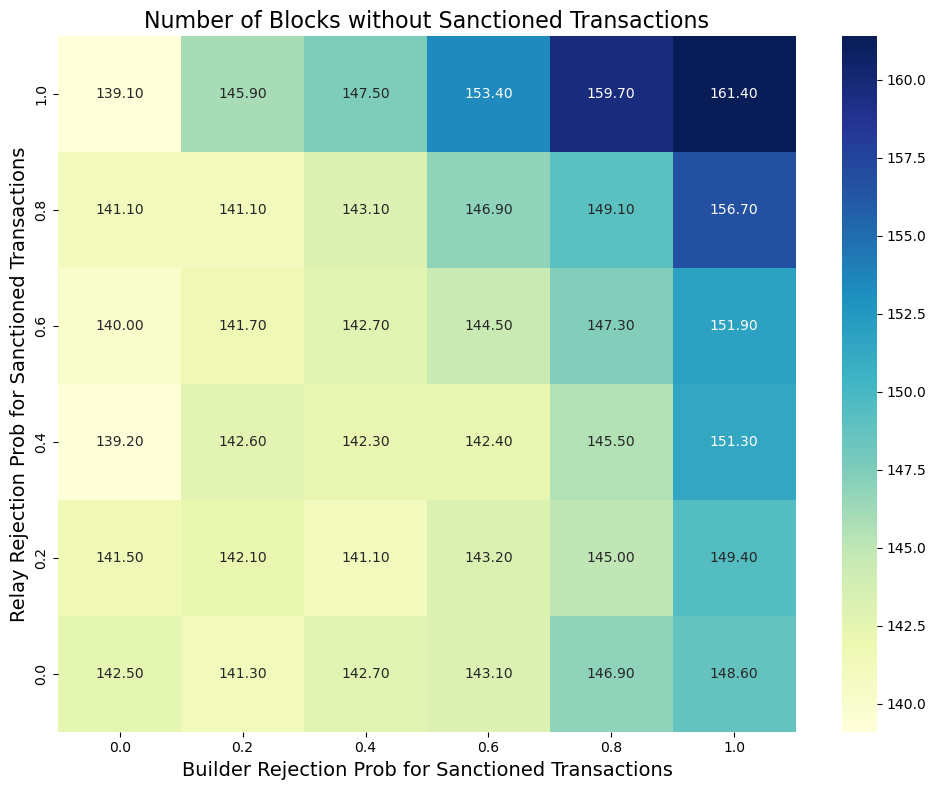

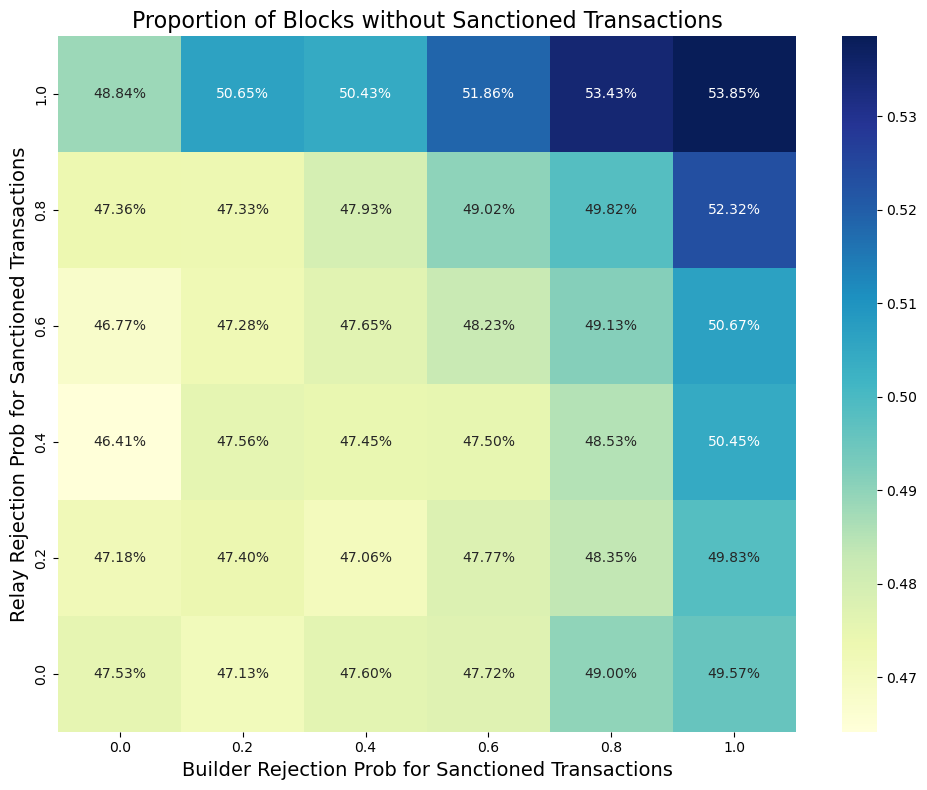

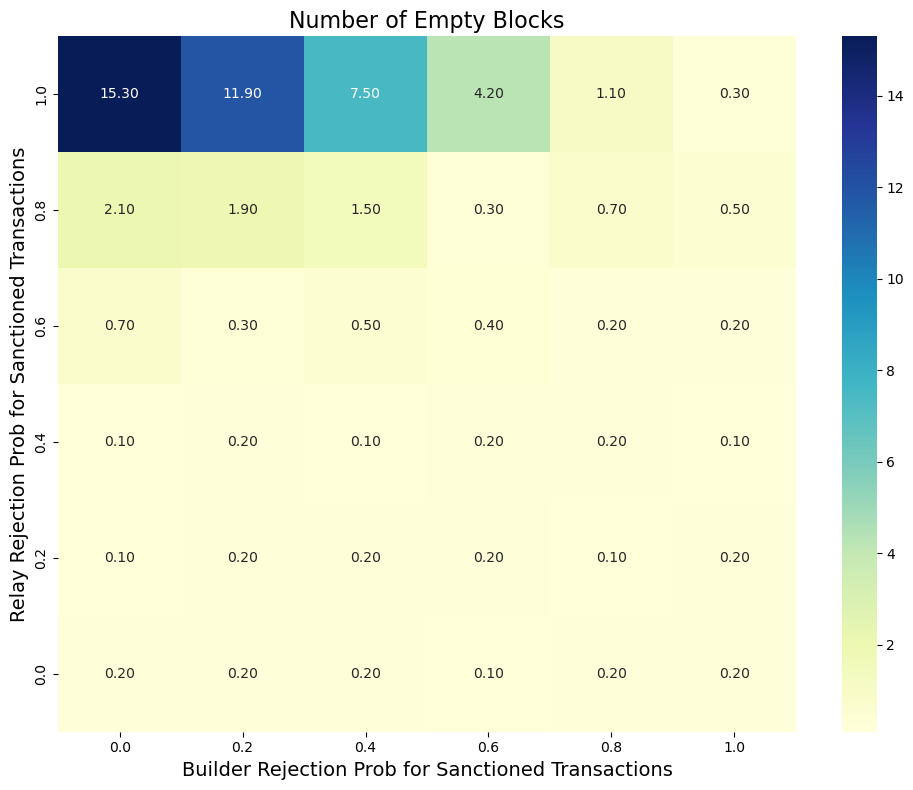

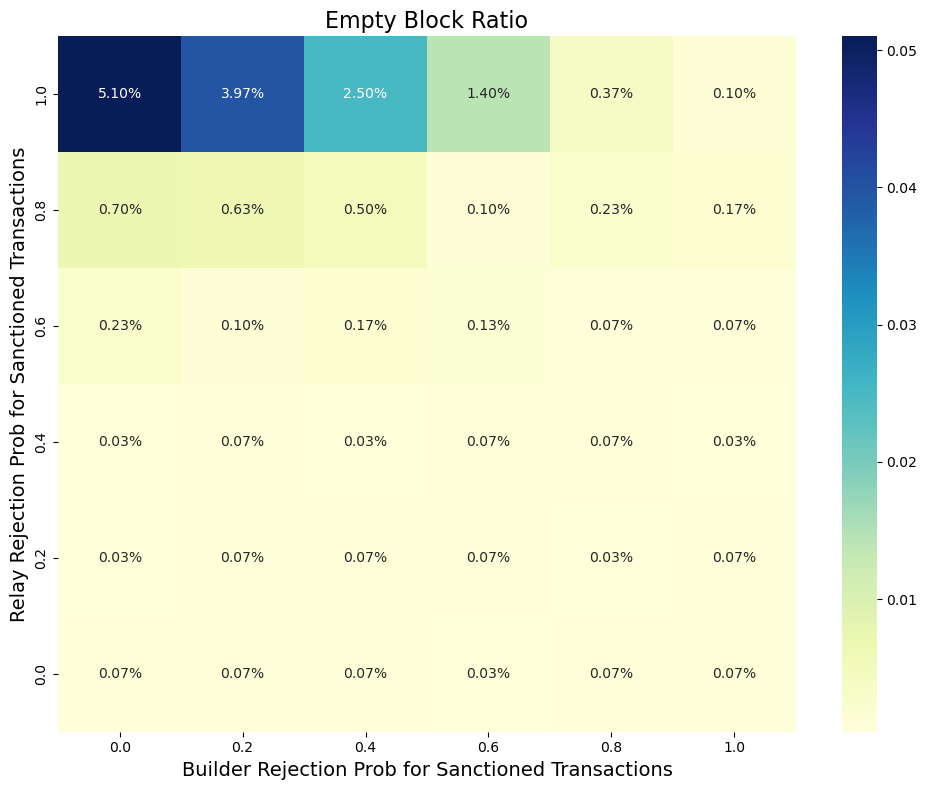

In [ ]:

results_df = pd.DataFrame(results)


def plot_heatmap(data, title, fmt):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(data, annot=True, fmt=fmt, cmap="YlGnBu")
    ax.invert_yaxis()  
    plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
    plt.ylabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Figure 1：heatmap of average blocks with sanctioned transactions
heatmap_data_1 = results_df.pivot(index='rp_relay', columns='rp_builder', values='avg_blocks_with_sanctioned')
plot_heatmap(heatmap_data_1, 'Number of Blocks with Sanctioned Transactions', ".2f")

# Figure 2: heatmap of proportion of blocks with sanctioned transactions
heatmap_data_2 = results_df.pivot(index='rp_relay', columns='rp_builder', values='ratio_with_sanctioned')
plot_heatmap(heatmap_data_2, 'Proportion of Blocks with Sanctioned Transactions', ".2%")

# Figure 3: heatmap of average blocks without sanctioned transactions
heatmap_data_5 = results_df.pivot(index='rp_relay', columns='rp_builder', values='avg_blocks_without_sanctioned')
plot_heatmap(heatmap_data_5, 'Number of Blocks without Sanctioned Transactions', ".2f")

# Figure 4: heatmap of proportion of blocks without sanctioned transactions
heatmap_data_6 = results_df.pivot(index='rp_relay', columns='rp_builder', values='ratio_without_sanctioned')
plot_heatmap(heatmap_data_6, 'Proportion of Blocks without Sanctioned Transactions', ".2%")

# Figure 5: heatmap of average empty blocks
heatmap_data_3 = results_df.pivot(index='rp_relay', columns='rp_builder', values='avg_empty_blocks')
plot_heatmap(heatmap_data_3, 'Number of Empty Blocks', ".2f")

# Figure 6: heatmap of empty block ratio
heatmap_data_4 = results_df.pivot(index='rp_relay', columns='rp_builder', values='empty_block_ratio')
plot_heatmap(heatmap_data_4, 'Empty Block Ratio', ".2%")



#### Total block value and mean block value    -  type_1_rejection_prob_builder & type_1_rejection_prob_relay

In [ ]:


def calculate_block_value_stats(exp_blocks, rp_builder, rp_relay):
    run_summary = exp_blocks.groupby('run_id').agg(
        total_block_value=('total_priority_fee', 'sum'),
        num_blocks=('block_id', 'count')
    ).reset_index()

    run_summary['mean_block_value'] = run_summary['total_block_value'] / run_summary['num_blocks']

    avg_total_block_value = run_summary['total_block_value'].mean()
    avg_mean_block_value = run_summary['mean_block_value'].mean()

    avg_total_block_value_eth = avg_total_block_value * 1e-9
    avg_mean_block_value_eth = avg_mean_block_value * 1e-9

    return {
        'rp_builder': rp_builder,
        'rp_relay': rp_relay,
        'avg_total_block_value_eth': avg_total_block_value_eth,
        'avg_mean_block_value_eth': avg_mean_block_value_eth
    }

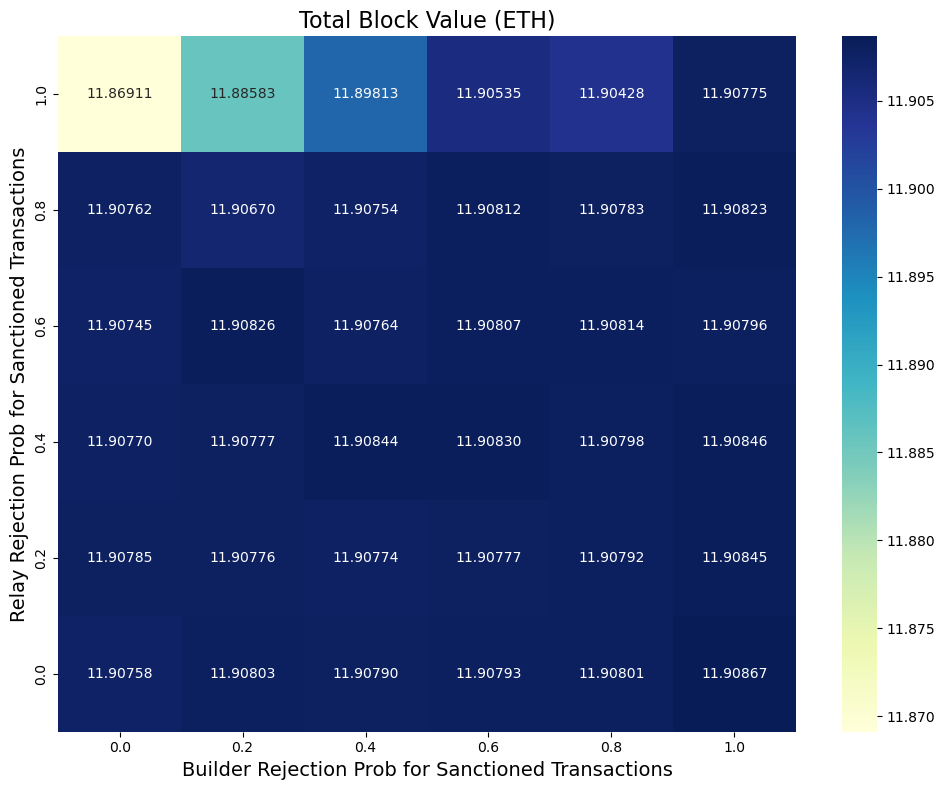

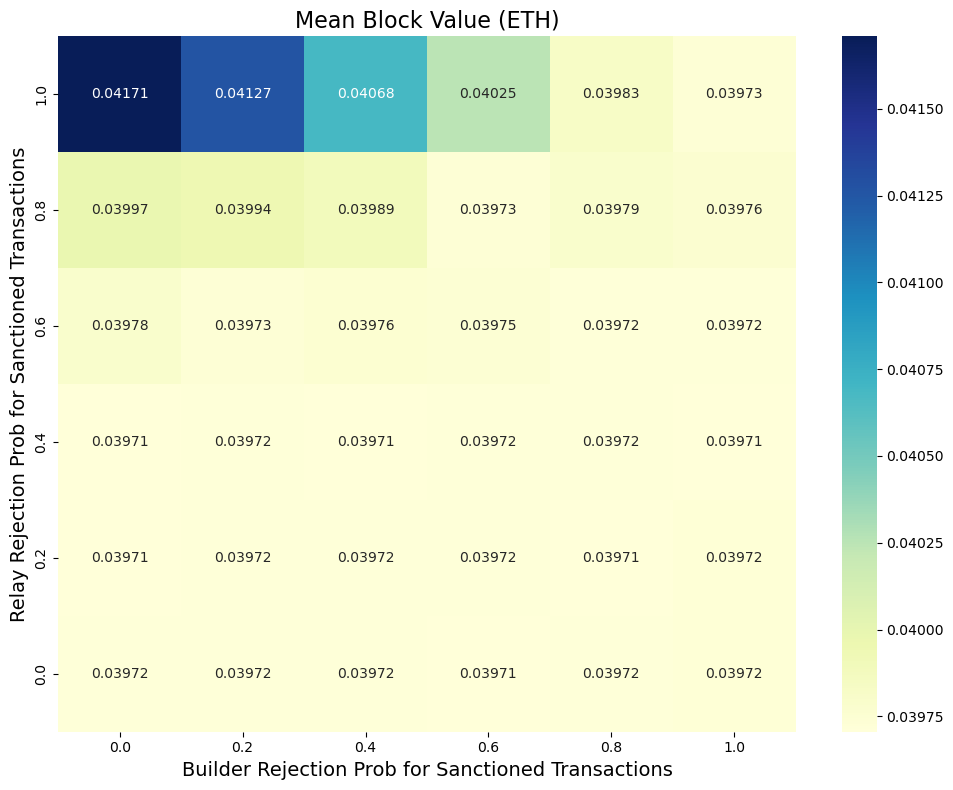

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_builder_relay_20250613_194959"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_builder_relay_")]


def extract_rejection_prob_builder_relay(folder_name):
    match = re.search(r"type_1_rejection_prob_builder_relay_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        rp_builder = float(match.group(1))
        rp_relay = float(match.group(2))
        return (rp_builder, rp_relay)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_rejection_prob_builder_relay)


results = []


for folder in folders:
    rp_builder, rp_relay = extract_rejection_prob_builder_relay(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()

    stats = calculate_block_value_stats(blocks, rp_builder, rp_relay)
    results.append(stats)

combined_stats = pd.DataFrame(results)



def plot_heatmap(df, value_col, title, fmt=".5f"):
    pivot_df = df.pivot(index='rp_relay', columns='rp_builder', values=value_col)

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(pivot_df, annot=True, fmt=fmt, cmap="YlGnBu",
                     annot_kws={"fontsize": 10}, cbar_kws={'format':ScalarFormatter(useOffset=False)})

    plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
    plt.ylabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
    plt.title(title, fontsize=16)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()



plot_heatmap(
    combined_stats,
    'avg_total_block_value_eth',
    'Total Block Value (ETH)'
)


plot_heatmap(
    combined_stats,
    'avg_mean_block_value_eth',
    'Mean Block Value (ETH)'
)


#### Average profit (per block & pre node) for builders under different censorship types  - type_1_rejection_prob_builder & type_1_rejection_prob_relay

In [ ]:

def calculate_builder_profit_by_policy(exp_blocks, experiment_name):

    policy_summary = exp_blocks.groupby(['run_id', 'builder_policy']).agg(
        total_builder_profit=('builder_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_builders=('builder_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = ['strict', 'weak', 'non']
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'builder_policy'])

    policy_summary = policy_summary.set_index(['run_id', 'builder_policy']).reindex(
        full_index, fill_value=0
    ).reset_index()


    policy_summary['mean_profit_per_block'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )
    
    policy_summary['mean_profit_per_builder'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_builders'] if row['num_builders'] > 0 else 0, axis=1
    )


    final_policy_avg = policy_summary.groupby('builder_policy').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_builder': 'mean'
    }).reset_index()


    final_policy_avg['mean_builder_profit_per_block(ETH)'] = final_policy_avg['mean_profit_per_block'] * 1e-9
    final_policy_avg['mean_builder_profit_per_builder(ETH)'] = final_policy_avg['mean_profit_per_builder'] * 1e-9

    final_policy_avg['experiment'] = experiment_name

    return final_policy_avg[[
        'builder_policy',
        'mean_builder_profit_per_block(ETH)',
        'mean_builder_profit_per_builder(ETH)',
        'experiment'
    ]]


    builder_policy  mean_builder_profit_per_block(ETH)  \
0              non                            0.002003   
1           strict                            0.001949   
2             weak                            0.001899   
3              non                            0.002002   
4           strict                            0.001947   
5             weak                            0.001902   
6              non                            0.002003   
7           strict                            0.001955   
8             weak                            0.001883   
9              non                            0.002007   
10          strict                            0.001968   
11            weak                            0.001891   
12             non                            0.002036   
13          strict                            0.001943   
14            weak                            0.001819   
15             non                            0.002123   
16          st

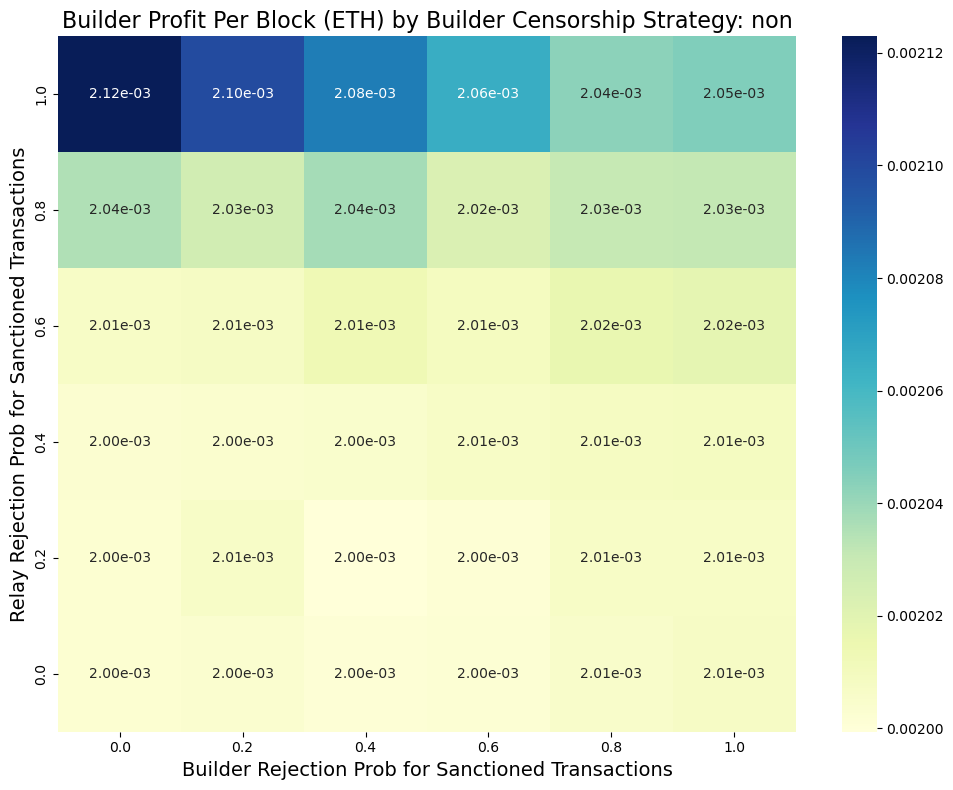

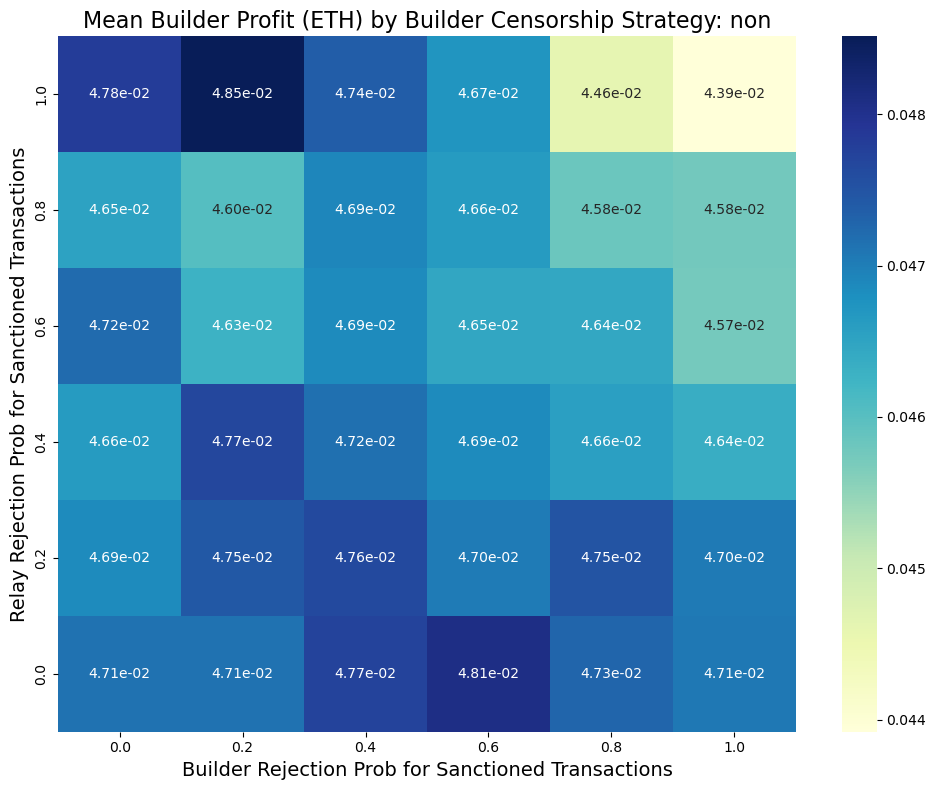

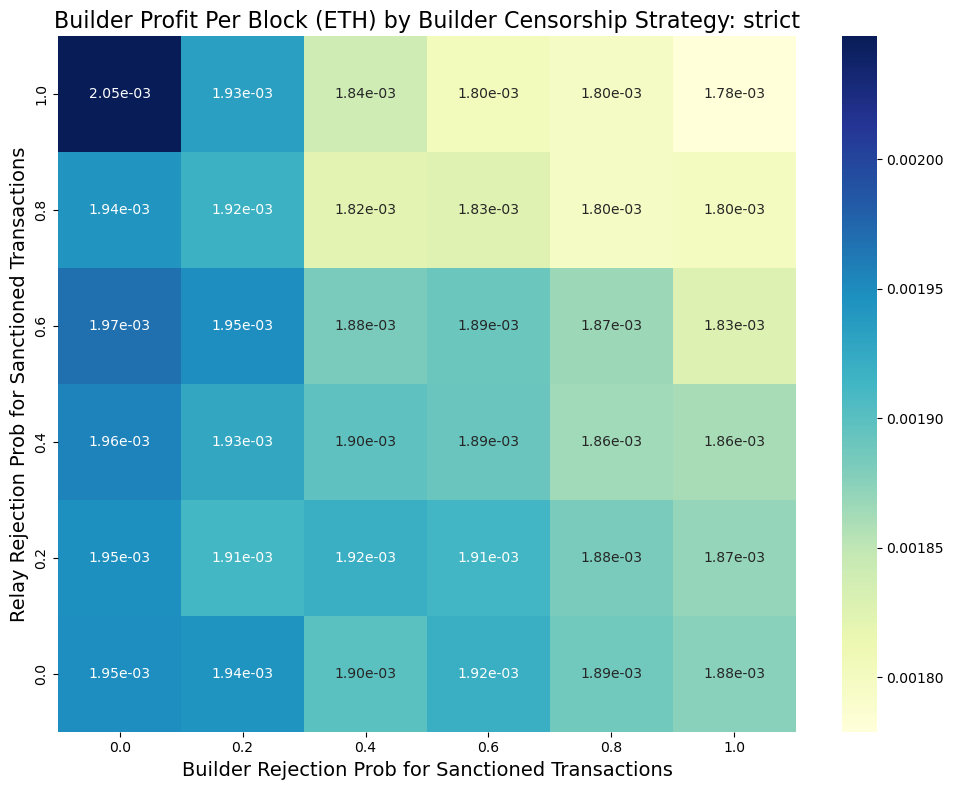

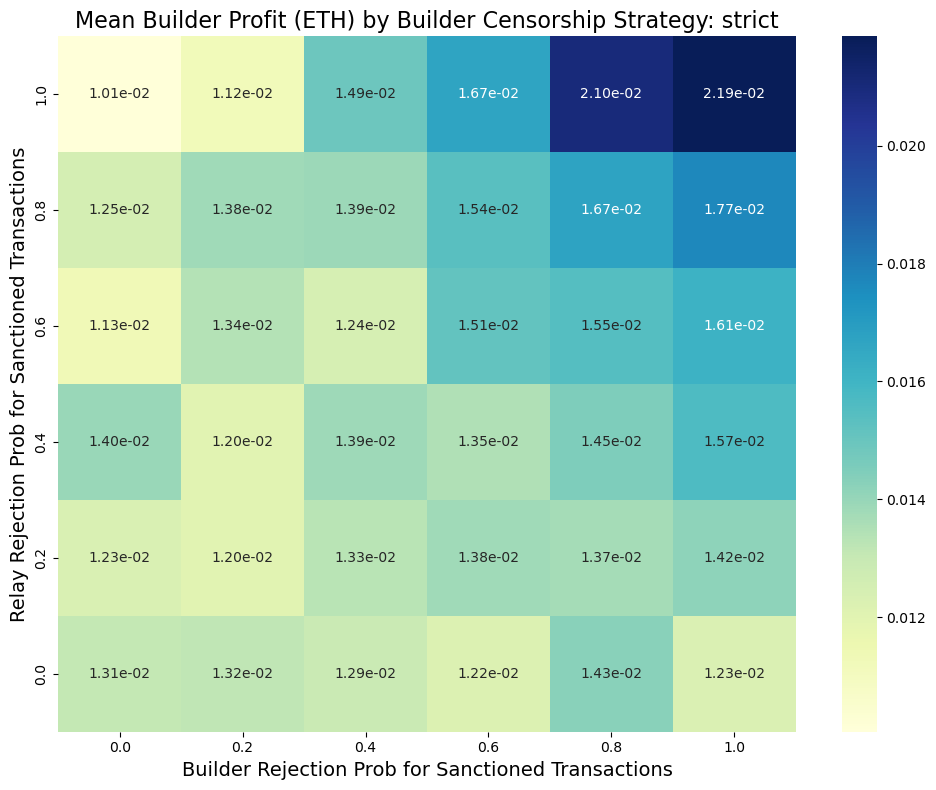

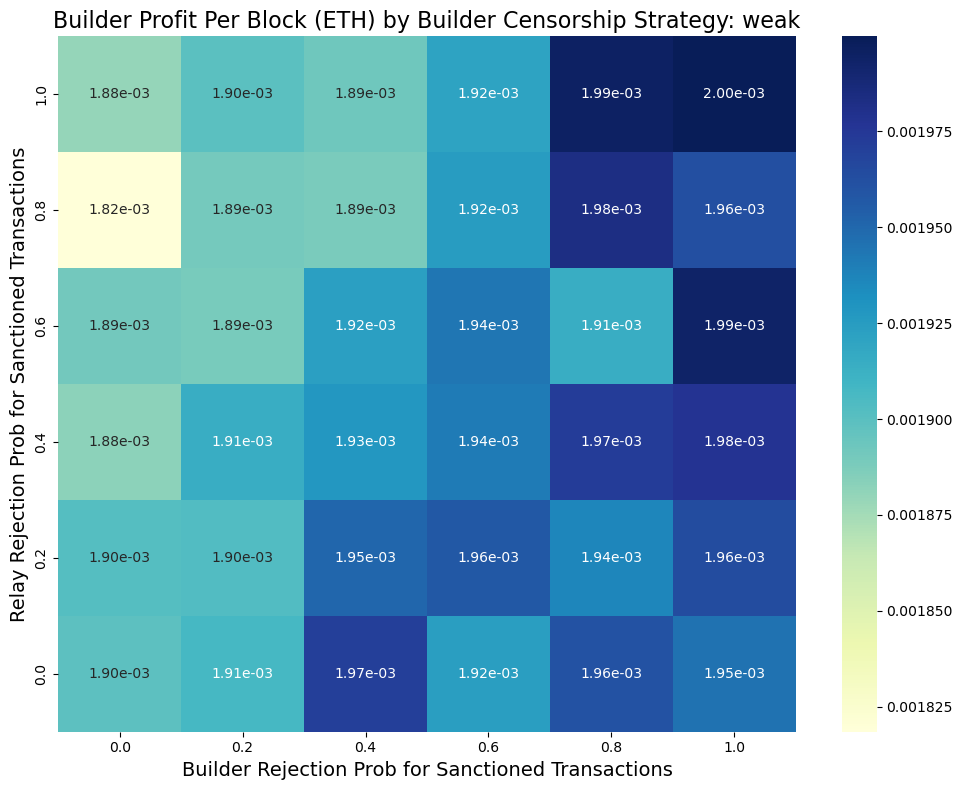

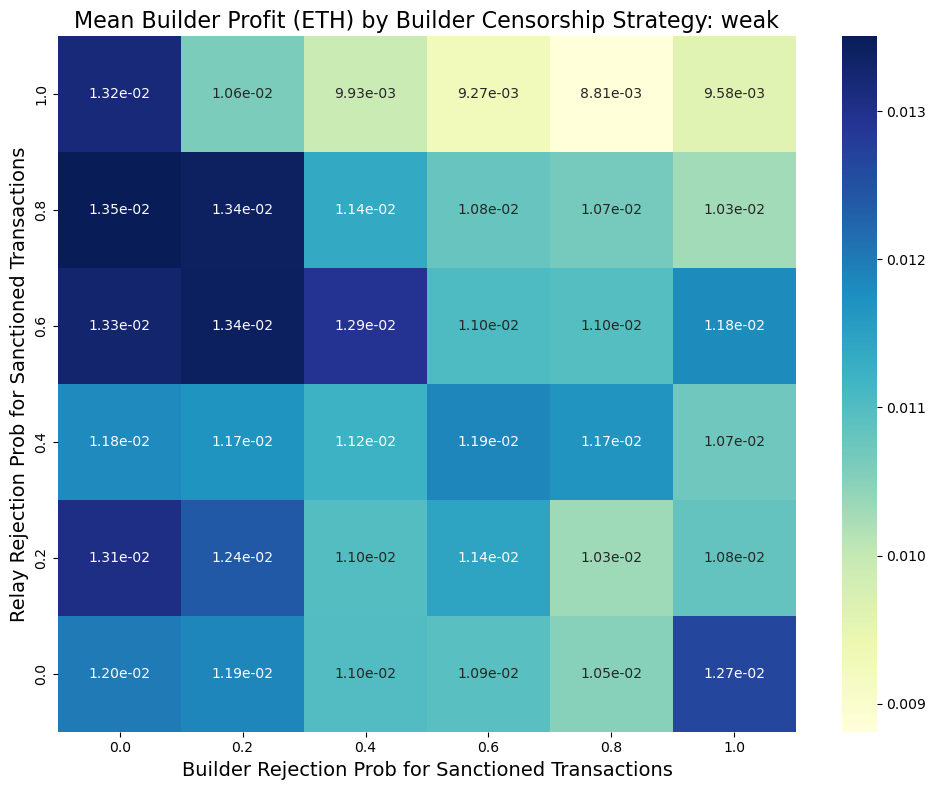

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_builder_relay_20250613_194959"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_builder_relay_")]


def extract_rejection_prob_builder_relay(folder_name):
    match = re.search(r"type_1_rejection_prob_builder_relay_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        rp_builder = float(match.group(1))
        rp_relay = float(match.group(2))
        return (rp_builder, rp_relay)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_rejection_prob_builder_relay)


results = []


for folder in folders:
    rp_builder, rp_relay = extract_rejection_prob_builder_relay(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    experiment_label = f'rpb_{rp_builder:.3f}_rpr_{rp_relay:.3f}'
    stats = calculate_builder_profit_by_policy(blocks, experiment_label)
    stats['rp_builder'] = rp_builder
    stats['rp_relay'] = rp_relay
    results.append(stats)


combined_stats = pd.concat(results, ignore_index=True)


print(combined_stats.sort_values(['rp_builder', 'rp_relay', 'builder_policy']))



def plot_heatmap(df, policy, value_col, title, fmt=".2e"):
    pivot_df = df[df['builder_policy'] == policy].pivot(
        index='rp_relay', columns='rp_builder', values=value_col)

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, fmt=fmt, cmap="YlGnBu")
    plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
    plt.ylabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
    plt.title(title, fontsize=16)
    plt.gca().invert_yaxis()  
    plt.tight_layout()
    plt.show()


policies = combined_stats['builder_policy'].unique()

for policy in policies:

    plot_heatmap(
        combined_stats, policy, 'mean_builder_profit_per_block(ETH)',
        f'Builder Profit Per Block (ETH) by Builder Censorship Strategy: {policy}'
    )


    plot_heatmap(
        combined_stats, policy, 'mean_builder_profit_per_builder(ETH)',
        f'Mean Builder Profit (ETH) by Builder Censorship Strategy: {policy}'
    )


#### Average profit (per block & pre node) for validators under different censorship types  - type_1_rejection_prob_builder & type_1_rejection_prob_relay

In [69]:
def calculate_validator_profit_by_policy(exp_blocks, experiment_name):
    validator_summary = exp_blocks.groupby(['run_id', 'proposer_validator_is_censoring']).agg(
        total_proposer_profit=('proposer_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_validators=('proposer_validator_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = [True, False]
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'proposer_validator_is_censoring'])

    validator_summary = validator_summary.set_index(['run_id', 'proposer_validator_is_censoring']).reindex(
        full_index, fill_value=0
    ).reset_index()

    validator_summary['mean_profit_per_block'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )

    validator_summary['mean_profit_per_validator'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_validators'] if row['num_validators'] > 0 else 0, axis=1
    )

    final_validator_avg = validator_summary.groupby('proposer_validator_is_censoring').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_validator': 'mean'
    }).reset_index()

    final_validator_avg['mean_validator_profit_per_block(ETH)'] = final_validator_avg['mean_profit_per_block'] * 1e-9
    final_validator_avg['mean_validator_profit_per_validator(ETH)'] = final_validator_avg['mean_profit_per_validator'] * 1e-9

    final_validator_avg['experiment'] = experiment_name

    return final_validator_avg[[
        'proposer_validator_is_censoring',
        'mean_validator_profit_per_block(ETH)',
        'mean_validator_profit_per_validator(ETH)',
        'experiment'
    ]]

    proposer_validator_is_censoring  mean_validator_profit_per_block(ETH)  \
0                             False                              0.038945   
1                              True                              0.032742   
2                             False                              0.038943   
3                              True                              0.032675   
4                             False                              0.038901   
5                              True                              0.032897   
6                             False                              0.039091   
7                              True                              0.032455   
8                             False                              0.039367   
9                              True                              0.032045   
10                            False                              0.040802   
11                             True                              0.032988   

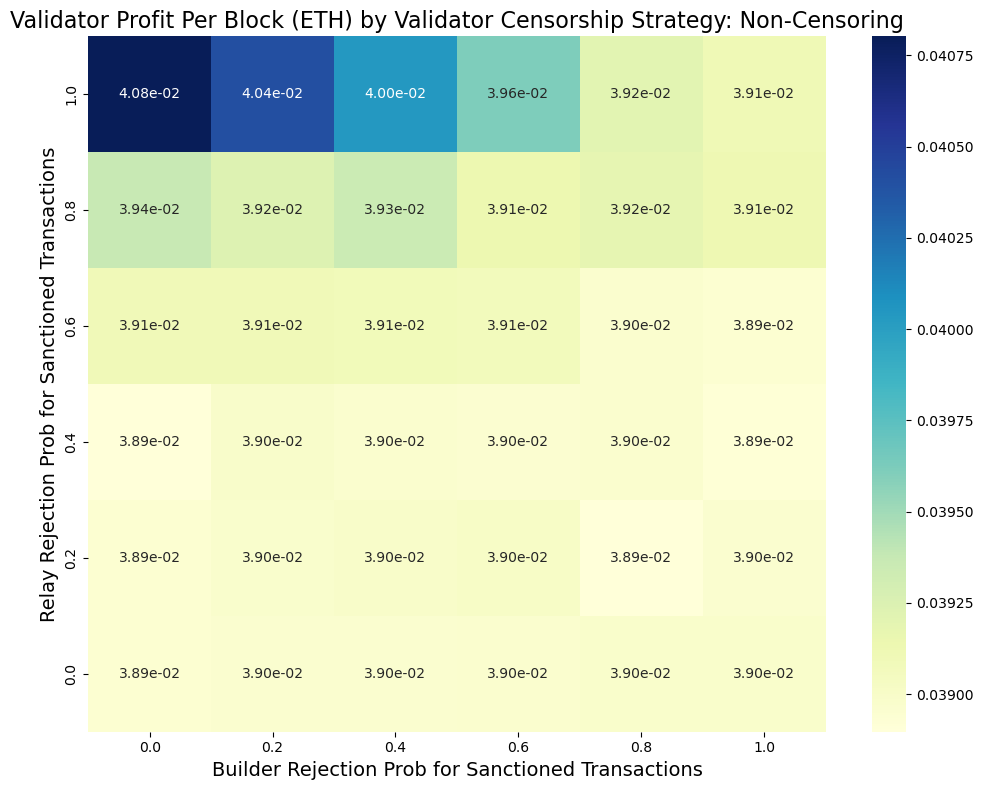

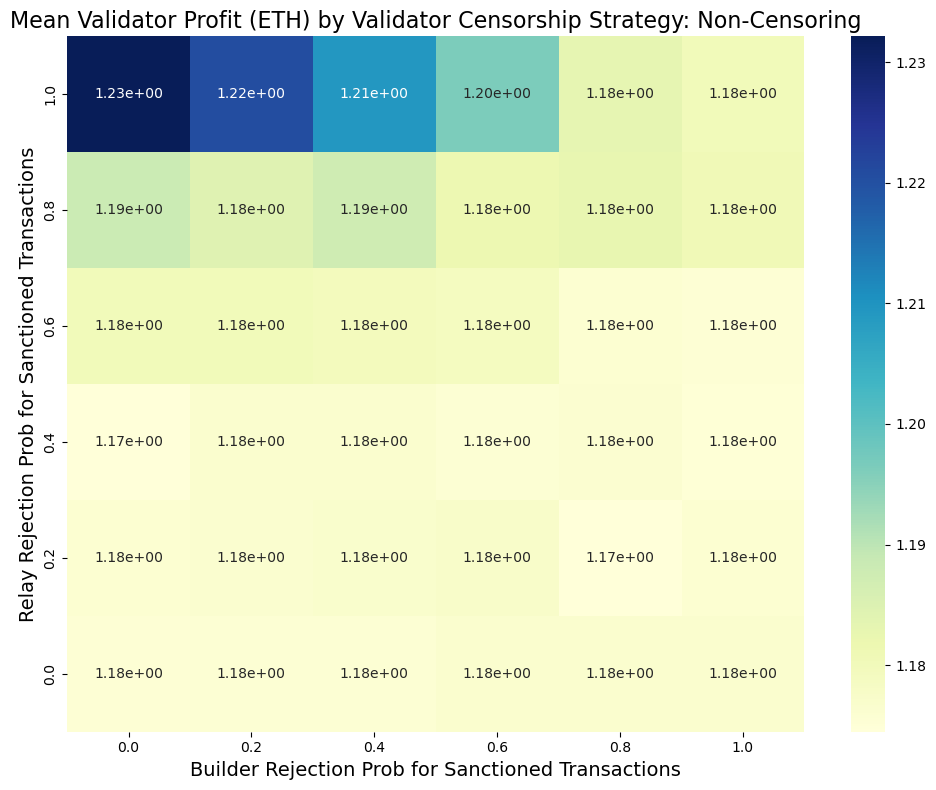

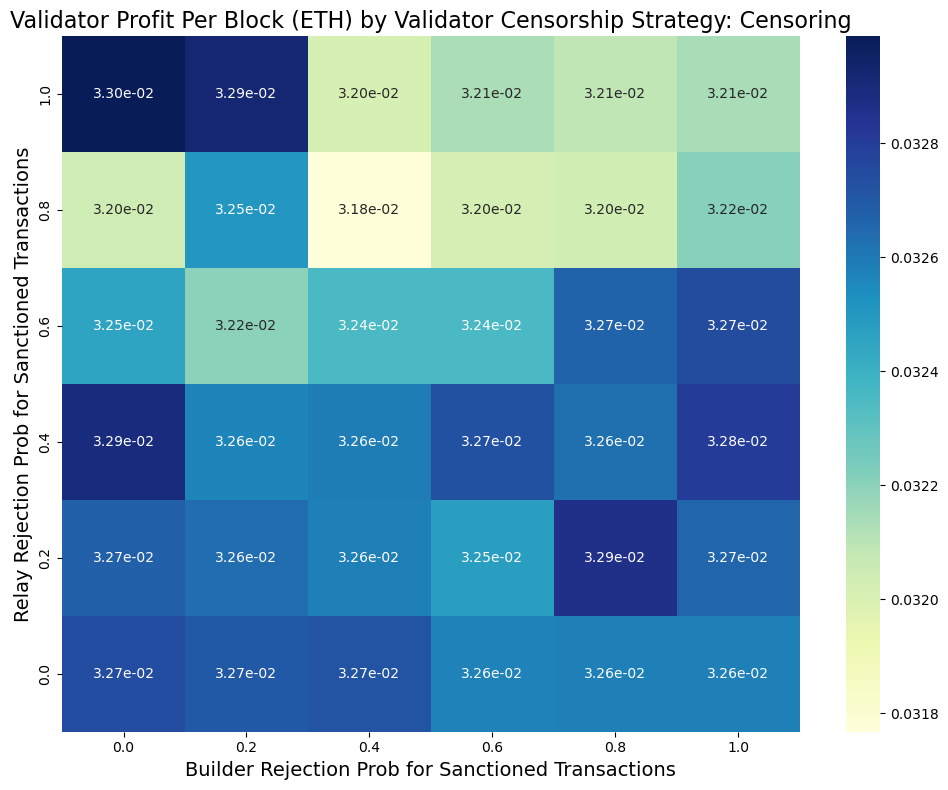

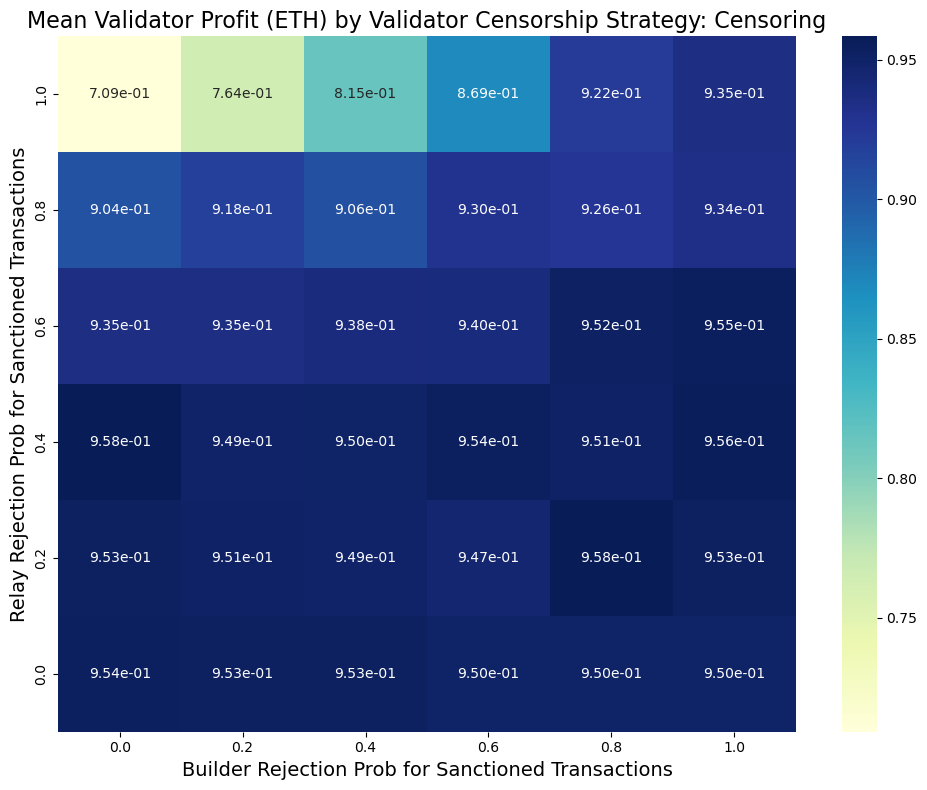

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_type_1_rejection_prob_builder_relay_20250613_194959"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("type_1_rejection_prob_builder_relay_")]


def extract_rejection_prob_builder_relay(folder_name):
    match = re.search(r"type_1_rejection_prob_builder_relay_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        rp_builder = float(match.group(1))
        rp_relay = float(match.group(2))
        return (rp_builder, rp_relay)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_rejection_prob_builder_relay)


results = []


for folder in folders:
    rp_builder, rp_relay = extract_rejection_prob_builder_relay(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    experiment_label = f'rpb_{rp_builder:.3f}_rpr_{rp_relay:.3f}'
    stats = calculate_validator_profit_by_policy(blocks, experiment_label)
    stats['rp_builder'] = rp_builder
    stats['rp_relay'] = rp_relay
    results.append(stats)


combined_stats = pd.concat(results, ignore_index=True)


print(combined_stats.sort_values(['rp_builder', 'rp_relay', 'proposer_validator_is_censoring']))



def plot_validator_heatmap(df, is_censoring, value_col, title, fmt=".2e"):
    pivot_df = df[df['proposer_validator_is_censoring'] == is_censoring].pivot(
        index='rp_relay', columns='rp_builder', values=value_col)

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, fmt=fmt, cmap="YlGnBu")
    plt.xlabel('Builder Rejection Prob for Sanctioned Transactions', fontsize=14)
    plt.ylabel('Relay Rejection Prob for Sanctioned Transactions', fontsize=14)
    plt.title(title, fontsize=16)
    plt.gca().invert_yaxis()  
    plt.tight_layout()
    plt.show()


policies = combined_stats['proposer_validator_is_censoring'].unique()

for policy in policies:
    policy_label = 'Censoring' if policy else 'Non-Censoring'


    plot_validator_heatmap(
        combined_stats, policy, 'mean_validator_profit_per_block(ETH)',
        f'Validator Profit Per Block (ETH) by Validator Censorship Strategy: {policy_label}'
    )


    plot_validator_heatmap(
        combined_stats, policy, 'mean_validator_profit_per_validator(ETH)',
        f'Mean Validator Profit (ETH) by Validator Censorship Strategy: {policy_label}'
    )


#### Transaction Delay - builder_skip_probability

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_builder_skip_probability_20250613_112956"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("builder_skip_probability_")]


def extract_skip_prob(folder_name):
    match = re.search(r"builder_skip_probability_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_skip_prob)



for folder in folders:
    skip_prob = extract_skip_prob(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "transactions.csv")

    transactions = pd.read_csv(file_path, low_memory=False)
    transactions = transactions[transactions['is_proposed']].copy()


    if transactions.empty:
        print(f"Warning: No proposed transactions found in folder {folder}")
        continue

    transactions['proposal_delay'] = transactions['proposed_time'] - transactions['arrival_time']
    transactions['sanctioned_type'] = transactions['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
    transactions['experiment'] = f"bsp_{skip_prob:.2f}"

    combined_transactions = pd.concat([combined_transactions, transactions], ignore_index=True)


if combined_transactions.empty:
    print("No transactions data available after filtering.")
else:

    negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
    print("Transactions with negative proposal delay:")
    print(negative_delay_txs if not negative_delay_txs.empty else "None found")


run_stats = combined_transactions.groupby(['experiment', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()
final_stats = run_stats.groupby(['experiment', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()

print("\nProposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):")
print(final_stats)


Transactions with negative proposal delay:
None found

Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):
   experiment     sanctioned_type       mean         std
0    bsp_0.00  Non-sanctioned (0)  22.952701   58.356986
1    bsp_0.00      Sanctioned (1)  38.140088  107.331341
2    bsp_0.02  Non-sanctioned (0)  18.263059   26.608046
3    bsp_0.02      Sanctioned (1)  32.460752   80.466459
4    bsp_0.04  Non-sanctioned (0)  17.830033   22.934136
5    bsp_0.04      Sanctioned (1)  32.263238   78.395533
6    bsp_0.06  Non-sanctioned (0)  17.510231   20.938931
7    bsp_0.06      Sanctioned (1)  29.889688   64.323421
8    bsp_0.08  Non-sanctioned (0)  18.005678   23.235453
9    bsp_0.08      Sanctioned (1)  30.886618   70.078710
10   bsp_0.10  Non-sanctioned (0)  17.155240   15.481839
11   bsp_0.10      Sanctioned (1)  29.286784   62.228970
12   bsp_0.12  Non-sanctioned (0)  18.249433   22.931063
13   bsp_0.12      Sanctioned (1)  30.776600   67.031776
14   bsp

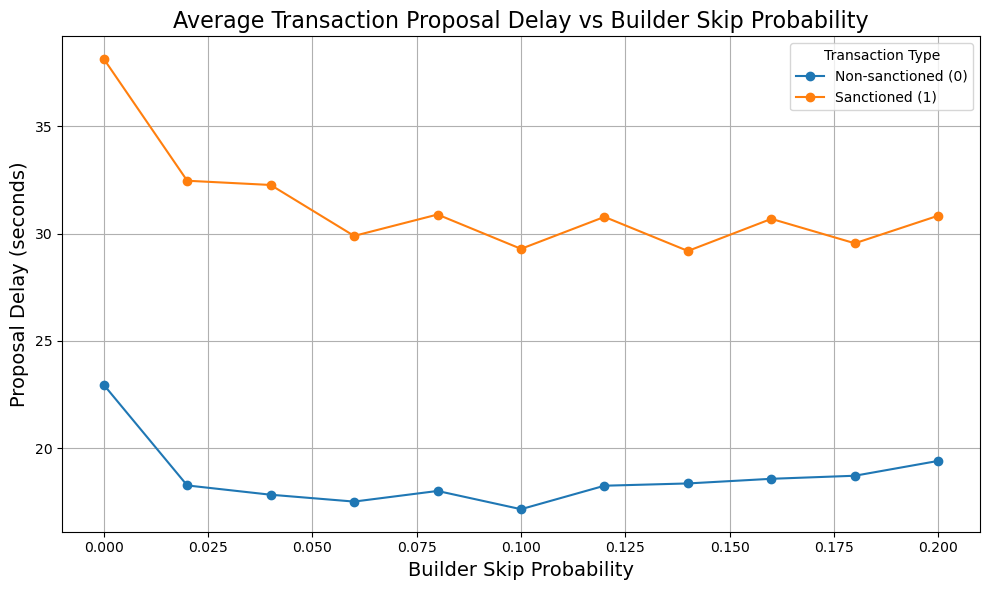

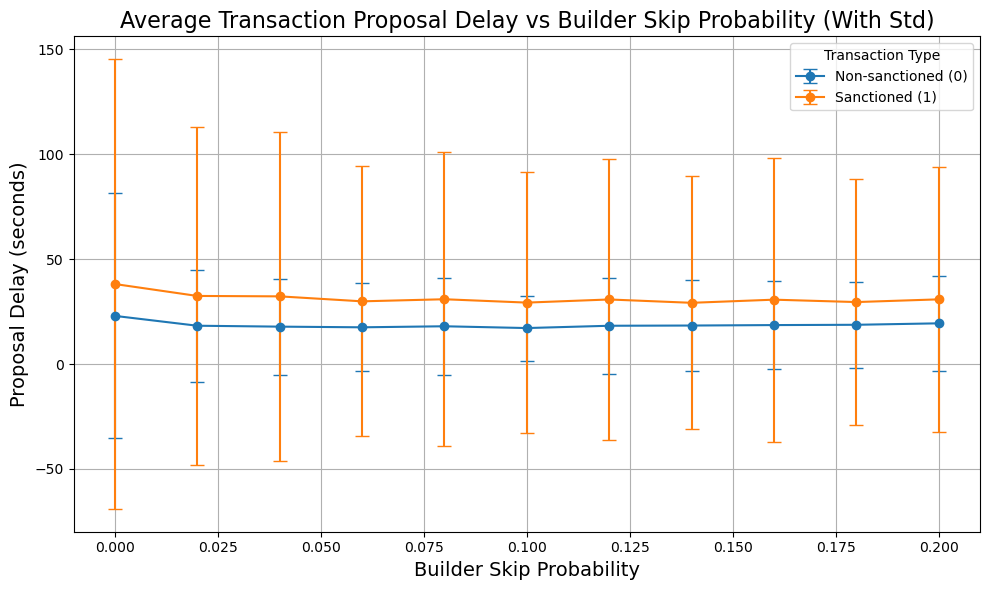

In [ ]:

final_stats['builder_skip_probability'] = final_stats['experiment'].str.extract(r'bsp_(\d+\.\d+)').astype(float)


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.plot(group['builder_skip_probability'], group['mean'], '-o', label=label)

ax.set_xlabel('Builder Skip Probability', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Average Transaction Proposal Delay vs Builder Skip Probability', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.errorbar(group['builder_skip_probability'], group['mean'], yerr=group['std'],
                fmt='-o', label=label, capsize=5)

ax.set_xlabel('Builder Skip Probability', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Average Transaction Proposal Delay vs Builder Skip Probability (With Std)', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


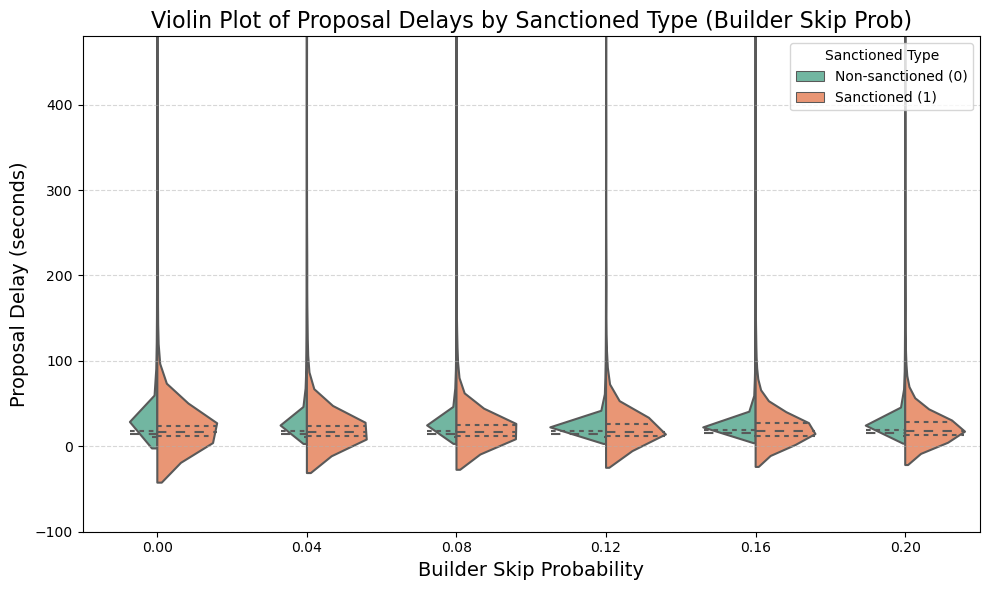

In [ ]:



selected_experiments = ['0.00', '0.04', '0.08', '0.12', '0.16', '0.20']

plt.figure(figsize=(10, 6))


skip_prob_filtered = combined_transactions[
    combined_transactions['experiment'].str.contains('bsp_') &
    combined_transactions['experiment'].str[-4:].isin(selected_experiments)
]

sns.violinplot(
    data=skip_prob_filtered,
    x='experiment',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)


current_labels = plt.gca().get_xticklabels()
new_labels = [f"{float(label.get_text()[-4:]):.2f}" for label in current_labels]
plt.gca().set_xticklabels(new_labels)

plt.ylim(-100, 480)
plt.xlabel('Builder Skip Probability', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays by Sanctioned Type (Builder Skip Prob)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### The number/proportion of blocks containing sanctioned transactions
#### The number/proportion of empty blocks
#### -  builder_skip_probability

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_builder_skip_probability_20250613_112956"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("builder_skip_probability_")]


def extract_skip_prob(folder_name):
    match = re.search(r"builder_skip_probability_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_skip_prob)


results = []

for folder in folders:
    skip_prob_builder = extract_skip_prob(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    run_ids = blocks['run_id'].unique()


    run_metrics = []

    for run in run_ids:
        run_blocks = blocks[blocks['run_id'] == run]

        non_empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] != 'PROPOSER')].copy()
        non_empty_blocks['contains_sanctioned'] = non_empty_blocks['num_sanctioned_tx'] > 0

        blocks_with_sanctioned = non_empty_blocks['contains_sanctioned'].sum()
        blocks_without_sanctioned = (~non_empty_blocks['contains_sanctioned']).sum()
        total_non_empty_blocks = len(non_empty_blocks)

        empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] == 'PROPOSER')]
        total_empty_blocks = empty_blocks.shape[0]
        total_proposed_blocks = total_non_empty_blocks + total_empty_blocks

   
        ratio_with_sanctioned = blocks_with_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        ratio_without_sanctioned = blocks_without_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        empty_block_ratio = total_empty_blocks / total_proposed_blocks if total_proposed_blocks > 0 else 0

        run_metrics.append({
            'blocks_with_sanctioned': blocks_with_sanctioned,
            'blocks_without_sanctioned': blocks_without_sanctioned,
            'empty_blocks': total_empty_blocks,
            'ratio_with_sanctioned': ratio_with_sanctioned,
            'ratio_without_sanctioned': ratio_without_sanctioned,
            'empty_block_ratio': empty_block_ratio
        })

   
    metrics_df = pd.DataFrame(run_metrics)

    results.append({
        'experiment': f'bsp_{skip_prob_builder:.2f}',
        'avg_blocks_with_sanctioned': metrics_df['blocks_with_sanctioned'].mean(),
        'avg_blocks_without_sanctioned': metrics_df['blocks_without_sanctioned'].mean(),
        'ratio_with_sanctioned': metrics_df['ratio_with_sanctioned'].mean(),
        'ratio_without_sanctioned': metrics_df['ratio_without_sanctioned'].mean(),
        'avg_empty_blocks': metrics_df['empty_blocks'].mean(),
        'empty_block_ratio': metrics_df['empty_block_ratio'].mean()
    })

    print(f"\nExperiment: bsp_{skip_prob_builder:.2f}")
    print(f"平均含 sanctioned_type=1 交易的区块数量: {metrics_df['blocks_with_sanctioned'].mean():.6f}")
    print(f"平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: {metrics_df['blocks_without_sanctioned'].mean():.6f}")
    print(f"含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_with_sanctioned'].mean():.2%}")
    print(f"不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_without_sanctioned'].mean():.2%}")
    print(f"平均空区块数量: {metrics_df['empty_blocks'].mean():.6f}")
    print(f"空区块占所有已提议区块的比例: {metrics_df['empty_block_ratio'].mean():.2%}")



Experiment: bsp_0.00
平均含 sanctioned_type=1 交易的区块数量: 138.300000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 157.800000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.71%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.29%
平均空区块数量: 3.900000
空区块占所有已提议区块的比例: 1.30%

Experiment: bsp_0.02
平均含 sanctioned_type=1 交易的区块数量: 138.300000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 160.200000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.33%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.67%
平均空区块数量: 1.500000
空区块占所有已提议区块的比例: 0.50%

Experiment: bsp_0.04
平均含 sanctioned_type=1 交易的区块数量: 139.100000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 159.900000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.52%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.48%
平均空区块数量: 1.000000
空区块占所有已提议区块的比例: 0.33%

Experiment: bsp_0.06
平均含 sanctioned_type=1 交易的区块数量: 139.200000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 160.000000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.52%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.48%
平均空区块数量: 0.800000
空区块占所有已提议区块的比例: 0.27%

Exp

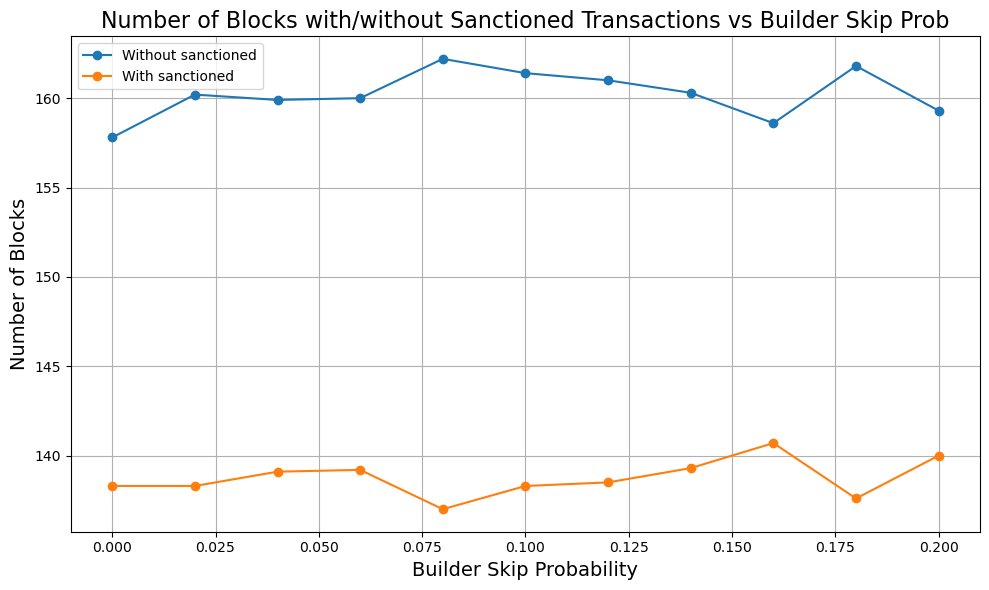

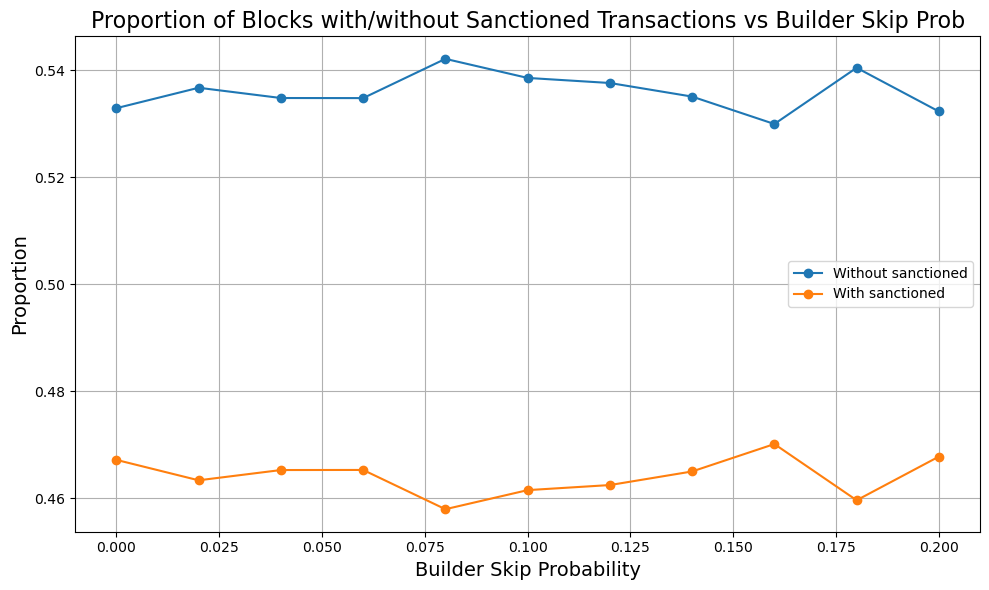

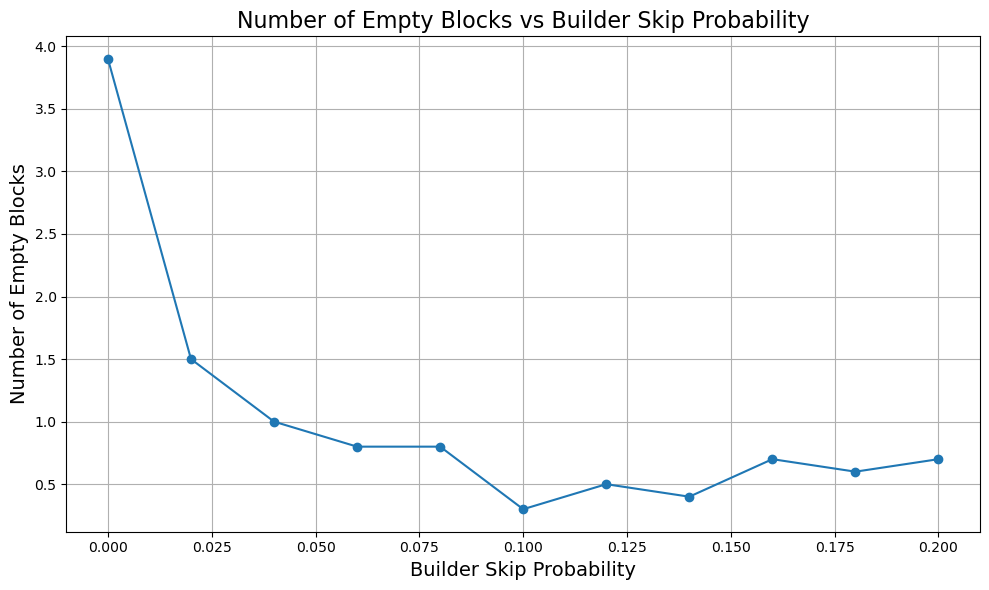

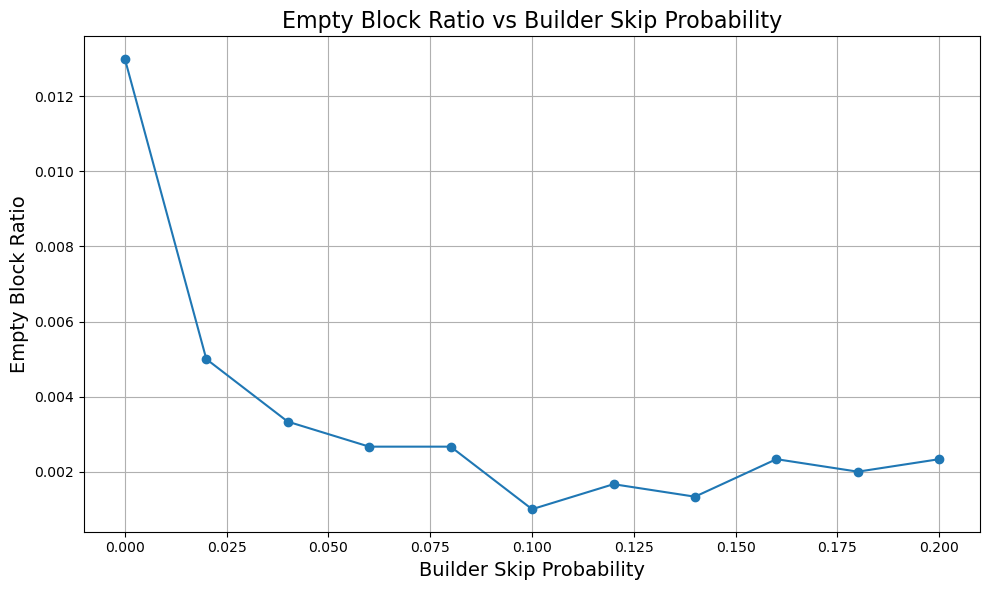

In [ ]:

results_df = pd.DataFrame(results)
results_df['builder_skip_probability'] = results_df['experiment'].str.extract(r'bsp_(\d+\.\d+)').astype(float)

# Figure 1: Number of Blocks with/without Sanctioned Transactions vs Builder Skip Probability
plt.figure(figsize=(10, 6))
plt.plot(results_df['builder_skip_probability'], results_df['avg_blocks_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['builder_skip_probability'], results_df['avg_blocks_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Builder Skip Probability', fontsize=14)
plt.ylabel('Number of Blocks', fontsize=14)
plt.title('Number of Blocks with/without Sanctioned Transactions vs Builder Skip Prob', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Proportion of Blocks with/without Sanctioned Transactions vs Builder Skip Probability
plt.figure(figsize=(10, 6))
plt.plot(results_df['builder_skip_probability'], results_df['ratio_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['builder_skip_probability'], results_df['ratio_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Builder Skip Probability', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Proportion of Blocks with/without Sanctioned Transactions vs Builder Skip Prob', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 3: Number of Empty Blocks vs Builder Skip Probability
plt.figure(figsize=(10, 6))
plt.plot(results_df['builder_skip_probability'], results_df['avg_empty_blocks'], marker='o')
plt.xlabel('Builder Skip Probability', fontsize=14)
plt.ylabel('Number of Empty Blocks', fontsize=14)
plt.title('Number of Empty Blocks vs Builder Skip Probability', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 4: Empty Block Ratio vs Builder Skip Probability
plt.figure(figsize=(10, 6))
plt.plot(results_df['builder_skip_probability'], results_df['empty_block_ratio'], marker='o')
plt.xlabel('Builder Skip Probability', fontsize=14)
plt.ylabel('Empty Block Ratio', fontsize=14)
plt.title('Empty Block Ratio vs Builder Skip Probability', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


####  total_block_value，mean_block_value   - builder_skip_probability

In [ ]:
# calculate_block_value_stats

def calculate_block_value_stats(exp_blocks, skip_prob_builder):

    run_summary = exp_blocks.groupby('run_id').agg(
        total_block_value=('total_priority_fee', 'sum'),
        num_blocks=('block_id', 'count')
    ).reset_index()


    run_summary['mean_block_value'] = run_summary['total_block_value'] / run_summary['num_blocks']


    avg_total_block_value = run_summary['total_block_value'].mean()
    avg_mean_block_value = run_summary['mean_block_value'].mean()


    avg_total_block_value_eth = avg_total_block_value * 1e-9
    avg_mean_block_value_eth = avg_mean_block_value * 1e-9

    return {
        'skip_prob_builder': skip_prob_builder,
        'avg_total_block_value': avg_total_block_value,
        'avg_mean_block_value': avg_mean_block_value,
        'avg_total_block_value_eth': avg_total_block_value_eth,
        'avg_mean_block_value_eth': avg_mean_block_value_eth
    }


不同builder_skip_probability参数下的总区块价值和平均区块价值:
    skip_prob_builder  avg_total_block_value  avg_mean_block_value  \
0                0.00           1.190506e+10          4.020744e+07   
1                0.02           1.190976e+10          3.989975e+07   
2                0.04           1.190937e+10          3.983208e+07   
3                0.06           1.190882e+10          3.980247e+07   
4                0.08           1.190875e+10          3.980280e+07   
5                0.10           1.190775e+10          3.973251e+07   
6                0.12           1.190762e+10          3.975869e+07   
7                0.14           1.190717e+10          3.974388e+07   
8                0.16           1.190631e+10          3.978083e+07   
9                0.18           1.190599e+10          3.976652e+07   
10               0.20           1.190498e+10          3.977679e+07   

    avg_total_block_value_eth  avg_mean_block_value_eth  
0                   11.905057                  0.040207  

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


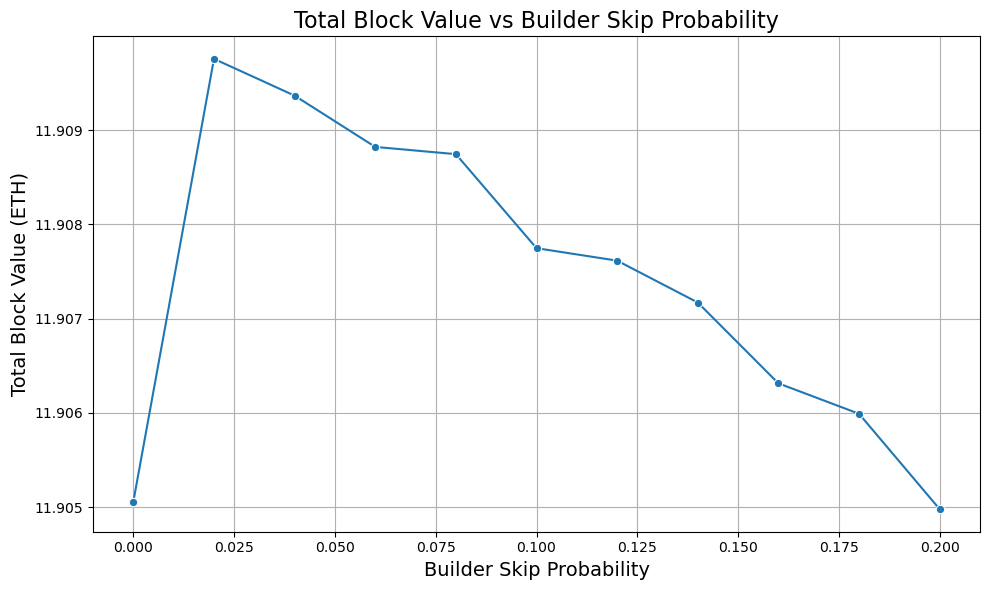

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


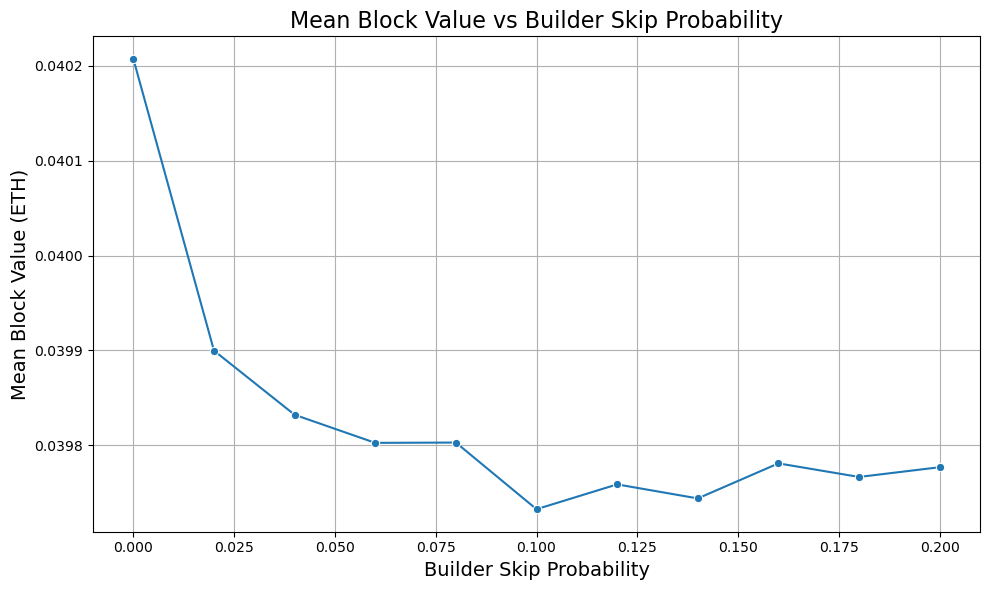

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_builder_skip_probability_20250613_112956"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("builder_skip_probability_")]


def extract_skip_prob(folder_name):
    match = re.search(r"builder_skip_probability_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_skip_prob)


results = []



for folder in folders:
    skip_prob_builder = extract_skip_prob(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

  
    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()

  
    stats = calculate_block_value_stats(blocks, skip_prob_builder)
    results.append(stats)


combined_stats = pd.DataFrame(results)


print("不同builder_skip_probability参数下的总区块价值和平均区块价值:")
print(combined_stats.sort_values('skip_prob_builder'))

# Figure 1: Total Block Value 
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='skip_prob_builder', y='avg_total_block_value_eth', marker='o')
plt.xlabel('Builder Skip Probability', fontsize=14)
plt.ylabel('Total Block Value (ETH)', fontsize=14)
plt.title('Total Block Value vs Builder Skip Probability', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Block Value
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='skip_prob_builder', y='avg_mean_block_value_eth', marker='o')
plt.xlabel('Builder Skip Probability', fontsize=14)
plt.ylabel('Mean Block Value (ETH)', fontsize=14)
plt.title('Mean Block Value vs Builder Skip Probability', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for builders under different censorship types  - builder_skip_probability

In [ ]:
# calculate_builder_profit_by_policy

def calculate_builder_profit_by_policy(exp_blocks, experiment_name):
  
    policy_summary = exp_blocks.groupby(['run_id', 'builder_policy']).agg(
        total_builder_profit=('builder_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_builders=('builder_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = ['strict', 'weak', 'non']
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'builder_policy'])

    policy_summary = policy_summary.set_index(['run_id', 'builder_policy']).reindex(
        full_index, fill_value=0
    ).reset_index()

  
    policy_summary['mean_profit_per_block'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )
    
    policy_summary['mean_total_profit_per_builder'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_builders'] if row['num_builders'] > 0 else 0, axis=1
    )

   
    final_policy_avg = policy_summary.groupby('builder_policy').agg({
        'mean_profit_per_block': 'mean',
        'mean_total_profit_per_builder': 'mean'
    }).reset_index()

    
    final_policy_avg['mean_builder_profit_per_block(ETH)'] = final_policy_avg['mean_profit_per_block'] * 1e-9
    final_policy_avg['mean_total_builder_profit_per_run(ETH)'] = final_policy_avg['mean_total_profit_per_builder'] * 1e-9

    final_policy_avg['experiment'] = experiment_name

    return final_policy_avg[[
        'builder_policy',
        'mean_builder_profit_per_block(ETH)',
        'mean_total_builder_profit_per_run(ETH)',
        'experiment'
    ]]


  builder_policy  mean_builder_profit_per_block(ETH)  \
0            non                            0.002066   
1         strict                            0.001788   
2           weak                            0.002085   
0            non                            0.002052   
1         strict                            0.001789   
2           weak                            0.002044   
0            non                            0.002051   
1         strict                            0.001774   
2           weak                            0.002019   
0            non                            0.002048   
1         strict                            0.001788   
2           weak                            0.002025   
0            non                            0.002050   
1         strict                            0.001782   
2           weak                            0.002000   
0            non                            0.002045   
1         strict                            0.00

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

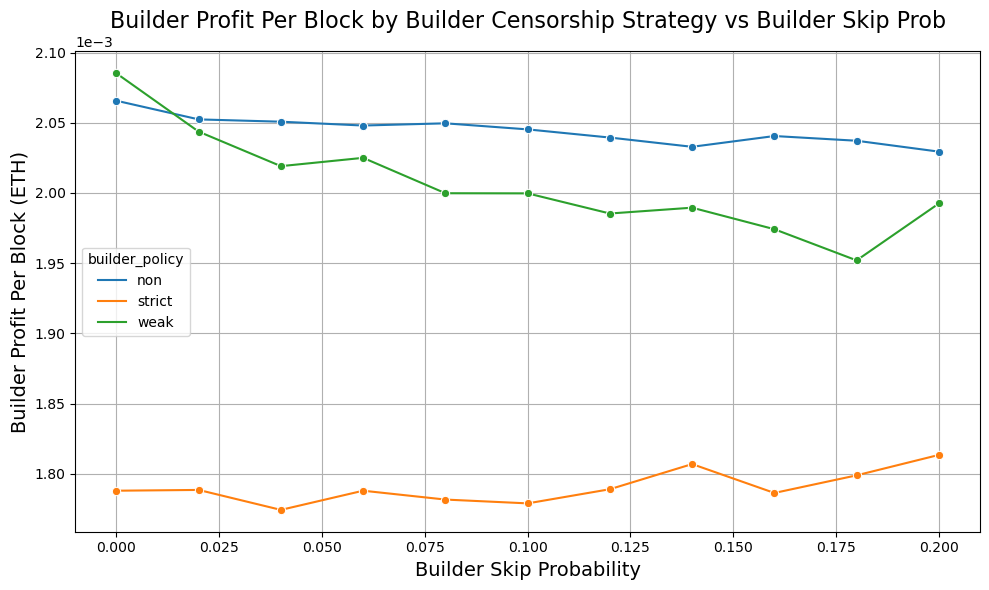

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

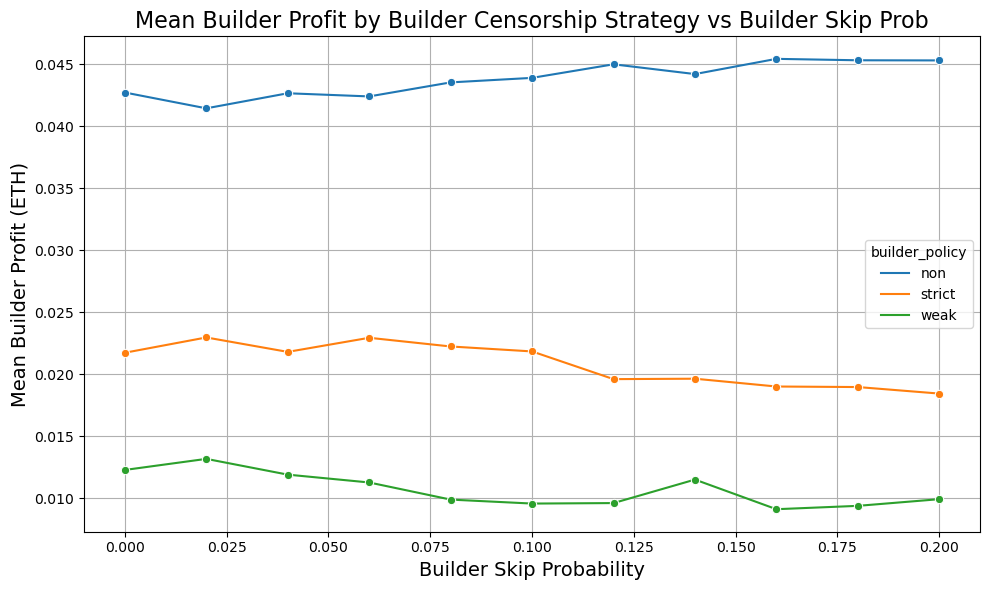

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_builder_skip_probability_20250613_112956"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("builder_skip_probability_")]


def extract_skip_prob(folder_name):
    match = re.search(r"builder_skip_probability_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_skip_prob)


results = []


for folder in folders:
    skip_prob_builder = extract_skip_prob(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

   
    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()

    
    stats = calculate_builder_profit_by_policy(blocks, f'bsp_{skip_prob_builder:.3f}')
    stats['skip_prob_builder'] = skip_prob_builder
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['skip_prob_builder', 'builder_policy']))

# Figure 1: Builder Profit Per Block by Builder Censorship Strategy vs Builder Skip Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='skip_prob_builder', y='mean_builder_profit_per_block(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Builder Skip Probability', fontsize=14)
plt.ylabel('Builder Profit Per Block (ETH)', fontsize=14)
plt.title('Builder Profit Per Block by Builder Censorship Strategy vs Builder Skip Prob', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Builder Profit by Builder Censorship Strategy vs Builder Skip Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='skip_prob_builder', y='mean_total_builder_profit_per_run(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Builder Skip Probability', fontsize=14)
plt.ylabel('Mean Builder Profit (ETH)', fontsize=14)
plt.title('Mean Builder Profit by Builder Censorship Strategy vs Builder Skip Prob', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for validators under different censorship types  - builder_skip_probability

In [ ]:

# calculate_validator_profit_by_policy

def calculate_validator_profit_by_policy(exp_blocks, experiment_name):
    validator_summary = exp_blocks.groupby(['run_id', 'proposer_validator_is_censoring']).agg(
        total_proposer_profit=('proposer_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_validators=('proposer_validator_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = [True, False]
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'proposer_validator_is_censoring'])

    validator_summary = validator_summary.set_index(['run_id', 'proposer_validator_is_censoring']).reindex(
        full_index, fill_value=0
    ).reset_index()

    validator_summary['mean_profit_per_block'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )

    validator_summary['mean_profit_per_validator'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_validators'] if row['num_validators'] > 0 else 0, axis=1
    )

    final_validator_avg = validator_summary.groupby('proposer_validator_is_censoring').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_validator': 'mean'
    }).reset_index()

    final_validator_avg['mean_validator_profit_per_block(ETH)'] = final_validator_avg['mean_profit_per_block'] * 1e-9
    final_validator_avg['mean_validator_profit_per_validator(ETH)'] = final_validator_avg['mean_profit_per_validator'] * 1e-9

    final_validator_avg['experiment'] = experiment_name

    return final_validator_avg[[
        'proposer_validator_is_censoring',
        'mean_validator_profit_per_block(ETH)',
        'mean_validator_profit_per_validator(ETH)',
        'experiment'
    ]]


   proposer_validator_is_censoring  mean_validator_profit_per_block(ETH)  \
0                            False                              0.039759   
1                             True                              0.031321   
0                            False                              0.039371   
1                             True                              0.031754   
0                            False                              0.039287   
1                             True                              0.031847   
0                            False                              0.039226   
1                             True                              0.031927   
0                            False                              0.039204   
1                             True                              0.032050   
0                            False                              0.039107   
1                             True                              0.032139   
0           

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

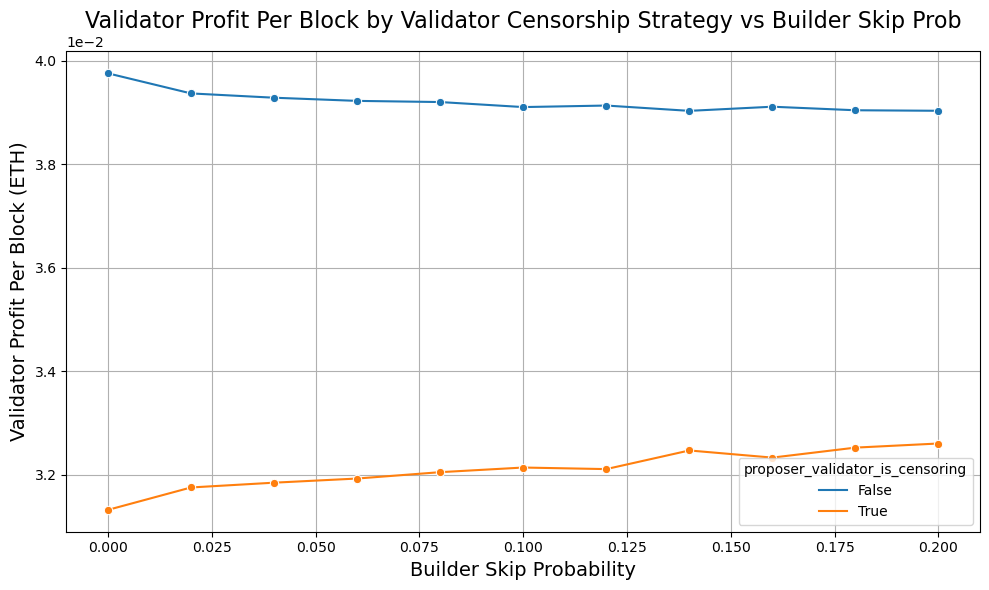

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

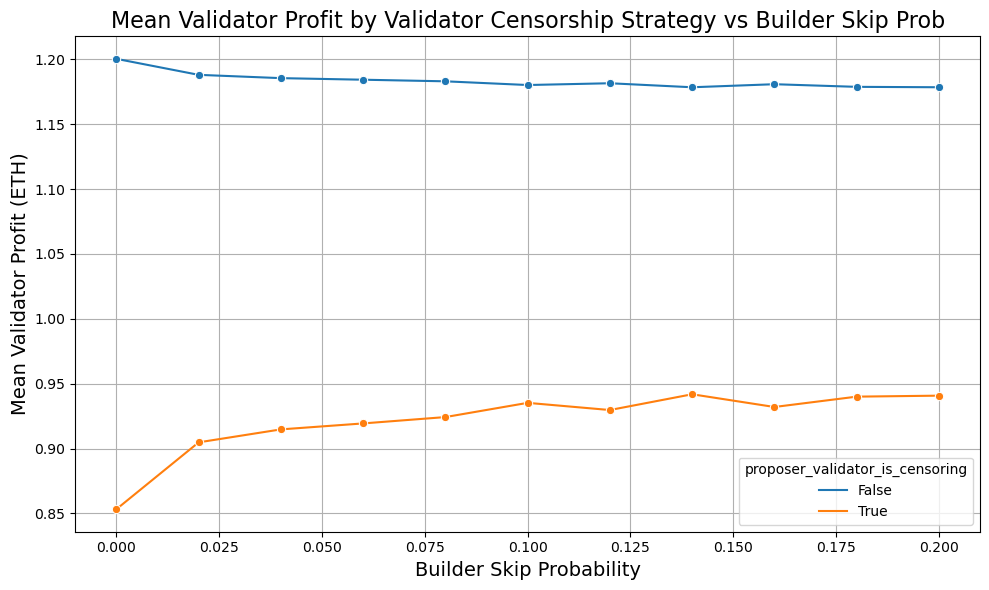

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_builder_skip_probability_20250613_112956"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("builder_skip_probability_")]


def extract_skip_prob(folder_name):
    match = re.search(r"builder_skip_probability_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_skip_prob)


results = []


for folder in folders:
    skip_prob_builder = extract_skip_prob(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

   
    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_validator_profit_by_policy(blocks, f'bsp_{skip_prob_builder:.3f}')
    stats['skip_prob_builder'] = skip_prob_builder
    results.append(stats)


combined_stats = pd.concat(results)



print(combined_stats.sort_values(['skip_prob_builder', 'proposer_validator_is_censoring']))

# Figure 1: Validator Profit Per Block by Validator Censorship Strategy vs Builder Skip Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='skip_prob_builder', y='mean_validator_profit_per_block(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Builder Skip Probability', fontsize=14)
plt.ylabel('Validator Profit Per Block (ETH)', fontsize=14)
plt.title('Validator Profit Per Block by Validator Censorship Strategy vs Builder Skip Prob', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Validator Profit by Validator Censorship Strategy vs Builder Skip Prob
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='skip_prob_builder', y='mean_validator_profit_per_validator(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Builder Skip Probability', fontsize=14)
plt.ylabel('Mean Validator Profit (ETH)', fontsize=14)
plt.title('Mean Validator Profit by Validator Censorship Strategy vs Builder Skip Prob', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()
